<a href="https://colab.research.google.com/github/DavutcanJ/CreatingCarImagesWithGAN/blob/main/ysaproje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Reshape, Dropout, Dense
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
import numpy as np
from PIL import Image
from tqdm import tqdm
import os
import time
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
drive.mount('/content/drive')

GENERATE_RES = 3 # Collab sınırlarında görsel işleme için ortalama çözünürlük değeri
GENERATE_SQUARE = 32 * GENERATE_RES # 96x96 kare bir görsel değerini tutan değişken
IMAGE_CHANNELS = 3

#
PREVIEW_ROWS = 4
PREVIEW_COLS = 7
PREVIEW_MARGIN = 16

#Uzay Vektörü için gerekli yön değeri
SEED_SIZE = 186



DATA_PATH = '/content/drive/MyDrive/YsaImages/Part2'
EPOCHS = 1500
BATCH_SIZE = 32
BUFFER_SIZE = 60000



def hms_string(sec_elapsed):#Epoch süresini göstermek için kurulan fonksiyon
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

training_binary_path = os.path.join(DATA_PATH,
        f'training_data_{GENERATE_SQUARE}_{GENERATE_SQUARE}.npy')

print(f"Ön işleme yapılmış görseller aranıyor: {training_binary_path}")








Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ön işleme yapılmış görseller aranıyor: /content/drive/MyDrive/YsaImages/Part2/training_data_96_96.npy


In [10]:
if not os.path.isfile(training_binary_path):
  start = time.time()
  print("Yok. Görsellere ön işleme yapılıyor...")

  training_data = []
  faces_path = os.path.join(DATA_PATH)
  for filename in tqdm(os.listdir(faces_path)):
    print(filename)
    path = os.path.join(faces_path, filename)

    # Dosyanın varlığını kontrol et
    if os.path.exists(path):
        # Görüntüyü oku
        image = cv2.imread(path)

        # Görüntüyü başarıyla okunduysa devam et
        if image is not None:
            # Görüntüyü yeniden boyutlandır
            image = cv2.resize(image, (GENERATE_SQUARE, GENERATE_SQUARE))

            # Yeniden boyutlandırılmış görüntüyü ekle
            training_data.append(image)
        else:
            print(f"Uyarı: {path} dosyası okunamadı. Bir sonraki döngüye geçiliyor.")
            continue
    else:
        print(f"Hata: {path} dosyası bulunamadı.")
  training_data = np.reshape(training_data,(-1,GENERATE_SQUARE,
            GENERATE_SQUARE,IMAGE_CHANNELS))#4 boyutlu şekilde reshapeledik.
  training_data = training_data.astype(np.float32)
  training_data = training_data / 127.5 - 1.


  print("Binary olarak kaydediliyor...")
  np.save(training_binary_path,training_data)# Ön işleme yapıldı ve binary dosyalar kaydedildi.
  elapsed = time.time()-start
  print (f'Ön işleme süresi : {hms_string(elapsed)}')
else:
  print("Var. Veriler çekiliyor")
  training_data = np.load(training_binary_path)

#veriyi karıştırıyoruzki yığılım olmasın
train_dataset = tf.data.Dataset.from_tensor_slices(training_data) \
    .shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

Yok. Görsellere ön işleme yapılıyor...


  0%|          | 0/1565 [00:00<?, ?it/s]

toyota-prado-gen-1996-2002-185.jpg


  0%|          | 1/1565 [00:00<19:51,  1.31it/s]

toyota-prado-gen-1996-2002-186.jpg


  0%|          | 2/1565 [00:00<11:48,  2.20it/s]

toyota-prado-gen-1996-2002-166.jpg


  0%|          | 3/1565 [00:01<12:31,  2.08it/s]

toyota-prado-gen-1996-2002-167.jpg


  0%|          | 4/1565 [00:01<10:50,  2.40it/s]

toyota-prado-gen-1996-2002-179.jpg


  0%|          | 5/1565 [00:02<09:49,  2.65it/s]

toyota-prado-gen-1996-2002-181.jpg


  0%|          | 7/1565 [00:02<07:37,  3.41it/s]

toyota-prado-gen-1996-2002-177.jpg
toyota-prado-gen-1996-2002-191.jpg


  1%|          | 8/1565 [00:03<10:43,  2.42it/s]

toyota-prado-gen-1996-2002-183.jpg


  1%|          | 9/1565 [00:03<09:17,  2.79it/s]

toyota-prado-gen-1996-2002-190.jpg


  1%|          | 10/1565 [00:03<08:16,  3.13it/s]

toyota-prado-gen-1996-2002-188.jpg


  1%|          | 11/1565 [00:03<07:34,  3.42it/s]

toyota-prado-gen-1996-2002-178.jpg


  1%|          | 13/1565 [00:04<07:15,  3.56it/s]

toyota-prado-gen-1996-2002-175.jpg
toyota-prado-gen-1996-2002-189.jpg


  1%|          | 14/1565 [00:04<06:45,  3.83it/s]

toyota-prado-gen-1996-2002-168.jpg


  1%|          | 15/1565 [00:04<06:29,  3.98it/s]

toyota-prado-gen-1996-2002-170.jpg


  1%|          | 16/1565 [00:11<51:43,  2.00s/it]

toyota-prado-gen-1996-2002-180.jpg


  2%|▏         | 29/1565 [00:16<12:59,  1.97it/s]  

toyota-prado-gen-1996-2002-182.jpg
toyota-prado-gen-1996-2002-171.jpg
toyota-prado-gen-1996-2002-165.jpg
toyota-prado-gen-1996-2002-172.jpg
toyota-prado-gen-1996-2002-169.jpg
toyota-prado-gen-1996-2002-174.jpg
toyota-prado-gen-1996-2002-176.jpg
toyota-prado-gen-1996-2002-173.jpg
toyota-prado-gen-1996-2002-184.jpg
toyota-prado-gen-1996-2002-187.jpg
toyota-prado-gen-1996-2002-196.jpg
toyota-prado-gen-1996-2002-201.jpg
toyota-prado-gen-2003-2020-105.jpg
toyota-prado-gen-1996-2002-215.jpg
toyota-prado-gen-1996-2002-217.jpg
toyota-prado-gen-1996-2002-195.jpg
toyota-prado-gen-1996-2002-199.jpg
toyota-prado-gen-1996-2002-222.jpg
toyota-prado-gen-2003-2020-109.jpg
toyota-prado-gen-1996-2002-220.jpg


  3%|▎         | 48/1565 [00:17<04:02,  6.25it/s]

toyota-prado-gen-1996-2002-194.jpg
toyota-prado-gen-1996-2002-212.jpg
toyota-prado-gen-1996-2002-221.jpg
toyota-prado-gen-1996-2002-208.jpg
toyota-prado-gen-1996-2002-206.jpg
toyota-prado-gen-1996-2002-228.jpg
toyota-prado-gen-2003-2020-1.jpg
toyota-prado-gen-1996-2002-218.jpg
toyota-prado-gen-1996-2002-223.jpg
toyota-prado-gen-1996-2002-205.jpg
toyota-prado-gen-1996-2002-197.jpg
toyota-prado-gen-2003-2020-100.jpg
toyota-prado-gen-1996-2002-210.jpg
toyota-prado-gen-1996-2002-219.jpg
toyota-prado-gen-2003-2020-101.jpg
toyota-prado-gen-1996-2002-226.jpg


  4%|▍         | 64/1565 [00:19<03:14,  7.70it/s]

toyota-prado-gen-1996-2002-230.jpg
toyota-prado-gen-2003-2020-10.jpg
toyota-prado-gen-1996-2002-203.jpg
toyota-prado-gen-1996-2002-224.jpg
toyota-prado-gen-1996-2002-204.jpg
toyota-prado-gen-2003-2020-103.jpg
toyota-prado-gen-2003-2020-102.jpg
toyota-prado-gen-1996-2002-214.jpg
toyota-prado-gen-1996-2002-193.jpg
toyota-prado-gen-1996-2002-207.jpg
toyota-prado-gen-1996-2002-225.jpg
toyota-prado-gen-1996-2002-213.jpg
toyota-prado-gen-1996-2002-229.jpg
toyota-prado-gen-1996-2002-192.jpg
toyota-prado-gen-1996-2002-216.jpg
toyota-prado-gen-2003-2020-108.jpg
toyota-prado-gen-1996-2002-209.jpg
toyota-prado-gen-1996-2002-200.jpg
toyota-prado-gen-2003-2020-104.jpg
toyota-prado-gen-2003-2020-107.jpg


  5%|▌         | 83/1565 [00:19<01:40, 14.76it/s]

toyota-prado-gen-1996-2002-227.jpg
toyota-prado-gen-2003-2020-106.jpg
toyota-prado-gen-1996-2002-211.jpg
toyota-prado-gen-1996-2002-202.jpg
toyota-prado-gen-1996-2002-198.jpg
toyota-prado-gen-2003-2020-128.jpg
toyota-prado-gen-2003-2020-17.jpg
toyota-prado-gen-2003-2020-187.jpg
toyota-prado-gen-2003-2020-207.jpg
toyota-prado-gen-2003-2020-149.jpg
toyota-prado-gen-2003-2020-110.jpg
toyota-prado-gen-2003-2020-125.jpg
toyota-prado-gen-2003-2020-184.jpg
toyota-prado-gen-2003-2020-174.jpg
toyota-prado-gen-2003-2020-12.jpg
toyota-prado-gen-2003-2020-151.jpg
toyota-prado-gen-2003-2020-152.jpg
toyota-prado-gen-2003-2020-168.jpg
toyota-prado-gen-2003-2020-198.jpg


  6%|▋         | 99/1565 [00:19<01:01, 23.82it/s]

toyota-prado-gen-2003-2020-192.jpg
toyota-prado-gen-2003-2020-203.jpg
toyota-prado-gen-2003-2020-127.jpg
toyota-prado-gen-2003-2020-134.jpg
toyota-prado-gen-2003-2020-15.jpg
toyota-prado-gen-2003-2020-190.jpg
toyota-prado-gen-2003-2020-14.jpg
toyota-prado-gen-2003-2020-185.jpg
toyota-prado-gen-2003-2020-182.jpg
toyota-prado-gen-2003-2020-195.jpg
toyota-prado-gen-2003-2020-210.jpg
toyota-prado-gen-2003-2020-164.jpg
toyota-prado-gen-2003-2020-204.jpg


  7%|▋         | 115/1565 [00:19<00:40, 36.19it/s]

toyota-prado-gen-2003-2020-117.jpg
toyota-prado-gen-2003-2020-165.jpg
toyota-prado-gen-2003-2020-178.jpg
toyota-prado-gen-2003-2020-197.jpg
toyota-prado-gen-2003-2020-129.jpg
toyota-prado-gen-2003-2020-140.jpg
toyota-prado-gen-2003-2020-191.jpg
toyota-prado-gen-2003-2020-112.jpg
toyota-prado-gen-2003-2020-171.jpg
toyota-prado-gen-2003-2020-205.jpg
toyota-prado-gen-2003-2020-137.jpg
toyota-prado-gen-2003-2020-113.jpg
toyota-prado-gen-2003-2020-173.jpg
toyota-prado-gen-2003-2020-120.jpg
toyota-prado-gen-2003-2020-13.jpg


  8%|▊         | 130/1565 [00:20<00:34, 42.08it/s]

toyota-prado-gen-2003-2020-206.jpg
toyota-prado-gen-2003-2020-159.jpg
toyota-prado-gen-2003-2020-138.jpg
toyota-prado-gen-2003-2020-194.jpg
toyota-prado-gen-2003-2020-212.jpg
toyota-prado-gen-2003-2020-145.jpg
toyota-prado-gen-2003-2020-163.jpg
toyota-prado-gen-2003-2020-160.jpg
toyota-prado-gen-2003-2020-186.jpg
toyota-prado-gen-2003-2020-166.jpg
toyota-prado-gen-2003-2020-18.jpg


  9%|▉         | 143/1565 [00:20<00:24, 57.33it/s]

toyota-prado-gen-2003-2020-148.jpg
toyota-prado-gen-2003-2020-141.jpg
toyota-prado-gen-2003-2020-189.jpg
toyota-prado-gen-2003-2020-123.jpg
toyota-prado-gen-2003-2020-179.jpg
toyota-prado-gen-2003-2020-199.jpg
toyota-prado-gen-2003-2020-11.jpg
toyota-prado-gen-2003-2020-175.jpg
toyota-prado-gen-2003-2020-132.jpg
toyota-prado-gen-2003-2020-200.jpg
toyota-prado-gen-2003-2020-150.jpg
toyota-prado-gen-2003-2020-209.jpg
toyota-prado-gen-2003-2020-146.jpg
toyota-prado-gen-2003-2020-139.jpg
toyota-prado-gen-2003-2020-119.jpg
toyota-prado-gen-2003-2020-162.jpg
toyota-prado-gen-2003-2020-114.jpg
toyota-prado-gen-2003-2020-131.jpg
toyota-prado-gen-2003-2020-157.jpg
toyota-prado-gen-2003-2020-111.jpg
toyota-prado-gen-2003-2020-154.jpg
toyota-prado-gen-2003-2020-143.jpg
toyota-prado-gen-2003-2020-183.jpg


 10%|█         | 164/1565 [00:20<00:19, 72.49it/s]

toyota-prado-gen-2003-2020-161.jpg
toyota-prado-gen-2003-2020-167.jpg
toyota-prado-gen-2003-2020-208.jpg
toyota-prado-gen-2003-2020-201.jpg
toyota-prado-gen-2003-2020-115.jpg
toyota-prado-gen-2003-2020-142.jpg
toyota-prado-gen-2003-2020-176.jpg
toyota-prado-gen-2003-2020-158.jpg
toyota-prado-gen-2003-2020-196.jpg
toyota-prado-gen-2003-2020-177.jpg
toyota-prado-gen-2003-2020-21.jpg
toyota-prado-gen-2003-2020-156.jpg
toyota-prado-gen-2003-2020-202.jpg
toyota-prado-gen-2003-2020-193.jpg
toyota-prado-gen-2003-2020-19.jpg
toyota-prado-gen-2003-2020-16.jpg
toyota-prado-gen-2003-2020-181.jpg
toyota-prado-gen-2003-2020-155.jpg
toyota-prado-gen-2003-2020-124.jpg


 12%|█▏        | 182/1565 [00:20<00:18, 74.11it/s]

toyota-prado-gen-2003-2020-130.jpg
toyota-prado-gen-2003-2020-20.jpg
toyota-prado-gen-2003-2020-147.jpg
toyota-prado-gen-2003-2020-121.jpg
toyota-prado-gen-2003-2020-133.jpg
toyota-prado-gen-2003-2020-144.jpg
toyota-prado-gen-2003-2020-116.jpg
toyota-prado-gen-2003-2020-126.jpg
toyota-prado-gen-2003-2020-135.jpg
toyota-prado-gen-2003-2020-180.jpg
toyota-prado-gen-2003-2020-188.jpg
toyota-prado-gen-2003-2020-153.jpg
toyota-prado-gen-2003-2020-122.jpg


 13%|█▎        | 199/1565 [00:21<00:25, 54.52it/s]

toyota-prado-gen-2003-2020-169.jpg
toyota-prado-gen-2003-2020-170.jpg
toyota-prado-gen-2003-2020-136.jpg
toyota-prado-gen-2003-2020-172.jpg
toyota-prado-gen-2003-2020-2.jpg
toyota-prado-gen-2003-2020-118.jpg
toyota-prado-gen-2003-2020-211.jpg
toyota-prado-gen-2003-2020-26.jpg
toyota-prado-gen-2003-2020-57.jpg
toyota-prado-gen-2003-2020-37.jpg
toyota-rav4-gen-2006-2012-111.jpg
toyota-prado-gen-2003-2020-83.jpg
toyota-prado-gen-2003-2020-213.jpg
toyota-prado-gen-2003-2020-53.jpg
toyota-prado-gen-2003-2020-41.jpg
toyota-prado-gen-2003-2020-65.jpg


 13%|█▎        | 208/1565 [00:21<00:21, 61.79it/s]

toyota-prado-gen-2003-2020-81.jpg
toyota-rav4-gen-2006-2012-143.jpg
toyota-rav4-gen-2006-2012-101.jpg
toyota-rav4-gen-2006-2012-1.jpg
toyota-prado-gen-2003-2020-74.jpg
toyota-prado-gen-2003-2020-3.jpg
toyota-prado-gen-2003-2020-89.jpg
toyota-prado-gen-2003-2020-32.jpg
toyota-prado-gen-2003-2020-75.jpg
toyota-rav4-gen-2006-2012-112.jpg
toyota-prado-gen-2003-2020-34.jpg
toyota-rav4-gen-2006-2012-131.jpg
toyota-prado-gen-2003-2020-59.jpg
toyota-prado-gen-2003-2020-94.jpg


 14%|█▍        | 223/1565 [00:21<00:25, 51.83it/s]

toyota-prado-gen-2003-2020-40.jpg
toyota-rav4-gen-2006-2012-133.jpg
toyota-rav4-gen-2006-2012-135.jpg
toyota-prado-gen-2003-2020-95.jpg
toyota-rav4-gen-2006-2012-110.jpg
toyota-rav4-gen-2006-2012-123.jpg
toyota-prado-gen-2003-2020-55.jpg
toyota-prado-gen-2003-2020-60.jpg
toyota-rav4-gen-2006-2012-119.jpg


 15%|█▌        | 239/1565 [00:21<00:21, 62.09it/s]

toyota-prado-gen-2003-2020-76.jpg
toyota-prado-gen-2003-2020-30.jpg
toyota-rav4-gen-2006-2012-109.jpg
toyota-rav4-gen-2006-2012-117.jpg
toyota-rav4-gen-2006-2012-137.jpg
toyota-rav4-gen-2006-2012-14.jpg
toyota-prado-gen-2003-2020-72.jpg
toyota-rav4-gen-2006-2012-107.jpg
toyota-prado-gen-2003-2020-50.jpg
toyota-rav4-gen-2006-2012-114.jpg
toyota-prado-gen-2003-2020-22.jpg
toyota-prado-gen-2003-2020-31.jpg
toyota-rav4-gen-2006-2012-108.jpg
toyota-prado-gen-2003-2020-35.jpg
toyota-prado-gen-2003-2020-90.jpg
toyota-rav4-gen-2006-2012-12.jpg
toyota-rav4-gen-2006-2012-128.jpg

 16%|█▌        | 249/1565 [00:22<00:22, 58.29it/s]


toyota-prado-gen-2003-2020-23.jpg
toyota-prado-gen-2003-2020-77.jpg
toyota-prado-gen-2003-2020-71.jpg
toyota-rav4-gen-2006-2012-115.jpg
toyota-prado-gen-2003-2020-63.jpg
toyota-rav4-gen-2006-2012-141.jpg
toyota-prado-gen-2003-2020-92.jpg
toyota-rav4-gen-2006-2012-127.jpg
toyota-rav4-gen-2006-2012-130.jpg
toyota-rav4-gen-2006-2012-116.jpg
toyota-prado-gen-2003-2020-88.jpg


 17%|█▋        | 259/1565 [00:22<00:19, 67.28it/s]

toyota-rav4-gen-2006-2012-139.jpg
toyota-prado-gen-2003-2020-98.jpg
toyota-prado-gen-2003-2020-73.jpg
toyota-prado-gen-2003-2020-87.jpg
toyota-prado-gen-2003-2020-67.jpg
toyota-prado-gen-2003-2020-96.jpg
toyota-prado-gen-2003-2020-9.jpg
toyota-prado-gen-2003-2020-49.jpg
toyota-prado-gen-2003-2020-46.jpg
toyota-prado-gen-2003-2020-70.jpg
toyota-prado-gen-2003-2020-79.jpg
toyota-rav4-gen-2006-2012-134.jpg
toyota-prado-gen-2003-2020-38.jpg
toyota-prado-gen-2003-2020-47.jpg


 18%|█▊        | 276/1565 [00:22<00:18, 68.78it/s]

toyota-prado-gen-2003-2020-8.jpg
toyota-prado-gen-2003-2020-28.jpg
toyota-prado-gen-2003-2020-64.jpg
toyota-rav4-gen-2006-2012-106.jpg
toyota-prado-gen-2003-2020-27.jpg
toyota-rav4-gen-2006-2012-104.jpg
toyota-prado-gen-2003-2020-61.jpg
toyota-rav4-gen-2006-2012-113.jpg
toyota-rav4-gen-2006-2012-103.jpg
toyota-rav4-gen-2006-2012-102.jpg
toyota-prado-gen-2003-2020-84.jpg
toyota-prado-gen-2003-2020-86.jpg
toyota-rav4-gen-2006-2012-13.jpg
toyota-rav4-gen-2006-2012-126.jpg
toyota-prado-gen-2003-2020-80.jpg
toyota-rav4-gen-2006-2012-100.jpg
toyota-prado-gen-2003-2020-43.jpg
toyota-rav4-gen-2006-2012-140.jpg
toyota-prado-gen-2003-2020-25.jpg


 18%|█▊        | 286/1565 [00:22<00:17, 74.69it/s]

toyota-prado-gen-2003-2020-5.jpg
toyota-prado-gen-2003-2020-4.jpg
toyota-rav4-gen-2006-2012-136.jpg
toyota-prado-gen-2003-2020-36.jpg
toyota-prado-gen-2003-2020-39.jpg
toyota-prado-gen-2003-2020-44.jpg
toyota-prado-gen-2003-2020-97.jpg
toyota-prado-gen-2003-2020-68.jpg


 19%|█▉        | 301/1565 [00:22<00:21, 57.69it/s]

toyota-rav4-gen-2006-2012-120.jpg
toyota-prado-gen-2003-2020-78.jpg
toyota-prado-gen-2003-2020-45.jpg
toyota-prado-gen-2003-2020-85.jpg
toyota-prado-gen-2003-2020-48.jpg
toyota-prado-gen-2003-2020-54.jpg
toyota-prado-gen-2003-2020-33.jpg
toyota-prado-gen-2003-2020-6.jpg
toyota-prado-gen-2003-2020-7.jpg
toyota-rav4-gen-2006-2012-124.jpg
toyota-prado-gen-2003-2020-93.jpg
toyota-prado-gen-2003-2020-62.jpg


 20%|█▉        | 308/1565 [00:23<00:29, 43.25it/s]

toyota-prado-gen-2003-2020-52.jpg
toyota-prado-gen-2003-2020-56.jpg
toyota-prado-gen-2003-2020-29.jpg


 21%|██        | 325/1565 [00:23<00:21, 57.71it/s]

toyota-rav4-gen-2006-2012-122.jpg
toyota-rav4-gen-2006-2012-105.jpg
toyota-prado-gen-2003-2020-91.jpg
toyota-prado-gen-2003-2020-82.jpg
toyota-rav4-gen-2006-2012-138.jpg
toyota-prado-gen-2003-2020-69.jpg
toyota-prado-gen-2003-2020-58.jpg
toyota-prado-gen-2003-2020-51.jpg
toyota-rav4-gen-2006-2012-10.jpg
toyota-prado-gen-2003-2020-66.jpg
toyota-prado-gen-2003-2020-42.jpg
toyota-rav4-gen-2006-2012-142.jpg
toyota-rav4-gen-2006-2012-118.jpg
toyota-rav4-gen-2006-2012-132.jpg
toyota-prado-gen-2003-2020-99.jpg
toyota-rav4-gen-2006-2012-11.jpg
toyota-rav4-gen-2006-2012-129.jpg
toyota-rav4-gen-2006-2012-125.jpg
toyota-prado-gen-2003-2020-24.jpg
toyota-rav4-gen-2006-2012-121.jpg


 23%|██▎       | 358/1565 [00:23<00:11, 106.73it/s]

toyota-rav4-gen-2013-2018-59.jpg
toyota-rav4-gen-2013-2018-265.jpg
toyota-rav4-gen-2013-2018-236.jpg
toyota-rav4-gen-2013-2018-10.jpg
toyota-rav4-gen-2006-2012-58.jpg
toyota-rav4-gen-2013-2018-243.jpg
toyota-rav4-gen-2013-2018-18.jpg
toyota-rav4-gen-2013-2018-142.jpg
toyota-rav4-gen-2013-2018-158.jpg
toyota-rav4-gen-2006-2012-56.jpg
toyota-rav4-gen-2006-2012-188.jpg
toyota-rav4-gen-2013-2018-166.jpg
toyota-rav4-gen-2013-2018-261.jpg
toyota-rav4-gen-2013-2018-164.jpg
toyota-rav4-gen-2006-2012-93.jpg
toyota-rav4-gen-2013-2018-75.jpg
toyota-rav4-gen-2013-2018-269.jpg
toyota-rav4-gen-2013-2018-141.jpg
toyota-rav4-gen-2006-2012-90.jpg
toyota-rav4-gen-2006-2012-18.jpg
toyota-rav4-gen-2006-2012-31.jpg
toyota-rav4-gen-2006-2012-147.jpg
toyota-rav4-gen-2013-2018-145.jpg
toyota-rav4-gen-2006-2012-79.jpg
toyota-rav4-gen-2019-2020-117.jpg
toyota-rav4-gen-2019-2020-177.jpg
toyota-rav4-gen-2019-2020-143.jpg
toyota-rav4-gen-2019-2020-169.jpg
toyota-rav4-gen-2013-2018-284.jpg
toyota-rav4-gen-2013-2018

 25%|██▌       | 393/1565 [00:23<00:08, 138.17it/s]


toyota-rav4-gen-2006-2012-74.jpg
toyota-rav4-gen-2006-2012-171.jpg
toyota-rav4-gen-2019-2020-1.jpg
toyota-rav4-gen-2013-2018-90.jpg
toyota-rav4-gen-2006-2012-163.jpg
toyota-rav4-gen-2013-2018-256.jpg
toyota-rav4-gen-2013-2018-239.jpg
toyota-rav4-gen-2006-2012-23.jpg
toyota-rav4-gen-2013-2018-174.jpg
toyota-rav4-gen-2019-2020-102.jpg
toyota-rav4-gen-2019-2020-176.jpg
toyota-rav4-gen-2013-2018-131.jpg
toyota-rav4-gen-2006-2012-20.jpg
toyota-rav4-gen-2019-2020-130.jpg
toyota-rav4-gen-2006-2012-181.jpg
toyota-rav4-gen-2013-2018-12.jpg
toyota-rav4-gen-2006-2012-42.jpg
toyota-rav4-gen-2013-2018-15.jpg
toyota-rav4-gen-2006-2012-63.jpg
toyota-rav4-gen-2019-2020-140.jpg
toyota-rav4-gen-2013-2018-232.jpg
toyota-rav4-gen-2006-2012-172.jpg
toyota-rav4-gen-2006-2012-15.jpg
toyota-rav4-gen-2013-2018-44.jpg
toyota-rav4-gen-2006-2012-26.jpg
toyota-rav4-gen-2013-2018-30.jpg
toyota-rav4-gen-2019-2020-165.jpg
toyota-rav4-gen-2019-2020-121.jpg


 27%|██▋       | 425/1565 [00:24<00:07, 144.34it/s]

toyota-rav4-gen-2006-2012-71.jpg
toyota-rav4-gen-2013-2018-29.jpg
toyota-rav4-gen-2013-2018-230.jpg
toyota-rav4-gen-2013-2018-224.jpg
toyota-rav4-gen-2013-2018-58.jpg
toyota-rav4-gen-2013-2018-246.jpg
toyota-rav4-gen-2006-2012-144.jpg
toyota-rav4-gen-2013-2018-21.jpg
toyota-rav4-gen-2013-2018-168.jpg
toyota-rav4-gen-2013-2018-257.jpg
toyota-rav4-gen-2006-2012-96.jpg
toyota-rav4-gen-2013-2018-43.jpg
toyota-rav4-gen-2006-2012-154.jpg
toyota-rav4-gen-2013-2018-218.jpg
toyota-rav4-gen-2006-2012-99.jpg
toyota-rav4-gen-2013-2018-45.jpg
toyota-rav4-gen-2013-2018-146.jpg
toyota-rav4-gen-2013-2018-68.jpg
toyota-rav4-gen-2006-2012-167.jpg
toyota-rav4-gen-2006-2012-173.jpg
toyota-rav4-gen-2019-2020-167.jpg
toyota-rav4-gen-2019-2020-138.jpg
toyota-rav4-gen-2019-2020-125.jpg
toyota-rav4-gen-2013-2018-50.jpg
toyota-rav4-gen-2013-2018-220.jpg
toyota-rav4-gen-2006-2012-151.jpg
toyota-rav4-gen-2006-2012-91.jpg
toyota-rav4-gen-2013-2018-167.jpg
toyota-rav4-gen-2013-2018-87.jpg
toyota-rav4-gen-2006-2012-

 30%|██▉       | 468/1565 [00:24<00:06, 174.80it/s]

toyota-rav4-gen-2013-2018-194.jpg
toyota-rav4-gen-2019-2020-141.jpg
toyota-rav4-gen-2013-2018-173.jpg
toyota-rav4-gen-2013-2018-124.jpg
toyota-rav4-gen-2013-2018-53.jpg
toyota-rav4-gen-2006-2012-82.jpg
toyota-rav4-gen-2013-2018-74.jpg
toyota-rav4-gen-2013-2018-63.jpg
toyota-rav4-gen-2019-2020-14.jpg
toyota-rav4-gen-2013-2018-114.jpg
toyota-rav4-gen-2006-2012-192.jpg
toyota-rav4-gen-2013-2018-5.jpg
toyota-rav4-gen-2013-2018-127.jpg
toyota-rav4-gen-2019-2020-145.jpg
toyota-rav4-gen-2013-2018-73.jpg
toyota-rav4-gen-2013-2018-156.jpg
toyota-rav4-gen-2006-2012-73.jpg
toyota-rav4-gen-2019-2020-100.jpg
toyota-rav4-gen-2013-2018-35.jpg
toyota-rav4-gen-2013-2018-135.jpg
toyota-rav4-gen-2013-2018-46.jpg
toyota-rav4-gen-2013-2018-48.jpg
toyota-rav4-gen-2006-2012-85.jpg
toyota-rav4-gen-2013-2018-88.jpg
toyota-rav4-gen-2013-2018-152.jpg
toyota-rav4-gen-2019-2020-132.jpg
toyota-rav4-gen-2013-2018-17.jpg
toyota-rav4-gen-2013-2018-271.jpg
toyota-rav4-gen-2013-2018-7.jpg
toyota-rav4-gen-2013-2018-186.j

 31%|███       | 486/1565 [00:24<00:06, 172.95it/s]

toyota-rav4-gen-2019-2020-119.jpg
toyota-rav4-gen-2013-2018-61.jpg
toyota-rav4-gen-2013-2018-122.jpg
toyota-rav4-gen-2013-2018-191.jpg
toyota-rav4-gen-2013-2018-238.jpg
toyota-rav4-gen-2006-2012-83.jpg
toyota-rav4-gen-2006-2012-69.jpg
toyota-rav4-gen-2013-2018-204.jpg
toyota-rav4-gen-2006-2012-195.jpg
toyota-rav4-gen-2019-2020-180.jpg
toyota-rav4-gen-2013-2018-252.jpg
toyota-rav4-gen-2013-2018-65.jpg
toyota-rav4-gen-2013-2018-244.jpg
toyota-rav4-gen-2013-2018-28.jpg
toyota-rav4-gen-2019-2020-142.jpg
toyota-rav4-gen-2013-2018-201.jpg
toyota-rav4-gen-2006-2012-89.jpg
toyota-rav4-gen-2006-2012-166.jpg
toyota-rav4-gen-2006-2012-81.jpg
toyota-rav4-gen-2006-2012-178.jpg
toyota-rav4-gen-2006-2012-65.jpg
toyota-rav4-gen-2013-2018-177.jpg
toyota-rav4-gen-2013-2018-113.jpg
toyota-rav4-gen-2013-2018-285.jpg
toyota-rav4-gen-2006-2012-55.jpg
toyota-rav4-gen-2013-2018-207.jpg
toyota-rav4-gen-2019-2020-150.jpg
toyota-rav4-gen-2019-2020-158.jpg
toyota-rav4-gen-2013-2018-245.jpg
toyota-rav4-gen-2006-20

 33%|███▎      | 520/1565 [00:24<00:07, 139.43it/s]

toyota-rav4-gen-2006-2012-182.jpg
toyota-rav4-gen-2013-2018-36.jpg
toyota-rav4-gen-2013-2018-85.jpg
toyota-rav4-gen-2013-2018-101.jpg
toyota-rav4-gen-2019-2020-106.jpg
toyota-rav4-gen-2019-2020-161.jpg
toyota-rav4-gen-2019-2020-122.jpg
toyota-rav4-gen-2013-2018-279.jpg
toyota-rav4-gen-2006-2012-191.jpg
toyota-rav4-gen-2019-2020-111.jpg
toyota-rav4-gen-2006-2012-95.jpg
toyota-rav4-gen-2013-2018-197.jpg
toyota-rav4-gen-2006-2012-39.jpg
toyota-rav4-gen-2013-2018-229.jpg
toyota-rav4-gen-2013-2018-273.jpg
toyota-rav4-gen-2006-2012-164.jpg
toyota-rav4-gen-2006-2012-78.jpg
toyota-rav4-gen-2013-2018-227.jpg
toyota-rav4-gen-2013-2018-32.jpg
toyota-rav4-gen-2006-2012-60.jpg
toyota-rav4-gen-2013-2018-91.jpg
toyota-rav4-gen-2013-2018-248.jpg
toyota-rav4-gen-2013-2018-70.jpg
toyota-rav4-gen-2006-2012-9.jpg
toyota-rav4-gen-2006-2012-75.jpg
toyota-rav4-gen-2013-2018-175.jpg
toyota-rav4-gen-2006-2012-43.jpg
toyota-rav4-gen-2013-2018-235.jpg
toyota-rav4-gen-2006-2012-50.jpg
toyota-rav4-gen-2019-2020-14

 36%|███▌      | 564/1565 [00:24<00:06, 157.33it/s]

toyota-rav4-gen-2006-2012-29.jpg
toyota-rav4-gen-2013-2018-72.jpg
toyota-rav4-gen-2013-2018-242.jpg
toyota-rav4-gen-2013-2018-54.jpg
toyota-rav4-gen-2006-2012-157.jpg
toyota-rav4-gen-2013-2018-231.jpg
toyota-rav4-gen-2006-2012-44.jpg
toyota-rav4-gen-2013-2018-181.jpg
toyota-rav4-gen-2019-2020-173.jpg
toyota-rav4-gen-2006-2012-61.jpg
toyota-rav4-gen-2013-2018-228.jpg
toyota-rav4-gen-2013-2018-121.jpg
toyota-rav4-gen-2019-2020-152.jpg
toyota-rav4-gen-2013-2018-42.jpg
toyota-rav4-gen-2019-2020-15.jpg
toyota-rav4-gen-2006-2012-2.jpg
toyota-rav4-gen-2006-2012-159.jpg
toyota-rav4-gen-2013-2018-2.jpg
toyota-rav4-gen-2006-2012-87.jpg
toyota-rav4-gen-2013-2018-13.jpg
toyota-rav4-gen-2013-2018-94.jpg
toyota-rav4-gen-2006-2012-88.jpg
toyota-rav4-gen-2013-2018-51.jpg
toyota-rav4-gen-2013-2018-111.jpg
toyota-rav4-gen-2006-2012-162.jpg
toyota-rav4-gen-2013-2018-266.jpg
toyota-rav4-gen-2006-2012-150.jpg
toyota-rav4-gen-2019-2020-160.jpg
toyota-rav4-gen-2006-2012-19.jpg
toyota-rav4-gen-2013-2018-159.j

 38%|███▊      | 601/1565 [00:25<00:07, 131.76it/s]

toyota-rav4-gen-2013-2018-176.jpg
toyota-rav4-gen-2013-2018-182.jpg
toyota-rav4-gen-2006-2012-33.jpg
toyota-rav4-gen-2019-2020-170.jpg
toyota-rav4-gen-2013-2018-16.jpg
toyota-rav4-gen-2013-2018-198.jpg
toyota-rav4-gen-2019-2020-183.jpg
toyota-rav4-gen-2013-2018-253.jpg
toyota-rav4-gen-2013-2018-283.jpg
toyota-rav4-gen-2013-2018-110.jpg
toyota-rav4-gen-2013-2018-27.jpg
toyota-rav4-gen-2013-2018-241.jpg
toyota-rav4-gen-2019-2020-109.jpg
toyota-rav4-gen-2006-2012-67.jpg
toyota-rav4-gen-2013-2018-268.jpg
toyota-rav4-gen-2006-2012-68.jpg
toyota-rav4-gen-2013-2018-276.jpg
toyota-rav4-gen-2006-2012-176.jpg
toyota-rav4-gen-2006-2012-189.jpg
toyota-rav4-gen-2006-2012-3.jpg
toyota-rav4-gen-2013-2018-155.jpg
toyota-rav4-gen-2013-2018-76.jpg
toyota-rav4-gen-2006-2012-16.jpg
toyota-rav4-gen-2006-2012-28.jpg
toyota-rav4-gen-2013-2018-237.jpg
toyota-rav4-gen-2019-2020-156.jpg
toyota-rav4-gen-2006-2012-47.jpg
toyota-rav4-gen-2006-2012-32.jpg
toyota-rav4-gen-2013-2018-154.jpg
toyota-rav4-gen-2019-2020-

 41%|████      | 635/1565 [00:25<00:06, 145.65it/s]

toyota-rav4-gen-2013-2018-119.jpg
toyota-rav4-gen-2013-2018-171.jpg
toyota-rav4-gen-2013-2018-213.jpg
toyota-rav4-gen-2013-2018-170.jpg
toyota-rav4-gen-2019-2020-178.jpg
toyota-rav4-gen-2013-2018-219.jpg
toyota-rav4-gen-2013-2018-126.jpg
toyota-rav4-gen-2019-2020-129.jpg
toyota-rav4-gen-2019-2020-155.jpg
toyota-rav4-gen-2013-2018-67.jpg
toyota-rav4-gen-2006-2012-194.jpg
toyota-rav4-gen-2013-2018-250.jpg
toyota-rav4-gen-2013-2018-214.jpg
toyota-rav4-gen-2013-2018-254.jpg
toyota-rav4-gen-2013-2018-259.jpg
toyota-rav4-gen-2013-2018-160.jpg
toyota-rav4-gen-2013-2018-203.jpg
toyota-rav4-gen-2013-2018-281.jpg
toyota-rav4-gen-2013-2018-78.jpg
toyota-rav4-gen-2006-2012-84.jpg
toyota-rav4-gen-2006-2012-86.jpg
toyota-rav4-gen-2013-2018-130.jpg
toyota-rav4-gen-2013-2018-71.jpg
toyota-rav4-gen-2019-2020-104.jpg
toyota-rav4-gen-2006-2012-53.jpg
toyota-rav4-gen-2013-2018-115.jpg
toyota-rav4-gen-2019-2020-148.jpg
toyota-rav4-gen-2019-2020-123.jpg
toyota-rav4-gen-2006-2012-8.jpg
toyota-rav4-gen-2019-2

 43%|████▎     | 670/1565 [00:25<00:05, 153.64it/s]

toyota-rav4-gen-2006-2012-177.jpg
toyota-rav4-gen-2013-2018-33.jpg
toyota-rav4-gen-2013-2018-125.jpg
toyota-rav4-gen-2006-2012-196.jpg
toyota-rav4-gen-2006-2012-187.jpg
toyota-rav4-gen-2006-2012-180.jpg
toyota-rav4-gen-2006-2012-38.jpg
toyota-rav4-gen-2013-2018-179.jpg
toyota-rav4-gen-2013-2018-137.jpg
toyota-rav4-gen-2013-2018-118.jpg
toyota-rav4-gen-2006-2012-94.jpg
toyota-rav4-gen-2013-2018-104.jpg
toyota-rav4-gen-2013-2018-180.jpg
toyota-rav4-gen-2006-2012-30.jpg
toyota-rav4-gen-2006-2012-153.jpg
toyota-rav4-gen-2019-2020-127.jpg
toyota-rav4-gen-2019-2020-120.jpg
toyota-rav4-gen-2013-2018-84.jpg
toyota-rav4-gen-2019-2020-13.jpg
toyota-rav4-gen-2013-2018-69.jpg
toyota-rav4-gen-2013-2018-188.jpg
toyota-rav4-gen-2013-2018-208.jpg
toyota-rav4-gen-2019-2020-151.jpg
toyota-rav4-gen-2013-2018-99.jpg
toyota-rav4-gen-2013-2018-112.jpg
toyota-rav4-gen-2006-2012-51.jpg
toyota-rav4-gen-2006-2012-197.jpg
toyota-rav4-gen-2013-2018-1.jpg
toyota-rav4-gen-2013-2018-211.jpg
toyota-rav4-gen-2006-2012

 45%|████▍     | 702/1565 [00:25<00:06, 137.59it/s]

toyota-rav4-gen-2013-2018-14.jpg
toyota-rav4-gen-2013-2018-64.jpg
toyota-rav4-gen-2013-2018-62.jpg
toyota-rav4-gen-2019-2020-136.jpg
toyota-rav4-gen-2013-2018-116.jpg
toyota-rav4-gen-2019-2020-168.jpg
toyota-rav4-gen-2013-2018-105.jpg
toyota-rav4-gen-2006-2012-97.jpg
toyota-rav4-gen-2019-2020-128.jpg
toyota-rav4-gen-2019-2020-124.jpg
toyota-rav4-gen-2006-2012-155.jpg
toyota-rav4-gen-2013-2018-38.jpg
toyota-rav4-gen-2006-2012-22.jpg
toyota-rav4-gen-2019-2020-157.jpg
toyota-rav4-gen-2019-2020-115.jpg
toyota-rav4-gen-2013-2018-222.jpg
toyota-rav4-gen-2006-2012-48.jpg
toyota-rav4-gen-2019-2020-182.jpg
toyota-rav4-gen-2013-2018-162.jpg
toyota-rav4-gen-2013-2018-31.jpg
toyota-rav4-gen-2013-2018-275.jpg
toyota-rav4-gen-2013-2018-86.jpg
toyota-rav4-gen-2013-2018-136.jpg
toyota-rav4-gen-2019-2020-184.jpg
toyota-rav4-gen-2019-2020-131.jpg
toyota-rav4-gen-2006-2012-25.jpg


 47%|████▋     | 738/1565 [00:26<00:05, 154.19it/s]

toyota-rav4-gen-2013-2018-210.jpg
toyota-rav4-gen-2013-2018-255.jpg
toyota-rav4-gen-2019-2020-171.jpg
toyota-rav4-gen-2013-2018-258.jpg
toyota-rav4-gen-2013-2018-262.jpg
toyota-rav4-gen-2006-2012-77.jpg
toyota-rav4-gen-2006-2012-41.jpg
toyota-rav4-gen-2006-2012-70.jpg
toyota-rav4-gen-2006-2012-169.jpg
toyota-rav4-gen-2019-2020-179.jpg
toyota-rav4-gen-2013-2018-39.jpg
toyota-rav4-gen-2013-2018-134.jpg
toyota-rav4-gen-2019-2020-18.jpg
toyota-rav4-gen-2013-2018-11.jpg
toyota-rav4-gen-2013-2018-132.jpg
toyota-rav4-gen-2013-2018-80.jpg
toyota-rav4-gen-2019-2020-147.jpg
toyota-rav4-gen-2013-2018-263.jpg
toyota-rav4-gen-2006-2012-170.jpg
toyota-rav4-gen-2006-2012-199.jpg
toyota-rav4-gen-2013-2018-98.jpg
toyota-rav4-gen-2013-2018-107.jpg
toyota-rav4-gen-2013-2018-129.jpg
toyota-rav4-gen-2013-2018-165.jpg
toyota-rav4-gen-2013-2018-37.jpg
toyota-rav4-gen-2013-2018-108.jpg
toyota-rav4-gen-2013-2018-95.jpg
toyota-rav4-gen-2019-2020-174.jpg
toyota-rav4-gen-2013-2018-4.jpg
toyota-rav4-gen-2006-2012-

 50%|█████     | 786/1565 [00:26<00:04, 188.90it/s]

toyota-rav4-gen-2019-2020-154.jpg
toyota-rav4-gen-2019-2020-181.jpg
toyota-rav4-gen-2006-2012-27.jpg
toyota-rav4-gen-2013-2018-190.jpg
toyota-rav4-gen-2006-2012-17.jpg
toyota-rav4-gen-2013-2018-117.jpg
toyota-rav4-gen-2013-2018-123.jpg
toyota-rav4-gen-2006-2012-174.jpg
toyota-rav4-gen-2006-2012-24.jpg
toyota-rav4-gen-2013-2018-157.jpg
toyota-rav4-gen-2013-2018-8.jpg
toyota-rav4-gen-2006-2012-190.jpg
toyota-rav4-gen-2019-2020-107.jpg
toyota-rav4-gen-2013-2018-41.jpg
toyota-rav4-gen-2013-2018-9.jpg
toyota-rav4-gen-2006-2012-184.jpg
toyota-rav4-gen-2006-2012-193.jpg
toyota-rav4-gen-2013-2018-49.jpg
toyota-rav4-gen-2013-2018-150.jpg
toyota-rav4-gen-2006-2012-183.jpg
toyota-rav4-gen-2006-2012-6.jpg
toyota-rav4-gen-2013-2018-209.jpg
toyota-rav4-gen-2013-2018-185.jpg
toyota-rav4-gen-2013-2018-52.jpg
toyota-rav4-gen-2019-2020-166.jpg
toyota-rav4-gen-2013-2018-6.jpg
toyota-rav4-gen-2013-2018-247.jpg
toyota-rav4-gen-2019-2020-10.jpg
toyota-rav4-gen-2019-2020-153.jpg
toyota-rav4-gen-2006-2012-66.

 53%|█████▎    | 827/1565 [00:26<00:03, 191.51it/s]

toyota-rav4-gen-2006-2012-34.jpg
toyota-rav4-gen-2006-2012-52.jpg
toyota-rav4-gen-2013-2018-23.jpg
toyota-rav4-gen-2013-2018-223.jpg
toyota-rav4-gen-2019-2020-108.jpg
toyota-rav4-gen-2013-2018-282.jpg
toyota-rav4-gen-2006-2012-72.jpg
toyota-rav4-gen-2013-2018-217.jpg
toyota-rav4-gen-2006-2012-37.jpg
toyota-rav4-gen-2013-2018-3.jpg
toyota-rav4-gen-2006-2012-168.jpg
toyota-rav4-gen-2006-2012-40.jpg
toyota-rav4-gen-2006-2012-76.jpg
toyota-rav4-gen-2013-2018-163.jpg
toyota-rav4-gen-2013-2018-25.jpg
toyota-rav4-gen-2006-2012-148.jpg
toyota-rav4-gen-2013-2018-34.jpg
toyota-rav4-gen-2013-2018-97.jpg
toyota-rav4-gen-2013-2018-212.jpg
toyota-rav4-gen-2013-2018-83.jpg
toyota-rav4-gen-2006-2012-179.jpg
toyota-rav4-gen-2019-2020-105.jpg
toyota-rav4-gen-2006-2012-160.jpg
toyota-rav4-gen-2013-2018-138.jpg
toyota-rav4-gen-2019-2020-114.jpg
toyota-rav4-gen-2013-2018-288.jpg
toyota-rav4-gen-2006-2012-156.jpg
toyota-rav4-gen-2013-2018-19.jpg
toyota-rav4-gen-2013-2018-260.jpg
toyota-rav4-gen-2013-2018-26

 55%|█████▌    | 867/1565 [00:26<00:03, 187.50it/s]

toyota-rav4-gen-2006-2012-98.jpg
toyota-rav4-gen-2013-2018-81.jpg
toyota-rav4-gen-2006-2012-149.jpg
toyota-rav4-gen-2006-2012-161.jpg
toyota-rav4-gen-2006-2012-5.jpg
toyota-rav4-gen-2013-2018-89.jpg
toyota-rav4-gen-2013-2018-172.jpg
toyota-rav4-gen-2006-2012-80.jpg
toyota-rav4-gen-2013-2018-139.jpg
toyota-rav4-gen-2019-2020-185.jpg
toyota-rav4-gen-2019-2020-172.jpg
toyota-rav4-gen-2019-2020-133.jpg
toyota-rav4-gen-2013-2018-149.jpg
toyota-rav4-gen-2013-2018-200.jpg
toyota-rav4-gen-2013-2018-77.jpg
toyota-rav4-gen-2013-2018-216.jpg
toyota-rav4-gen-2019-2020-17.jpg
toyota-rav4-gen-2013-2018-128.jpg
toyota-rav4-gen-2019-2020-175.jpg
toyota-rav4-gen-2019-2020-16.jpg
toyota-rav4-gen-2006-2012-46.jpg
toyota-rav4-gen-2006-2012-57.jpg
toyota-rav4-gen-2006-2012-158.jpg
toyota-rav4-gen-2013-2018-109.jpg
toyota-rav4-gen-2019-2020-144.jpg
toyota-rav4-gen-2019-2020-126.jpg
toyota-rav4-gen-2013-2018-161.jpg
toyota-rav4-gen-2019-2020-192.jpg
toyota-rav4-gen-2019-2020-24.jpg
toyota-rav4-gen-2019-2020-

 58%|█████▊    | 902/1565 [00:27<00:05, 124.55it/s]

toyota-rav4-gen-2019-2020-97.jpg
toyota-rav4-gen-2019-2020-99.jpg
toyota-rav4-gen-2019-2020-82.jpg
toyota-yaris-gen-2010-2013-3.jpg
toyota-rav4-gen-2019-2020-64.jpg
toyota-rav4-gen-2019-2020-4.jpg
toyota-rav4-gen-2019-2020-73.jpg
toyota-rav4-gen-2019-2020-25.jpg
toyota-rav4-gen-2019-2020-46.jpg
toyota-rav4-gen-2019-2020-9.jpg
toyota-rav4-gen-2019-2020-190.jpg
toyota-rav4-gen-2019-2020-81.jpg
toyota-rav4-gen-2019-2020-79.jpg
toyota-rav4-gen-2019-2020-95.jpg
toyota-rav4-gen-2019-2020-74.jpg
toyota-rav4-gen-2019-2020-30.jpg
toyota-rav4-gen-2019-2020-39.jpg
toyota-rav4-gen-2019-2020-98.jpg
toyota-rav4-gen-2019-2020-204.jpg
toyota-rav4-gen-2019-2020-85.jpg
toyota-rav4-gen-2019-2020-77.jpg
toyota-rav4-gen-2019-2020-195.jpg
toyota-rav4-gen-2019-2020-21.jpg
toyota-rav4-gen-2019-2020-61.jpg


 59%|█████▉    | 920/1565 [00:27<00:04, 131.26it/s]

toyota-rav4-gen-2019-2020-62.jpg
toyota-rav4-gen-2019-2020-44.jpg
toyota-rav4-gen-2019-2020-91.jpg
toyota-rav4-gen-2019-2020-68.jpg
toyota-rav4-gen-2019-2020-96.jpg
toyota-rav4-gen-2019-2020-43.jpg
toyota-rav4-gen-2019-2020-29.jpg
toyota-rav4-gen-2019-2020-197.jpg
toyota-rav4-gen-2019-2020-207.jpg
toyota-rav4-gen-2019-2020-34.jpg
toyota-rav4-gen-2019-2020-2.jpg
toyota-rav4-gen-2019-2020-8.jpg
toyota-rav4-gen-2019-2020-49.jpg
toyota-rav4-gen-2019-2020-50.jpg
toyota-rav4-gen-2019-2020-28.jpg
toyota-rav4-gen-2019-2020-22.jpg
toyota-rav4-gen-2019-2020-7.jpg
toyota-rav4-gen-2019-2020-84.jpg
toyota-rav4-gen-2019-2020-88.jpg
toyota-rav4-gen-2019-2020-32.jpg
toyota-rav4-gen-2019-2020-70.jpg
toyota-rav4-gen-2019-2020-193.jpg
toyota-rav4-gen-2019-2020-27.jpg
toyota-rav4-gen-2019-2020-206.jpg
toyota-rav4-gen-2019-2020-48.jpg
toyota-rav4-gen-2019-2020-56.jpg
toyota-rav4-gen-2019-2020-199.jpg


 60%|█████▉    | 935/1565 [00:27<00:05, 105.26it/s]

toyota-rav4-gen-2019-2020-203.jpg
toyota-rav4-gen-2019-2020-47.jpg
toyota-rav4-gen-2019-2020-26.jpg
toyota-rav4-gen-2019-2020-187.jpg
toyota-rav4-gen-2019-2020-58.jpg
toyota-rav4-gen-2019-2020-53.jpg
toyota-rav4-gen-2019-2020-75.jpg
toyota-rav4-gen-2019-2020-60.jpg
toyota-rav4-gen-2019-2020-200.jpg
toyota-rav4-gen-2019-2020-189.jpg


 62%|██████▏   | 963/1565 [00:27<00:06, 95.06it/s]

toyota-rav4-gen-2019-2020-36.jpg
toyota-rav4-gen-2019-2020-87.jpg
toyota-rav4-gen-2019-2020-93.jpg
toyota-rav4-gen-2019-2020-67.jpg
toyota-rav4-gen-2019-2020-45.jpg
toyota-rav4-gen-2019-2020-92.jpg
toyota-rav4-gen-2019-2020-194.jpg
toyota-rav4-gen-2019-2020-76.jpg
toyota-rav4-gen-2019-2020-202.jpg
toyota-rav4-gen-2019-2020-20.jpg
toyota-rav4-gen-2019-2020-63.jpg
toyota-rav4-gen-2019-2020-33.jpg
toyota-rav4-gen-2019-2020-55.jpg
toyota-rav4-gen-2019-2020-208.jpg
toyota-rav4-gen-2019-2020-5.jpg
toyota-rav4-gen-2019-2020-65.jpg
toyota-rav4-gen-2019-2020-6.jpg
toyota-rav4-gen-2019-2020-41.jpg
toyota-rav4-gen-2019-2020-198.jpg
toyota-rav4-gen-2019-2020-201.jpg
toyota-rav4-gen-2019-2020-37.jpg
toyota-rav4-gen-2019-2020-59.jpg
toyota-rav4-gen-2019-2020-3.jpg
toyota-rav4-gen-2019-2020-80.jpg
toyota-rav4-gen-2019-2020-89.jpg
toyota-rav4-gen-2019-2020-40.jpg
toyota-rav4-gen-2019-2020-71.jpg
toyota-yaris-gen-2010-2013-1.jpg
output1
Uyarı: /content/drive/MyDrive/YsaImages/Part2/output1 dosyası okun

 65%|██████▌   | 1025/1565 [00:28<00:02, 180.94it/s]

toyota-fortuner-gen-2004-2015-56.jpg
toyota-fortuner-gen-2004-2015-60.jpg
toyota-fortuner-gen-2004-2015-63.jpg
toyota-fortuner-gen-2004-2015-53.jpg
toyota-fortuner-gen-2004-2015-45.jpg
toyota-fortuner-gen-2004-2015-46.jpg
toyota-fortuner-gen-2004-2015-51.jpg
toyota-fortuner-gen-2004-2015-47.jpg
toyota-fortuner-gen-2004-2015-49.jpg
toyota-fortuner-gen-2004-2015-48.jpg
toyota-fortuner-gen-2004-2015-54.jpg
toyota-fortuner-gen-2004-2015-52.jpg
toyota-fortuner-gen-2004-2015-50.jpg
toyota-fortuner-gen-2004-2015-44.jpg
toyota-fortuner-gen-2004-2015-43.jpg
toyota-fortuner-gen-2004-2015-39.jpg
toyota-fortuner-gen-2004-2015-38.jpg
toyota-fortuner-gen-2004-2015-37.jpg
toyota-fortuner-gen-2004-2015-42.jpg
toyota-fortuner-gen-2004-2015-36.jpg
toyota-fortuner-gen-2004-2015-41.jpg
toyota-fortuner-gen-2004-2015-40.jpg
toyota-fortuner-gen-2004-2015-35.jpg
toyota-fortuner-gen-2004-2015-29.jpg
toyota-fortuner-gen-2004-2015-31.jpg
toyota-fortuner-gen-2004-2015-30.jpg
toyota-fortuner-gen-2004-2015-26.jpg
t

 67%|██████▋   | 1047/1565 [00:28<00:03, 149.60it/s]

toyota-yaris-gen-2018-2020-146.jpg
toyota-yaris-gen-2018-2020-154.jpg
toyota-yaris-gen-2018-2020-151.jpg
toyota-yaris-gen-2018-2020-150.jpg
toyota-yaris-gen-2018-2020-155.jpg
toyota-yaris-gen-2018-2020-152.jpg
toyota-yaris-gen-2018-2020-148.jpg
toyota-yaris-gen-2018-2020-149.jpg
toyota-yaris-gen-2018-2020-153.jpg
toyota-yaris-gen-2018-2020-156.jpg
toyota-yaris-gen-2018-2020-157.jpg
toyota-yaris-gen-2018-2020-164.jpg
toyota-yaris-gen-2018-2020-159.jpg
toyota-yaris-gen-2018-2020-160.jpg
toyota-yaris-gen-2018-2020-166.jpg
toyota-yaris-gen-2018-2020-165.jpg
toyota-yaris-gen-2018-2020-167.jpg
toyota-yaris-gen-2018-2020-158.jpg
toyota-yaris-gen-2018-2020-161.jpg
toyota-yaris-gen-2018-2020-162.jpg
toyota-yaris-gen-2018-2020-163.jpg
toyota-yaris-gen-2018-2020-173.jpg
toyota-yaris-gen-2018-2020-172.jpg


 68%|██████▊   | 1066/1565 [00:28<00:03, 146.12it/s]

toyota-yaris-gen-2018-2020-171.jpg
toyota-yaris-gen-2018-2020-177.jpg
toyota-yaris-gen-2018-2020-168.jpg
toyota-yaris-gen-2018-2020-169.jpg
toyota-yaris-gen-2018-2020-174.jpg
toyota-yaris-gen-2018-2020-175.jpg
toyota-yaris-gen-2018-2020-176.jpg
toyota-yaris-gen-2018-2020-170.jpg
vehicle-154992085133386.jpg
vehicle-159234416521572.jpg
vehicle-159254825175890.jpg
W1bHBr2n-770x430.jpg
USC90FOS151A021001.jpg
vehicle-15500253748524.jpg
vehicle-155002554789529.jpg
vehicle-157421619646116.jpg
vehicle-153239483036823.jpg
vehicle-155287891392839.jpg
toyota-yaris-gen-2018-2020-130.jpg
toyota-yaris-gen-2018-2020-137.jpg
toyota-yaris-gen-2018-2020-129.jpg
toyota-yaris-gen-2018-2020-131.jpg
toyota-yaris-gen-2018-2020-135.jpg


 69%|██████▉   | 1083/1565 [00:28<00:03, 126.49it/s]

toyota-yaris-gen-2018-2020-136.jpg
toyota-yaris-gen-2010-2013-12.jpg
toyota-yaris-gen-2018-2020-132.jpg
toyota-yaris-gen-2018-2020-133.jpg
toyota-yaris-gen-2018-2020-134.jpg
toyota-yaris-gen-2018-2020-120.jpg
toyota-yaris-gen-2018-2020-128.jpg
toyota-yaris-gen-2018-2020-125.jpg
toyota-yaris-gen-2018-2020-121.jpg
toyota-yaris-gen-2018-2020-124.jpg
toyota-yaris-gen-2018-2020-127.jpg
toyota-yaris-gen-2018-2020-119.jpg
toyota-yaris-gen-2018-2020-126.jpg
toyota-yaris-gen-2018-2020-123.jpg


 71%|███████   | 1111/1565 [00:28<00:04, 108.11it/s]

toyota-yaris-gen-2018-2020-122.jpg
toyota-yaris-gen-2014-2017-198.jpg
toyota-yaris-gen-2014-2017-206.jpg
toyota-yaris-gen-2014-2017-205.jpg
toyota-yaris-gen-2014-2017-196.jpg
toyota-yaris-gen-2014-2017-202.jpg
toyota-yaris-gen-2014-2017-203.jpg
toyota-yaris-gen-2014-2017-204.jpg
toyota-yaris-gen-2014-2017-200.jpg
toyota-yaris-gen-2014-2017-199.jpg
toyota-yaris-gen-2014-2017-201.jpg
toyota-yaris-gen-2014-2017-207.jpg
toyota-yaris-gen-2018-2020-2.jpg
toyota-yaris-gen-2018-2020-4.jpg
toyota-yaris-gen-2018-2020-1.jpg
toyota-yaris-gen-2018-2020-3.jpg
toyota-yaris-gen-2018-2020-6.jpg
toyota-yaris-gen-2018-2020-7.jpg
toyota-yaris-gen-2018-2020-8.jpg
toyota-yaris-gen-2014-2017-208.jpg
toyota-yaris-gen-2018-2020-5.jpg
toyota-yaris-gen-2018-2020-17.jpg
toyota-yaris-gen-2018-2020-9.jpg
toyota-yaris-gen-2018-2020-15.jpg


 73%|███████▎  | 1135/1565 [00:29<00:04, 102.59it/s]

toyota-yaris-gen-2018-2020-13.jpg
toyota-yaris-gen-2018-2020-14.jpg
toyota-yaris-gen-2018-2020-12.jpg
toyota-yaris-gen-2018-2020-18.jpg
toyota-yaris-gen-2018-2020-16.jpg
toyota-yaris-gen-2018-2020-11.jpg
toyota-yaris-gen-2018-2020-10.jpg
toyota-yaris-gen-2018-2020-19.jpg
toyota-yaris-gen-2018-2020-23.jpg
toyota-yaris-gen-2018-2020-20.jpg
toyota-yaris-gen-2018-2020-26.jpg
toyota-yaris-gen-2018-2020-27.jpg
toyota-yaris-gen-2018-2020-25.jpg
toyota-yaris-gen-2018-2020-21.jpg
toyota-yaris-gen-2018-2020-22.jpg
toyota-yaris-gen-2018-2020-24.jpg
toyota-yaris-gen-2018-2020-28.jpg
toyota-yaris-gen-2018-2020-38.jpg
toyota-yaris-gen-2018-2020-29.jpg
toyota-yaris-gen-2018-2020-30.jpg
toyota-yaris-gen-2018-2020-36.jpg


 73%|███████▎  | 1146/1565 [00:29<00:04, 103.42it/s]

toyota-yaris-gen-2018-2020-33.jpg
toyota-yaris-gen-2018-2020-34.jpg
toyota-yaris-gen-2018-2020-32.jpg
toyota-yaris-gen-2018-2020-31.jpg
toyota-yaris-gen-2018-2020-35.jpg
toyota-yaris-gen-2018-2020-37.jpg
toyota-yaris-gen-2018-2020-41.jpg
toyota-yaris-gen-2018-2020-43.jpg


 75%|███████▍  | 1171/1565 [00:29<00:04, 91.47it/s]

toyota-yaris-gen-2018-2020-45.jpg
toyota-yaris-gen-2018-2020-48.jpg
toyota-yaris-gen-2018-2020-40.jpg
toyota-yaris-gen-2018-2020-46.jpg
toyota-yaris-gen-2018-2020-47.jpg
toyota-yaris-gen-2018-2020-44.jpg
toyota-yaris-gen-2018-2020-39.jpg
toyota-yaris-gen-2018-2020-42.jpg
toyota-yaris-gen-2018-2020-53.jpg
toyota-yaris-gen-2018-2020-52.jpg
toyota-yaris-gen-2018-2020-49.jpg
toyota-yaris-gen-2018-2020-58.jpg
toyota-yaris-gen-2018-2020-50.jpg
toyota-yaris-gen-2018-2020-57.jpg
toyota-yaris-gen-2018-2020-51.jpg
toyota-yaris-gen-2018-2020-54.jpg
toyota-yaris-gen-2018-2020-56.jpg
toyota-yaris-gen-2018-2020-55.jpg
toyota-yaris-gen-2018-2020-65.jpg
toyota-yaris-gen-2018-2020-67.jpg
toyota-yaris-gen-2018-2020-64.jpg
toyota-yaris-gen-2018-2020-62.jpg
toyota-yaris-gen-2018-2020-68.jpg
toyota-yaris-gen-2018-2020-66.jpg
toyota-yaris-gen-2018-2020-59.jpg


 77%|███████▋  | 1200/1565 [00:29<00:03, 111.68it/s]

toyota-yaris-gen-2018-2020-63.jpg
toyota-yaris-gen-2018-2020-61.jpg
toyota-yaris-gen-2018-2020-60.jpg
toyota-yaris-gen-2018-2020-70.jpg
toyota-yaris-gen-2018-2020-78.jpg
toyota-yaris-gen-2018-2020-76.jpg
toyota-yaris-gen-2018-2020-72.jpg
toyota-yaris-gen-2018-2020-74.jpg
toyota-yaris-gen-2018-2020-71.jpg
toyota-yaris-gen-2018-2020-69.jpg
toyota-yaris-gen-2018-2020-73.jpg
toyota-yaris-gen-2018-2020-75.jpg
toyota-yaris-gen-2018-2020-77.jpg
toyota-yaris-gen-2018-2020-83.jpg
toyota-yaris-gen-2018-2020-82.jpg
toyota-yaris-gen-2018-2020-86.jpg
toyota-yaris-gen-2018-2020-81.jpg
toyota-yaris-gen-2018-2020-85.jpg
toyota-yaris-gen-2018-2020-84.jpg
toyota-yaris-gen-2018-2020-79.jpg
toyota-yaris-gen-2018-2020-87.jpg
toyota-yaris-gen-2018-2020-88.jpg
toyota-yaris-gen-2018-2020-80.jpg
toyota-yaris-gen-2018-2020-98.jpg
toyota-yaris-gen-2018-2020-90.jpg
toyota-yaris-gen-2018-2020-91.jpg
toyota-yaris-gen-2018-2020-93.jpg
toyota-yaris-gen-2018-2020-94.jpg
toyota-yaris-gen-2018-2020-92.jpg


 77%|███████▋  | 1212/1565 [00:29<00:03, 94.77it/s] 

toyota-yaris-gen-2018-2020-97.jpg
toyota-yaris-gen-2018-2020-89.jpg
toyota-yaris-gen-2018-2020-95.jpg
toyota-yaris-gen-2018-2020-96.jpg
toyota-yaris-gen-2018-2020-103.jpg
toyota-yaris-gen-2018-2020-102.jpg
toyota-yaris-gen-2018-2020-108.jpg
toyota-yaris-gen-2018-2020-105.jpg
toyota-yaris-gen-2018-2020-99.jpg
toyota-yaris-gen-2018-2020-106.jpg
toyota-yaris-gen-2018-2020-100.jpg
toyota-yaris-gen-2018-2020-104.jpg
toyota-yaris-gen-2018-2020-101.jpg
toyota-yaris-gen-2018-2020-107.jpg
toyota-yaris-gen-2018-2020-109.jpg
toyota-yaris-gen-2018-2020-114.jpg


 78%|███████▊  | 1223/1565 [00:30<00:03, 98.29it/s]

toyota-yaris-gen-2018-2020-113.jpg
toyota-yaris-gen-2018-2020-118.jpg
toyota-yaris-gen-2018-2020-110.jpg
toyota-yaris-gen-2018-2020-111.jpg
toyota-yaris-gen-2018-2020-115.jpg
toyota-yaris-gen-2018-2020-112.jpg
toyota-yaris-gen-2018-2020-116.jpg
toyota-yaris-gen-2018-2020-117.jpg
toyota-yaris-gen-2014-2017-68.jpg
toyota-yaris-gen-2014-2017-72.jpg
toyota-yaris-gen-2014-2017-73.jpg
toyota-yaris-gen-2014-2017-67.jpg
toyota-yaris-gen-2014-2017-74.jpg
toyota-yaris-gen-2014-2017-71.jpg
toyota-yaris-gen-2014-2017-65.jpg
toyota-yaris-gen-2014-2017-66.jpg
toyota-yaris-gen-2014-2017-69.jpg


 80%|███████▉  | 1245/1565 [00:30<00:03, 87.31it/s]

toyota-yaris-gen-2014-2017-70.jpg
toyota-yaris-gen-2014-2017-81.jpg
toyota-yaris-gen-2014-2017-80.jpg
toyota-yaris-gen-2014-2017-84.jpg
toyota-yaris-gen-2014-2017-82.jpg
toyota-yaris-gen-2014-2017-75.jpg
toyota-yaris-gen-2014-2017-76.jpg
toyota-yaris-gen-2014-2017-77.jpg
toyota-yaris-gen-2014-2017-83.jpg
toyota-yaris-gen-2014-2017-78.jpg
toyota-yaris-gen-2014-2017-79.jpg
toyota-yaris-gen-2014-2017-87.jpg
toyota-yaris-gen-2014-2017-93.jpg
toyota-yaris-gen-2014-2017-89.jpg
toyota-yaris-gen-2014-2017-86.jpg
toyota-yaris-gen-2014-2017-92.jpg
toyota-yaris-gen-2014-2017-85.jpg
toyota-yaris-gen-2014-2017-91.jpg
toyota-yaris-gen-2014-2017-94.jpg


 81%|████████  | 1264/1565 [00:30<00:04, 72.93it/s]

toyota-yaris-gen-2014-2017-88.jpg
toyota-yaris-gen-2014-2017-90.jpg
toyota-yaris-gen-2014-2017-98.jpg
toyota-yaris-gen-2014-2017-103.jpg
toyota-yaris-gen-2014-2017-96.jpg
toyota-yaris-gen-2014-2017-99.jpg
toyota-yaris-gen-2014-2017-102.jpg
toyota-yaris-gen-2014-2017-97.jpg
toyota-yaris-gen-2014-2017-100.jpg
toyota-yaris-gen-2014-2017-95.jpg
toyota-yaris-gen-2014-2017-101.jpg
toyota-yaris-gen-2014-2017-104.jpg


 82%|████████▏ | 1282/1565 [00:30<00:03, 78.65it/s]

toyota-yaris-gen-2014-2017-111.jpg
toyota-yaris-gen-2014-2017-110.jpg
toyota-yaris-gen-2014-2017-114.jpg
toyota-yaris-gen-2014-2017-107.jpg
toyota-yaris-gen-2014-2017-113.jpg
toyota-yaris-gen-2014-2017-112.jpg
toyota-yaris-gen-2014-2017-108.jpg
toyota-yaris-gen-2014-2017-109.jpg
toyota-yaris-gen-2014-2017-105.jpg
toyota-yaris-gen-2014-2017-106.jpg
toyota-yaris-gen-2014-2017-120.jpg
toyota-yaris-gen-2014-2017-122.jpg
toyota-yaris-gen-2014-2017-116.jpg
toyota-yaris-gen-2014-2017-121.jpg
toyota-yaris-gen-2014-2017-123.jpg
toyota-yaris-gen-2014-2017-125.jpg
toyota-yaris-gen-2014-2017-119.jpg
toyota-yaris-gen-2014-2017-115.jpg
toyota-yaris-gen-2014-2017-118.jpg
toyota-yaris-gen-2014-2017-124.jpg


 83%|████████▎ | 1306/1565 [00:31<00:02, 93.78it/s]

toyota-yaris-gen-2014-2017-130.jpg
toyota-yaris-gen-2014-2017-126.jpg
toyota-yaris-gen-2014-2017-133.jpg
toyota-yaris-gen-2014-2017-127.jpg
toyota-yaris-gen-2014-2017-128.jpg
toyota-yaris-gen-2014-2017-129.jpg
toyota-yaris-gen-2014-2017-134.jpg
toyota-yaris-gen-2014-2017-131.jpg
toyota-yaris-gen-2014-2017-132.jpg
toyota-yaris-gen-2014-2017-135.jpg
toyota-yaris-gen-2014-2017-141.jpg
toyota-yaris-gen-2014-2017-138.jpg
toyota-yaris-gen-2014-2017-137.jpg
toyota-yaris-gen-2014-2017-143.jpg
toyota-yaris-gen-2014-2017-144.jpg
toyota-yaris-gen-2014-2017-136.jpg
toyota-yaris-gen-2014-2017-139.jpg
toyota-yaris-gen-2014-2017-142.jpg
toyota-yaris-gen-2014-2017-140.jpg
toyota-yaris-gen-2014-2017-145.jpg
toyota-yaris-gen-2014-2017-149.jpg
toyota-yaris-gen-2014-2017-152.jpg


 84%|████████▍ | 1317/1565 [00:31<00:02, 95.56it/s]

toyota-yaris-gen-2014-2017-148.jpg
toyota-yaris-gen-2014-2017-154.jpg
toyota-yaris-gen-2014-2017-153.jpg
toyota-yaris-gen-2014-2017-146.jpg
toyota-yaris-gen-2014-2017-155.jpg
toyota-yaris-gen-2014-2017-151.jpg
toyota-yaris-gen-2014-2017-147.jpg
toyota-yaris-gen-2014-2017-150.jpg
toyota-yaris-gen-2014-2017-161.jpg
toyota-yaris-gen-2014-2017-158.jpg
toyota-yaris-gen-2014-2017-162.jpg
toyota-yaris-gen-2014-2017-163.jpg
toyota-yaris-gen-2014-2017-160.jpg
toyota-yaris-gen-2014-2017-156.jpg
toyota-yaris-gen-2014-2017-159.jpg
toyota-yaris-gen-2014-2017-164.jpg
toyota-yaris-gen-2014-2017-165.jpg
toyota-yaris-gen-2014-2017-157.jpg


 85%|████████▍ | 1327/1565 [00:31<00:03, 65.72it/s]

toyota-yaris-gen-2014-2017-170.jpg
toyota-yaris-gen-2014-2017-171.jpg
toyota-yaris-gen-2014-2017-166.jpg
toyota-yaris-gen-2014-2017-167.jpg
toyota-yaris-gen-2014-2017-169.jpg
toyota-yaris-gen-2014-2017-172.jpg
toyota-yaris-gen-2014-2017-168.jpg
toyota-yaris-gen-2014-2017-175.jpg
toyota-yaris-gen-2014-2017-173.jpg
toyota-yaris-gen-2014-2017-174.jpg
toyota-yaris-gen-2014-2017-181.jpg
toyota-yaris-gen-2014-2017-178.jpg
toyota-yaris-gen-2014-2017-185.jpg
toyota-yaris-gen-2014-2017-183.jpg
toyota-yaris-gen-2014-2017-176.jpg
toyota-yaris-gen-2014-2017-179.jpg
toyota-yaris-gen-2014-2017-184.jpg


 86%|████████▌ | 1343/1565 [00:31<00:02, 85.09it/s]

toyota-yaris-gen-2014-2017-177.jpg
toyota-yaris-gen-2014-2017-180.jpg
toyota-yaris-gen-2014-2017-182.jpg
toyota-yaris-gen-2014-2017-195.jpg
toyota-yaris-gen-2014-2017-192.jpg
toyota-yaris-gen-2014-2017-189.jpg
toyota-yaris-gen-2014-2017-194.jpg
toyota-yaris-gen-2014-2017-191.jpg
toyota-yaris-gen-2014-2017-190.jpg
toyota-yaris-gen-2014-2017-187.jpg
toyota-yaris-gen-2014-2017-186.jpg
toyota-yaris-gen-2014-2017-188.jpg


 87%|████████▋ | 1366/1565 [00:31<00:02, 74.23it/s]

toyota-yaris-gen-2014-2017-193.jpg
toyota-yaris-gen-2010-2013-76.jpg
toyota-yaris-gen-2010-2013-77.jpg
toyota-yaris-gen-2010-2013-79.jpg
toyota-yaris-gen-2010-2013-80.jpg
toyota-yaris-gen-2010-2013-81.jpg
toyota-yaris-gen-2010-2013-82.jpg
toyota-yaris-gen-2010-2013-83.jpg
toyota-yaris-gen-2010-2013-78.jpg
toyota-yaris-gen-2010-2013-84.jpg
toyota-yaris-gen-2010-2013-85.jpg
toyota-yaris-gen-2010-2013-89.jpg
toyota-yaris-gen-2010-2013-95.jpg
toyota-yaris-gen-2010-2013-88.jpg
toyota-yaris-gen-2010-2013-93.jpg
toyota-yaris-gen-2010-2013-94.jpg
toyota-yaris-gen-2010-2013-92.jpg
toyota-yaris-gen-2010-2013-96.jpg
toyota-yaris-gen-2010-2013-86.jpg
toyota-yaris-gen-2010-2013-90.jpg
toyota-yaris-gen-2010-2013-91.jpg
toyota-yaris-gen-2010-2013-100.jpg


 88%|████████▊ | 1376/1565 [00:32<00:02, 78.82it/s]

toyota-yaris-gen-2010-2013-103.jpg
toyota-yaris-gen-2010-2013-101.jpg
toyota-yaris-gen-2010-2013-106.jpg
toyota-yaris-gen-2010-2013-105.jpg
toyota-yaris-gen-2010-2013-97.jpg


 89%|████████▊ | 1386/1565 [00:32<00:03, 46.09it/s]

toyota-yaris-gen-2010-2013-102.jpg
toyota-yaris-gen-2010-2013-107.jpg
toyota-yaris-gen-2010-2013-99.jpg
toyota-yaris-gen-2010-2013-104.jpg
toyota-yaris-gen-2010-2013-111.jpg
toyota-yaris-gen-2010-2013-113.jpg
toyota-yaris-gen-2010-2013-108.jpg
toyota-yaris-gen-2010-2013-110.jpg
toyota-yaris-gen-2010-2013-109.jpg
toyota-yaris-gen-2010-2013-115.jpg
toyota-yaris-gen-2010-2013-116.jpg
toyota-yaris-gen-2010-2013-112.jpg
toyota-yaris-gen-2010-2013-114.jpg


 90%|████████▉ | 1407/1565 [00:32<00:02, 64.29it/s]

toyota-yaris-gen-2010-2013-117.jpg
toyota-yaris-gen-2010-2013-127.jpg
toyota-yaris-gen-2010-2013-120.jpg
toyota-yaris-gen-2010-2013-118.jpg
toyota-yaris-gen-2010-2013-119.jpg
toyota-yaris-gen-2010-2013-123.jpg
toyota-yaris-gen-2010-2013-121.jpg
toyota-yaris-gen-2010-2013-124.jpg
toyota-yaris-gen-2010-2013-125.jpg
toyota-yaris-gen-2010-2013-122.jpg
toyota-yaris-gen-2010-2013-126.jpg
toyota-yaris-gen-2010-2013-134.jpg
toyota-yaris-gen-2010-2013-130.jpg
toyota-yaris-gen-2010-2013-137.jpg


 91%|█████████ | 1428/1565 [00:33<00:01, 73.37it/s]

toyota-yaris-gen-2010-2013-129.jpg
toyota-yaris-gen-2010-2013-136.jpg
toyota-yaris-gen-2010-2013-132.jpg
toyota-yaris-gen-2010-2013-128.jpg
toyota-yaris-gen-2010-2013-133.jpg
toyota-yaris-gen-2010-2013-131.jpg
toyota-yaris-gen-2010-2013-135.jpg
toyota-yaris-gen-2010-2013-143.jpg
toyota-yaris-gen-2010-2013-144.jpg
toyota-yaris-gen-2010-2013-140.jpg
toyota-yaris-gen-2010-2013-138.jpg
toyota-yaris-gen-2010-2013-147.jpg
toyota-yaris-gen-2010-2013-141.jpg
toyota-yaris-gen-2010-2013-142.jpg
toyota-yaris-gen-2010-2013-139.jpg
toyota-yaris-gen-2010-2013-145.jpg
toyota-yaris-gen-2010-2013-146.jpg
toyota-yaris-gen-2010-2013-150.jpg
toyota-yaris-gen-2010-2013-154.jpg
toyota-yaris-gen-2014-2017-2.jpg
toyota-yaris-gen-2010-2013-153.jpg
toyota-yaris-gen-2014-2017-3.jpg
toyota-yaris-gen-2010-2013-152.jpg
toyota-yaris-gen-2014-2017-1.jpg
toyota-yaris-gen-2010-2013-148.jpg
toyota-yaris-gen-2010-2013-151.jpg
toyota-yaris-gen-2010-2013-149.jpg


 93%|█████████▎| 1453/1565 [00:33<00:01, 92.50it/s]

toyota-yaris-gen-2014-2017-5.jpg
toyota-yaris-gen-2014-2017-12.jpg
toyota-yaris-gen-2014-2017-10.jpg
toyota-yaris-gen-2014-2017-6.jpg
toyota-yaris-gen-2014-2017-7.jpg
toyota-yaris-gen-2014-2017-8.jpg
toyota-yaris-gen-2014-2017-11.jpg
toyota-yaris-gen-2014-2017-4.jpg
toyota-yaris-gen-2014-2017-9.jpg
toyota-yaris-gen-2014-2017-13.jpg
toyota-yaris-gen-2014-2017-15.jpg
toyota-yaris-gen-2014-2017-18.jpg
toyota-yaris-gen-2014-2017-23.jpg
toyota-yaris-gen-2014-2017-16.jpg
toyota-yaris-gen-2014-2017-17.jpg
toyota-yaris-gen-2014-2017-19.jpg
toyota-yaris-gen-2014-2017-21.jpg
toyota-yaris-gen-2014-2017-14.jpg
toyota-yaris-gen-2014-2017-22.jpg
toyota-yaris-gen-2014-2017-20.jpg
toyota-yaris-gen-2014-2017-31.jpg
toyota-yaris-gen-2014-2017-26.jpg
toyota-yaris-gen-2014-2017-27.jpg


 94%|█████████▎| 1464/1565 [00:33<00:01, 92.97it/s]

toyota-yaris-gen-2014-2017-34.jpg
toyota-yaris-gen-2014-2017-28.jpg
toyota-yaris-gen-2014-2017-30.jpg
toyota-yaris-gen-2014-2017-32.jpg
toyota-yaris-gen-2014-2017-33.jpg
toyota-yaris-gen-2014-2017-24.jpg
toyota-yaris-gen-2014-2017-25.jpg
toyota-yaris-gen-2014-2017-37.jpg
toyota-yaris-gen-2014-2017-39.jpg
toyota-yaris-gen-2014-2017-40.jpg
toyota-yaris-gen-2014-2017-36.jpg
toyota-yaris-gen-2014-2017-41.jpg
toyota-yaris-gen-2014-2017-44.jpg
toyota-yaris-gen-2014-2017-38.jpg
toyota-yaris-gen-2014-2017-43.jpg
toyota-yaris-gen-2014-2017-42.jpg


 95%|█████████▌| 1487/1565 [00:33<00:00, 95.50it/s]

toyota-yaris-gen-2014-2017-35.jpg
toyota-yaris-gen-2014-2017-51.jpg
toyota-yaris-gen-2014-2017-53.jpg
toyota-yaris-gen-2014-2017-45.jpg
toyota-yaris-gen-2014-2017-47.jpg
toyota-yaris-gen-2014-2017-46.jpg
toyota-yaris-gen-2014-2017-54.jpg
toyota-yaris-gen-2014-2017-50.jpg
toyota-yaris-gen-2014-2017-52.jpg
toyota-yaris-gen-2014-2017-48.jpg
toyota-yaris-gen-2014-2017-49.jpg
toyota-yaris-gen-2014-2017-58.jpg
toyota-yaris-gen-2014-2017-59.jpg
toyota-yaris-gen-2014-2017-64.jpg
toyota-yaris-gen-2014-2017-55.jpg
toyota-yaris-gen-2014-2017-56.jpg
toyota-yaris-gen-2014-2017-57.jpg
toyota-yaris-gen-2014-2017-63.jpg
toyota-yaris-gen-2014-2017-60.jpg
toyota-yaris-gen-2014-2017-61.jpg
toyota-yaris-gen-2014-2017-62.jpg
toyota-yaris-gen-2010-2013-7.jpg


 97%|█████████▋| 1511/1565 [00:33<00:00, 103.08it/s]

toyota-yaris-gen-2010-2013-8.jpg
toyota-yaris-gen-2010-2013-11.jpg
toyota-yaris-gen-2010-2013-9.jpg
toyota-yaris-gen-2010-2013-5.jpg
toyota-yaris-gen-2010-2013-13.jpg
toyota-yaris-gen-2010-2013-10.jpg
toyota-yaris-gen-2010-2013-14.jpg
toyota-yaris-gen-2010-2013-4.jpg
toyota-yaris-gen-2010-2013-6.jpg
toyota-yaris-gen-2010-2013-16.jpg
toyota-yaris-gen-2010-2013-15.jpg
toyota-yaris-gen-2010-2013-17.jpg
toyota-yaris-gen-2010-2013-19.jpg
toyota-yaris-gen-2010-2013-23.jpg
toyota-yaris-gen-2010-2013-21.jpg
toyota-yaris-gen-2010-2013-18.jpg
toyota-yaris-gen-2010-2013-22.jpg
toyota-yaris-gen-2010-2013-24.jpg
toyota-yaris-gen-2010-2013-20.jpg
toyota-yaris-gen-2010-2013-35.jpg
toyota-yaris-gen-2010-2013-32.jpg
toyota-yaris-gen-2010-2013-34.jpg
toyota-yaris-gen-2010-2013-31.jpg
toyota-yaris-gen-2010-2013-27.jpg
toyota-yaris-gen-2010-2013-26.jpg
toyota-yaris-gen-2010-2013-25.jpg
toyota-yaris-gen-2010-2013-33.jpg
toyota-yaris-gen-2010-2013-29.jpg


 98%|█████████▊| 1538/1565 [00:33<00:00, 115.06it/s]

toyota-yaris-gen-2010-2013-28.jpg
toyota-yaris-gen-2010-2013-38.jpg
toyota-yaris-gen-2010-2013-43.jpg
toyota-yaris-gen-2010-2013-41.jpg
toyota-yaris-gen-2010-2013-36.jpg
toyota-yaris-gen-2010-2013-44.jpg
toyota-yaris-gen-2010-2013-42.jpg
toyota-yaris-gen-2010-2013-45.jpg
toyota-yaris-gen-2010-2013-37.jpg
toyota-yaris-gen-2010-2013-39.jpg
toyota-yaris-gen-2010-2013-40.jpg
toyota-yaris-gen-2010-2013-52.jpg
toyota-yaris-gen-2010-2013-47.jpg
toyota-yaris-gen-2010-2013-50.jpg
toyota-yaris-gen-2010-2013-48.jpg
toyota-yaris-gen-2010-2013-49.jpg
toyota-yaris-gen-2010-2013-55.jpg
toyota-yaris-gen-2010-2013-53.jpg
toyota-yaris-gen-2010-2013-46.jpg
toyota-yaris-gen-2010-2013-54.jpg
toyota-yaris-gen-2010-2013-51.jpg
toyota-yaris-gen-2010-2013-64.jpg
toyota-yaris-gen-2010-2013-60.jpg
toyota-yaris-gen-2010-2013-58.jpg
toyota-yaris-gen-2010-2013-63.jpg


100%|██████████| 1565/1565 [00:34<00:00, 45.69it/s] 

toyota-yaris-gen-2010-2013-57.jpg
toyota-yaris-gen-2010-2013-61.jpg
toyota-yaris-gen-2010-2013-56.jpg
toyota-yaris-gen-2010-2013-62.jpg
toyota-yaris-gen-2010-2013-59.jpg
toyota-yaris-gen-2010-2013-65.jpg
toyota-yaris-gen-2010-2013-67.jpg
toyota-yaris-gen-2010-2013-68.jpg
toyota-yaris-gen-2010-2013-74.jpg
toyota-yaris-gen-2010-2013-73.jpg
toyota-yaris-gen-2010-2013-69.jpg
toyota-yaris-gen-2010-2013-75.jpg
toyota-yaris-gen-2010-2013-70.jpg
toyota-yaris-gen-2010-2013-66.jpg
toyota-yaris-gen-2010-2013-71.jpg
toyota-yaris-gen-2010-2013-72.jpg


Saving training image binary...
Ön işleme süresi : 0:00:34.77


In [17]:
def build_generator(seed_size, channels):
    model = Sequential()

    model.add(Dense(4*4*256,activation="relu",input_dim=seed_size))
    model.add(Reshape((4,4,256)))

    model.add(UpSampling2D())
    model.add(Conv2D(256,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    model.add(UpSampling2D())
    model.add(Conv2D(256,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))


    model.add(UpSampling2D())
    model.add(Conv2D(128,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    if GENERATE_RES>1:
      model.add(UpSampling2D(size=(GENERATE_RES,GENERATE_RES)))
      model.add(Conv2D(128,kernel_size=3,padding="same"))
      model.add(BatchNormalization(momentum=0.8))
      model.add(Activation("relu"))

    # Final CNN layer
    model.add(Conv2D(channels,kernel_size=3,padding="same"))
    model.add(Activation("tanh"))

    return model


def build_discriminator(image_shape):
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=image_shape,
                     padding="same"))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

def save_images(cnt,noise):
  image_array = np.full((
      PREVIEW_MARGIN + (PREVIEW_ROWS * (GENERATE_SQUARE+PREVIEW_MARGIN)),
      PREVIEW_MARGIN + (PREVIEW_COLS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 3),
      255, dtype=np.uint8)

  generated_images = generator.predict(noise)

  generated_images = 0.5 * generated_images + 0.5

  image_count = 0
  for row in range(PREVIEW_ROWS):
      for col in range(PREVIEW_COLS):
        r = row * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
        c = col * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
        image_array[r:r+GENERATE_SQUARE,c:c+GENERATE_SQUARE] \
            = generated_images[image_count] * 255
        image_count += 1


  output_path = os.path.join(DATA_PATH,'output2000')
  if not os.path.exists(output_path):
    os.makedirs(output_path)

  filename = os.path.join(output_path,f"train-{cnt}.png")
  im = Image.fromarray(image_array)
  im.save(filename)


In [1]:
generator = build_generator(SEED_SIZE, IMAGE_CHANNELS)
generator.summary()
noise = tf.random.normal([1, SEED_SIZE])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])

image_shape = (GENERATE_SQUARE,GENERATE_SQUARE,IMAGE_CHANNELS)

discriminator = build_discriminator(image_shape)
discriminator.summary()
decision = discriminator(generated_image)
print (decision)

cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_accuracy(real_output, fake_output):
    # Gerçek ve sahte çıkışları sigmoid aktivasyon fonksiyonuyla [0, 1] aralığına getirme
    real_predictions = tf.round(tf.sigmoid(real_output))
    fake_predictions = tf.round(tf.sigmoid(fake_output))

    # Doğruluk hesaplama
    correct_real_predictions = tf.equal(real_predictions, tf.ones_like(real_predictions))
    correct_fake_predictions = tf.equal(fake_predictions, tf.zeros_like(fake_predictions))

    # Toplam doğru tahmin sayısı
    total_correct = tf.reduce_sum(tf.cast(correct_real_predictions, tf.float32)) + tf.reduce_sum(tf.cast(correct_fake_predictions, tf.float32))

    # Toplam örnek sayısı
    total_samples = tf.cast(tf.size(real_output), tf.float32)

    # Doğruluk oranı
    accuracy = total_correct / total_samples

    return accuracy

generator_optimizer = tf.keras.optimizers.Adam(1.5e-4,0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1.5e-4,0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=discriminator_optimizer)
generator.compile(loss='binary_crossentropy', optimizer=generator_optimizer)
@tf.function
def train_step(images):
    seed = tf.random.normal([BATCH_SIZE, SEED_SIZE])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(seed, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        # Compute accuracy
        real_accuracy = discriminator_accuracy(tf.ones_like(real_output), real_output)
        fake_accuracy = discriminator_accuracy(tf.zeros_like(fake_output), fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy

g_loss_finallist =[]
d_loss_finallist = []
real_accuracy_finallist = []
fake_accuracy_finallist = []

def train(dataset, epochs):
    fixed_seed = np.random.normal(0, 1, (PREVIEW_ROWS * PREVIEW_COLS, SEED_SIZE))
    start = time.time()
    global g_loss_finallist
    global d_loss_finallist
    global fake_accuracy_finallist
    for epoch in range(epochs):
        epoch_start = time.time()

        gen_loss_list = []
        disc_loss_list = []
        real_accuracy_list = []
        fake_accuracy_list = []

        for image_batch in dataset:
            t = train_step(image_batch)
            gen_loss_list.append(t[0])
            disc_loss_list.append(t[1])
            real_accuracy_list.append(t[2])
            fake_accuracy_list.append(t[3])

        g_loss = sum(gen_loss_list) / len(gen_loss_list)
        g_loss_finallist.append(g_loss)

        d_loss = sum(disc_loss_list) / len(disc_loss_list)
        d_loss_finallist.append(d_loss)

        real_accuracy = sum(real_accuracy_list) / len(real_accuracy_list)
        real_accuracy_finallist.append(real_accuracy)

        fake_accuracy = sum(fake_accuracy_list) / len(fake_accuracy_list)
        fake_accuracy_finallist.append(fake_accuracy)

        epoch_elapsed = time.time() - epoch_start
        print(f'Epoch {epoch + 1}, gen loss={g_loss}, disc loss={d_loss}, real accuracy={real_accuracy}, fake accuracy={fake_accuracy}, {hms_string(epoch_elapsed)}')
        save_images(epoch, fixed_seed)

    elapsed = time.time() - start
    print(f'Training time: {hms_string(elapsed)}')

train(train_dataset, EPOCHS)

NameError: ignored

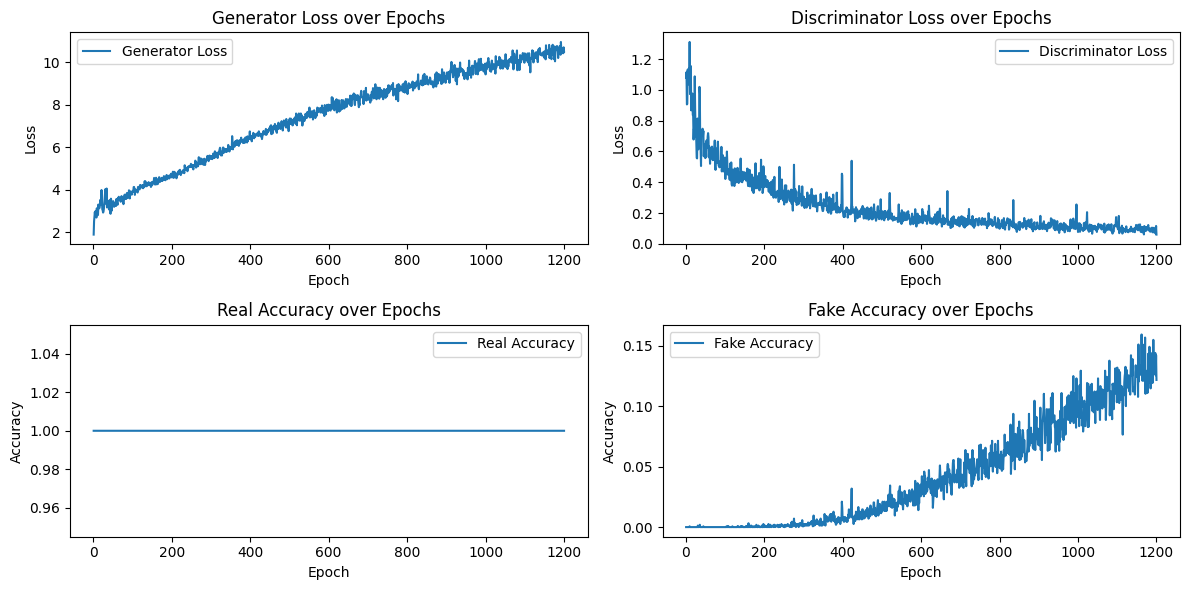

In [2]:
import re
import matplotlib.pyplot as plt

# Provided text
text = """
tf.Tensor([[0.50079393]], shape=(1, 1), dtype=float32)
Epoch 1, gen loss=1.8851561546325684, disc loss=1.0779154300689697, real accuracy=1.0, fake accuracy=0.0, 0:00:15.14
1/1 [==============================] - 0s 126ms/step
Epoch 2, gen loss=2.509906768798828, disc loss=1.115323781967163, real accuracy=1.0, fake accuracy=0.0, 0:00:06.86
1/1 [==============================] - 0s 27ms/step
Epoch 3, gen loss=2.7519900798797607, disc loss=0.9057724475860596, real accuracy=1.0, fake accuracy=0.0, 0:00:06.84
1/1 [==============================] - 0s 18ms/step
Epoch 4, gen loss=2.9440743923187256, disc loss=0.9097292423248291, real accuracy=1.0, fake accuracy=0.0, 0:00:06.71
1/1 [==============================] - 0s 26ms/step
Epoch 5, gen loss=2.758845090866089, disc loss=1.1316195726394653, real accuracy=1.0, fake accuracy=0.0, 0:00:06.57
1/1 [==============================] - 0s 17ms/step
Epoch 6, gen loss=2.9994254112243652, disc loss=1.0509006977081299, real accuracy=1.0, fake accuracy=0.0, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 7, gen loss=2.925891876220703, disc loss=1.13014817237854, real accuracy=1.0, fake accuracy=0.0, 0:00:06.45
1/1 [==============================] - 0s 17ms/step
Epoch 8, gen loss=2.688419818878174, disc loss=1.13872230052948, real accuracy=1.0, fake accuracy=0.0, 0:00:06.42
1/1 [==============================] - 0s 17ms/step
Epoch 9, gen loss=3.122980833053589, disc loss=1.0340659618377686, real accuracy=1.0, fake accuracy=0.0, 0:00:06.44
1/1 [==============================] - 0s 19ms/step
Epoch 10, gen loss=2.9293060302734375, disc loss=1.3117101192474365, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.41
1/1 [==============================] - 0s 17ms/step
Epoch 11, gen loss=2.905224323272705, disc loss=0.9730199575424194, real accuracy=1.0, fake accuracy=0.0, 0:00:06.48
1/1 [==============================] - 0s 27ms/step
Epoch 12, gen loss=2.8069915771484375, disc loss=1.1053171157836914, real accuracy=1.0, fake accuracy=0.0, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 13, gen loss=3.3002195358276367, disc loss=1.1551405191421509, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 25ms/step
Epoch 14, gen loss=3.1100358963012695, disc loss=0.8673503398895264, real accuracy=1.0, fake accuracy=0.0, 0:00:06.57
1/1 [==============================] - 0s 17ms/step
Epoch 15, gen loss=3.154663324356079, disc loss=0.9574717283248901, real accuracy=1.0, fake accuracy=0.0, 0:00:06.58
1/1 [==============================] - 0s 26ms/step
Epoch 16, gen loss=3.142296314239502, disc loss=0.9175382256507874, real accuracy=1.0, fake accuracy=0.0, 0:00:06.60
1/1 [==============================] - 0s 17ms/step
Epoch 17, gen loss=3.2702393531799316, disc loss=0.9768072366714478, real accuracy=1.0, fake accuracy=0.0, 0:00:06.59
1/1 [==============================] - 0s 25ms/step
Epoch 18, gen loss=3.519735813140869, disc loss=0.8387584090232849, real accuracy=1.0, fake accuracy=0.0, 0:00:06.57
1/1 [==============================] - 0s 17ms/step
Epoch 19, gen loss=3.3088057041168213, disc loss=0.8291720747947693, real accuracy=1.0, fake accuracy=0.0, 0:00:06.57
1/1 [==============================] - 0s 25ms/step
Epoch 20, gen loss=3.557523727416992, disc loss=0.6777958869934082, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 21, gen loss=3.984299898147583, disc loss=0.747429370880127, real accuracy=1.0, fake accuracy=0.0, 0:00:06.55
1/1 [==============================] - 0s 26ms/step
Epoch 22, gen loss=3.5166614055633545, disc loss=0.6917315721511841, real accuracy=1.0, fake accuracy=0.0, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 23, gen loss=3.0722644329071045, disc loss=1.0881460905075073, real accuracy=1.0, fake accuracy=0.0, 0:00:06.48
1/1 [==============================] - 0s 28ms/step
Epoch 24, gen loss=3.0243866443634033, disc loss=0.879649817943573, real accuracy=1.0, fake accuracy=0.0, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 25, gen loss=2.9217429161071777, disc loss=0.7485028505325317, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 26, gen loss=2.965585708618164, disc loss=0.7678980827331543, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 27, gen loss=3.0963239669799805, disc loss=0.6621924638748169, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 28, gen loss=3.3577120304107666, disc loss=0.5588362216949463, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 29, gen loss=3.5808157920837402, disc loss=0.5550901293754578, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 30, gen loss=3.836961507797241, disc loss=0.814208447933197, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 31, gen loss=4.0284342765808105, disc loss=0.6543567180633545, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 32, gen loss=3.3414182662963867, disc loss=0.6135637760162354, real accuracy=1.0, fake accuracy=0.0, 0:00:06.55
1/1 [==============================] - 0s 27ms/step
Epoch 33, gen loss=3.506497859954834, disc loss=0.6935664415359497, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 34, gen loss=4.053800582885742, disc loss=0.6538492441177368, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.50
1/1 [==============================] - 0s 27ms/step
Epoch 35, gen loss=3.1625988483428955, disc loss=1.019942045211792, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 36, gen loss=3.4987540245056152, disc loss=0.9742836356163025, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.50
1/1 [==============================] - 0s 28ms/step
Epoch 37, gen loss=3.2102766036987305, disc loss=0.6349064707756042, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 22ms/step
Epoch 38, gen loss=3.3086447715759277, disc loss=0.6093235611915588, real accuracy=1.0, fake accuracy=0.0, 0:00:06.57
1/1 [==============================] - 0s 25ms/step
Epoch 39, gen loss=3.400686740875244, disc loss=0.5056542158126831, real accuracy=1.0, fake accuracy=0.0, 0:00:06.56
1/1 [==============================] - 0s 17ms/step
Epoch 40, gen loss=3.0697455406188965, disc loss=0.7242103219032288, real accuracy=1.0, fake accuracy=0.0, 0:00:06.58
1/1 [==============================] - 0s 24ms/step
Epoch 41, gen loss=3.0673367977142334, disc loss=0.7082659006118774, real accuracy=1.0, fake accuracy=0.0, 0:00:06.57
1/1 [==============================] - 0s 18ms/step
Epoch 42, gen loss=3.5061888694763184, disc loss=0.7243960499763489, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 26ms/step
Epoch 43, gen loss=2.95316481590271, disc loss=0.7479924559593201, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 44, gen loss=2.8657467365264893, disc loss=0.7018870115280151, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 25ms/step
Epoch 45, gen loss=3.576387882232666, disc loss=0.7335318922996521, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 46, gen loss=3.472245931625366, disc loss=0.5687562823295593, real accuracy=1.0, fake accuracy=0.0, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 47, gen loss=3.011213541030884, disc loss=0.6324747800827026, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 48, gen loss=3.306759834289551, disc loss=0.5826313495635986, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 49, gen loss=3.3962996006011963, disc loss=0.6498183608055115, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 50, gen loss=3.3468804359436035, disc loss=0.5569230318069458, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 51, gen loss=3.4583616256713867, disc loss=0.6448631882667542, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 52, gen loss=3.277268648147583, disc loss=0.5653964281082153, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 53, gen loss=3.192171096801758, disc loss=0.671380341053009, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 25ms/step
Epoch 54, gen loss=3.225648880004883, disc loss=0.6250463128089905, real accuracy=1.0, fake accuracy=0.0, 0:00:06.49
1/1 [==============================] - 0s 19ms/step
Epoch 55, gen loss=3.360121965408325, disc loss=0.6304165720939636, real accuracy=1.0, fake accuracy=0.0, 0:00:06.48
1/1 [==============================] - 0s 30ms/step
Epoch 56, gen loss=3.290567398071289, disc loss=0.697568953037262, real accuracy=1.0, fake accuracy=0.0, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 57, gen loss=3.353471517562866, disc loss=0.7192260026931763, real accuracy=1.0, fake accuracy=0.0, 0:00:06.56
1/1 [==============================] - 0s 26ms/step
Epoch 58, gen loss=3.2340617179870605, disc loss=0.6930465698242188, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 59, gen loss=3.561706781387329, disc loss=0.561992883682251, real accuracy=1.0, fake accuracy=0.0, 0:00:06.55
1/1 [==============================] - 0s 25ms/step
Epoch 60, gen loss=3.3990955352783203, disc loss=0.6316472887992859, real accuracy=1.0, fake accuracy=0.0, 0:00:06.55
1/1 [==============================] - 0s 19ms/step
Epoch 61, gen loss=3.3667449951171875, disc loss=0.5948231220245361, real accuracy=1.0, fake accuracy=0.0, 0:00:06.56
1/1 [==============================] - 0s 29ms/step
Epoch 62, gen loss=3.292083501815796, disc loss=0.5203844308853149, real accuracy=1.0, fake accuracy=0.0, 0:00:06.56
1/1 [==============================] - 0s 18ms/step
Epoch 63, gen loss=3.610755681991577, disc loss=0.623336672782898, real accuracy=1.0, fake accuracy=0.0, 0:00:06.57
1/1 [==============================] - 0s 27ms/step
Epoch 64, gen loss=3.517200469970703, disc loss=0.56828773021698, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 18ms/step
Epoch 65, gen loss=3.6658549308776855, disc loss=0.555615246295929, real accuracy=1.0, fake accuracy=0.0, 0:00:06.55
1/1 [==============================] - 0s 27ms/step
Epoch 66, gen loss=3.56215238571167, disc loss=0.5788587331771851, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 67, gen loss=3.567816972732544, disc loss=0.6317678689956665, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 68, gen loss=3.5204379558563232, disc loss=0.6058263182640076, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 22ms/step
Epoch 69, gen loss=3.476600408554077, disc loss=0.5435035228729248, real accuracy=1.0, fake accuracy=0.0, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 70, gen loss=3.4308419227600098, disc loss=0.6118369102478027, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 71, gen loss=3.636580467224121, disc loss=0.5461875200271606, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 19ms/step
Epoch 72, gen loss=3.6971092224121094, disc loss=0.6163979172706604, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 73, gen loss=3.6279847621917725, disc loss=0.5975249409675598, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 74, gen loss=3.630521297454834, disc loss=0.671099841594696, real accuracy=1.0, fake accuracy=0.0, 0:00:06.59
1/1 [==============================] - 0s 28ms/step
Epoch 75, gen loss=3.5491442680358887, disc loss=0.5002844929695129, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 76, gen loss=3.389472484588623, disc loss=0.4807201325893402, real accuracy=1.0, fake accuracy=0.0, 0:00:06.55
1/1 [==============================] - 0s 34ms/step
Epoch 77, gen loss=3.317495346069336, disc loss=0.6205081939697266, real accuracy=1.0, fake accuracy=0.0, 0:00:06.56
1/1 [==============================] - 0s 18ms/step
Epoch 78, gen loss=3.492980718612671, disc loss=0.6001152992248535, real accuracy=1.0, fake accuracy=0.0, 0:00:06.58
1/1 [==============================] - 0s 32ms/step
Epoch 79, gen loss=3.6740975379943848, disc loss=0.535585880279541, real accuracy=1.0, fake accuracy=0.0, 0:00:06.55
1/1 [==============================] - 0s 18ms/step
Epoch 80, gen loss=3.7641446590423584, disc loss=0.5242685079574585, real accuracy=1.0, fake accuracy=0.0, 0:00:06.55
1/1 [==============================] - 0s 30ms/step
Epoch 81, gen loss=3.5675625801086426, disc loss=0.6189993619918823, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 18ms/step
Epoch 82, gen loss=3.745833158493042, disc loss=0.6641275882720947, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 37ms/step
Epoch 83, gen loss=3.7660274505615234, disc loss=0.5984330177307129, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 84, gen loss=3.5638508796691895, disc loss=0.5078874826431274, real accuracy=1.0, fake accuracy=0.0, 0:00:06.57
1/1 [==============================] - 0s 28ms/step
Epoch 85, gen loss=3.693927764892578, disc loss=0.508964478969574, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 86, gen loss=3.846431255340576, disc loss=0.49730029702186584, real accuracy=1.0, fake accuracy=0.0, 0:00:06.58
1/1 [==============================] - 0s 29ms/step
Epoch 87, gen loss=3.6679904460906982, disc loss=0.5347457528114319, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 88, gen loss=3.6124541759490967, disc loss=0.5100792050361633, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 89, gen loss=3.7483034133911133, disc loss=0.5001672506332397, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 90, gen loss=3.6707844734191895, disc loss=0.5427058339118958, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 91, gen loss=3.9708609580993652, disc loss=0.6301352977752686, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 92, gen loss=3.7080767154693604, disc loss=0.4704909920692444, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 18ms/step
Epoch 93, gen loss=3.5873098373413086, disc loss=0.5120484232902527, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 18ms/step
Epoch 94, gen loss=3.925212860107422, disc loss=0.5775932669639587, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 23ms/step
Epoch 95, gen loss=3.8859646320343018, disc loss=0.5394807457923889, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 96, gen loss=3.86106276512146, disc loss=0.4706741273403168, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 97, gen loss=3.8790862560272217, disc loss=0.47166383266448975, real accuracy=1.0, fake accuracy=0.0, 0:00:06.57
1/1 [==============================] - 0s 26ms/step
Epoch 98, gen loss=3.765350103378296, disc loss=0.5245097279548645, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 21ms/step
Epoch 99, gen loss=3.9143242835998535, disc loss=0.5061153769493103, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 28ms/step
Epoch 100, gen loss=3.890803098678589, disc loss=0.560637354850769, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 101, gen loss=3.9466919898986816, disc loss=0.42140477895736694, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 28ms/step
Epoch 102, gen loss=3.900717258453369, disc loss=0.4856519103050232, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 103, gen loss=4.122430324554443, disc loss=0.48576486110687256, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 29ms/step
Epoch 104, gen loss=4.129857063293457, disc loss=0.463130921125412, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 105, gen loss=4.018420219421387, disc loss=0.5997176766395569, real accuracy=1.0, fake accuracy=0.0, 0:00:06.57
1/1 [==============================] - 0s 26ms/step
Epoch 106, gen loss=3.755725145339966, disc loss=0.5164774060249329, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 107, gen loss=3.960219383239746, disc loss=0.45034369826316833, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 30ms/step
Epoch 108, gen loss=4.010929107666016, disc loss=0.45532071590423584, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 109, gen loss=3.939122438430786, disc loss=0.47046077251434326, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 110, gen loss=3.958148241043091, disc loss=0.48602965474128723, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 111, gen loss=3.9757230281829834, disc loss=0.44218316674232483, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 112, gen loss=3.905129909515381, disc loss=0.4170205891132355, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 113, gen loss=3.8653552532196045, disc loss=0.4522908329963684, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 114, gen loss=4.127185821533203, disc loss=0.5236763954162598, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 115, gen loss=4.023557186126709, disc loss=0.4127883017063141, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 116, gen loss=4.0417304039001465, disc loss=0.5289649963378906, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 117, gen loss=4.07320499420166, disc loss=0.38888412714004517, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 118, gen loss=4.010478496551514, disc loss=0.37822139263153076, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 38ms/step
Epoch 119, gen loss=4.214365005493164, disc loss=0.48174887895584106, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.53
1/1 [==============================] - 0s 18ms/step
Epoch 120, gen loss=4.080346584320068, disc loss=0.457517147064209, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 25ms/step
Epoch 121, gen loss=4.201324462890625, disc loss=0.48010632395744324, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 122, gen loss=4.133978843688965, disc loss=0.4585827887058258, real accuracy=1.0, fake accuracy=0.0, 0:00:06.57
1/1 [==============================] - 0s 27ms/step
Epoch 123, gen loss=4.163381099700928, disc loss=0.45282939076423645, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 19ms/step
Epoch 124, gen loss=4.103776454925537, disc loss=0.37557628750801086, real accuracy=1.0, fake accuracy=0.0, 0:00:06.57
1/1 [==============================] - 0s 30ms/step
Epoch 125, gen loss=4.210137367248535, disc loss=0.4902878999710083, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 126, gen loss=4.127951622009277, disc loss=0.44138187170028687, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 29ms/step
Epoch 127, gen loss=4.067050933837891, disc loss=0.39802229404449463, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 128, gen loss=4.224844932556152, disc loss=0.47431284189224243, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 25ms/step
Epoch 129, gen loss=4.150909423828125, disc loss=0.46794766187667847, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 130, gen loss=4.118886470794678, disc loss=0.400756299495697, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 25ms/step
Epoch 131, gen loss=4.3971662521362305, disc loss=0.4412810802459717, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 132, gen loss=4.2264533042907715, disc loss=0.4938698709011078, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.53
1/1 [==============================] - 0s 18ms/step
Epoch 133, gen loss=4.386719226837158, disc loss=0.4567040503025055, real accuracy=1.0, fake accuracy=0.0, 0:00:06.55
1/1 [==============================] - 0s 18ms/step
Epoch 134, gen loss=4.185976505279541, disc loss=0.4434731900691986, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.53
1/1 [==============================] - 0s 23ms/step
Epoch 135, gen loss=4.208053112030029, disc loss=0.39530816674232483, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 136, gen loss=4.159449100494385, disc loss=0.4230261743068695, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 137, gen loss=4.212734699249268, disc loss=0.4613282084465027, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 138, gen loss=4.282602787017822, disc loss=0.4346555173397064, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 139, gen loss=4.205634117126465, disc loss=0.4397285282611847, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 19ms/step
Epoch 140, gen loss=4.271727085113525, disc loss=0.5540995597839355, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 141, gen loss=4.35544490814209, disc loss=0.40846091508865356, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 26ms/step
Epoch 142, gen loss=4.215745449066162, disc loss=0.40183770656585693, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 143, gen loss=4.242126941680908, disc loss=0.45373815298080444, real accuracy=1.0, fake accuracy=0.0, 0:00:06.56
1/1 [==============================] - 0s 24ms/step
Epoch 144, gen loss=4.233229637145996, disc loss=0.4004303216934204, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 145, gen loss=4.268063068389893, disc loss=0.4685240685939789, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.58
1/1 [==============================] - 0s 26ms/step
Epoch 146, gen loss=4.302145957946777, disc loss=0.41649091243743896, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 147, gen loss=4.129032135009766, disc loss=0.454174667596817, real accuracy=1.0, fake accuracy=0.0, 0:00:06.58
1/1 [==============================] - 0s 27ms/step
Epoch 148, gen loss=4.3384504318237305, disc loss=0.4186720550060272, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 149, gen loss=4.218328475952148, disc loss=0.4417978525161743, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 26ms/step
Epoch 150, gen loss=4.202663421630859, disc loss=0.46499761939048767, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 151, gen loss=4.37034797668457, disc loss=0.44747450947761536, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 24ms/step
Epoch 152, gen loss=4.334346294403076, disc loss=0.440402626991272, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 153, gen loss=4.308432102203369, disc loss=0.45467305183410645, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.56
1/1 [==============================] - 0s 28ms/step
Epoch 154, gen loss=4.325495719909668, disc loss=0.4110426604747772, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 155, gen loss=4.552574634552002, disc loss=0.44882887601852417, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.56
1/1 [==============================] - 0s 17ms/step
Epoch 156, gen loss=4.258627891540527, disc loss=0.4500356912612915, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 157, gen loss=4.406209945678711, disc loss=0.4892703592777252, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 158, gen loss=4.242920398712158, disc loss=0.4045736789703369, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 159, gen loss=4.326615810394287, disc loss=0.37555310130119324, real accuracy=1.0, fake accuracy=0.0, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 160, gen loss=4.562130928039551, disc loss=0.48191124200820923, real accuracy=1.0, fake accuracy=0.0031887756194919348, 0:00:06.48
1/1 [==============================] - 0s 26ms/step
Epoch 161, gen loss=4.500739574432373, disc loss=0.3788110315799713, real accuracy=1.0, fake accuracy=0.0, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 162, gen loss=4.2499237060546875, disc loss=0.40426748991012573, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 31ms/step
Epoch 163, gen loss=4.469719886779785, disc loss=0.48038241267204285, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.49
1/1 [==============================] - 0s 19ms/step
Epoch 164, gen loss=4.333904266357422, disc loss=0.3726218044757843, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.54
1/1 [==============================] - 0s 29ms/step
Epoch 165, gen loss=4.272758960723877, disc loss=0.388937771320343, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 166, gen loss=4.440150260925293, disc loss=0.3901195526123047, real accuracy=1.0, fake accuracy=0.0, 0:00:06.61
1/1 [==============================] - 0s 28ms/step
Epoch 167, gen loss=4.5150275230407715, disc loss=0.4464406371116638, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.57
1/1 [==============================] - 0s 17ms/step
Epoch 168, gen loss=4.589125156402588, disc loss=0.4496549963951111, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.58
1/1 [==============================] - 0s 29ms/step
Epoch 169, gen loss=4.554838180541992, disc loss=0.44910505414009094, real accuracy=1.0, fake accuracy=0.0, 0:00:06.55
1/1 [==============================] - 0s 17ms/step
Epoch 170, gen loss=4.3628926277160645, disc loss=0.3438420593738556, real accuracy=1.0, fake accuracy=0.0, 0:00:06.56
1/1 [==============================] - 0s 25ms/step
Epoch 171, gen loss=4.407632827758789, disc loss=0.4322735071182251, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 172, gen loss=4.502511024475098, disc loss=0.38917386531829834, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.49
1/1 [==============================] - 0s 26ms/step
Epoch 173, gen loss=4.423284530639648, disc loss=0.3301875591278076, real accuracy=1.0, fake accuracy=0.0, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 174, gen loss=4.460002899169922, disc loss=0.3786666989326477, real accuracy=1.0, fake accuracy=0.0, 0:00:06.49
1/1 [==============================] - 0s 19ms/step
Epoch 175, gen loss=4.560101509094238, disc loss=0.38695070147514343, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 176, gen loss=4.40571403503418, disc loss=0.41139739751815796, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 177, gen loss=4.480607986450195, disc loss=0.42004895210266113, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 178, gen loss=4.528181552886963, disc loss=0.5233638286590576, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.55
1/1 [==============================] - 0s 17ms/step
Epoch 179, gen loss=4.460418224334717, disc loss=0.3604036569595337, real accuracy=1.0, fake accuracy=0.0, 0:00:06.55
1/1 [==============================] - 0s 17ms/step
Epoch 180, gen loss=4.638199329376221, disc loss=0.3962806463241577, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.54
1/1 [==============================] - 0s 18ms/step
Epoch 181, gen loss=4.610652923583984, disc loss=0.3652651906013489, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.53
1/1 [==============================] - 0s 18ms/step
Epoch 182, gen loss=4.484120845794678, disc loss=0.37052828073501587, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 18ms/step
Epoch 183, gen loss=4.507994651794434, disc loss=0.43934541940689087, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 27ms/step
Epoch 184, gen loss=4.443027019500732, disc loss=0.3891409933567047, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 185, gen loss=4.568151473999023, disc loss=0.40276697278022766, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.52
1/1 [==============================] - 0s 24ms/step
Epoch 186, gen loss=4.541020393371582, disc loss=0.3563344478607178, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 187, gen loss=4.69139289855957, disc loss=0.4597748816013336, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.53
1/1 [==============================] - 0s 26ms/step
Epoch 188, gen loss=4.492931365966797, disc loss=0.34721073508262634, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 189, gen loss=4.502504825592041, disc loss=0.3809926509857178, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 30ms/step
Epoch 190, gen loss=4.590936183929443, disc loss=0.38305628299713135, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 191, gen loss=4.587887763977051, disc loss=0.36820918321609497, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 24ms/step
Epoch 192, gen loss=4.6540398597717285, disc loss=0.5465412735939026, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 193, gen loss=4.616464614868164, disc loss=0.37295660376548767, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 27ms/step
Epoch 194, gen loss=4.52646017074585, disc loss=0.3780704438686371, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 195, gen loss=4.647552490234375, disc loss=0.4109065532684326, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 25ms/step
Epoch 196, gen loss=4.679204940795898, disc loss=0.33019816875457764, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 197, gen loss=4.6366682052612305, disc loss=0.3449528217315674, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 198, gen loss=4.747633457183838, disc loss=0.5036946535110474, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 199, gen loss=4.611029624938965, disc loss=0.4657750427722931, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 200, gen loss=4.583103656768799, disc loss=0.36776453256607056, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 201, gen loss=4.577695369720459, disc loss=0.37191933393478394, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 202, gen loss=4.770310401916504, disc loss=0.43572327494621277, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 203, gen loss=4.8475518226623535, disc loss=0.44050535559654236, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 204, gen loss=4.746844291687012, disc loss=0.4074866771697998, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 205, gen loss=4.553211688995361, disc loss=0.38630613684654236, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 206, gen loss=4.610397815704346, disc loss=0.36898934841156006, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 25ms/step
Epoch 207, gen loss=4.840506553649902, disc loss=0.4143722951412201, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 208, gen loss=4.631595611572266, disc loss=0.394121915102005, real accuracy=1.0, fake accuracy=0.0, 0:00:06.56
1/1 [==============================] - 0s 27ms/step
Epoch 209, gen loss=4.772597312927246, disc loss=0.4101093113422394, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 210, gen loss=4.758782386779785, disc loss=0.39611485600471497, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 29ms/step
Epoch 211, gen loss=4.74269962310791, disc loss=0.3440965414047241, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 212, gen loss=4.535568714141846, disc loss=0.33798012137413025, real accuracy=1.0, fake accuracy=0.0, 0:00:06.56
1/1 [==============================] - 0s 29ms/step
Epoch 213, gen loss=4.702415466308594, disc loss=0.35614100098609924, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 214, gen loss=4.76843786239624, disc loss=0.393768310546875, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.57
1/1 [==============================] - 0s 24ms/step
Epoch 215, gen loss=4.684272766113281, disc loss=0.3585055470466614, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 216, gen loss=4.8505635261535645, disc loss=0.3278171122074127, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.54
1/1 [==============================] - 0s 25ms/step
Epoch 217, gen loss=4.838556289672852, disc loss=0.4015269875526428, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 18ms/step
Epoch 218, gen loss=4.74744987487793, disc loss=0.31740039587020874, real accuracy=1.0, fake accuracy=0.0, 0:00:06.54
1/1 [==============================] - 0s 26ms/step
Epoch 219, gen loss=4.901299476623535, disc loss=0.31719648838043213, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.54
1/1 [==============================] - 0s 18ms/step
Epoch 220, gen loss=4.891361236572266, disc loss=0.38062629103660583, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.54
1/1 [==============================] - 0s 18ms/step
Epoch 221, gen loss=4.935079097747803, disc loss=0.33251380920410156, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.54
1/1 [==============================] - 0s 18ms/step
Epoch 222, gen loss=4.754703521728516, disc loss=0.4144318997859955, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 223, gen loss=4.686540126800537, disc loss=0.3303203284740448, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 224, gen loss=4.775012493133545, disc loss=0.29966098070144653, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 19ms/step
Epoch 225, gen loss=4.840745449066162, disc loss=0.3656079173088074, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 226, gen loss=4.851269245147705, disc loss=0.43527376651763916, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 227, gen loss=4.837525844573975, disc loss=0.3440072238445282, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.55
1/1 [==============================] - 0s 27ms/step
Epoch 228, gen loss=4.802267074584961, disc loss=0.32609859108924866, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 229, gen loss=4.919509410858154, disc loss=0.30698996782302856, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.56
1/1 [==============================] - 0s 38ms/step
Epoch 230, gen loss=4.882092475891113, disc loss=0.2993050217628479, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 231, gen loss=4.876870155334473, disc loss=0.31258144974708557, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.53
1/1 [==============================] - 0s 24ms/step
Epoch 232, gen loss=4.777783393859863, disc loss=0.3360368311405182, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 233, gen loss=5.149065017700195, disc loss=0.3293408751487732, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.55
1/1 [==============================] - 0s 25ms/step
Epoch 234, gen loss=5.024540424346924, disc loss=0.34454166889190674, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 235, gen loss=5.000955104827881, disc loss=0.33971700072288513, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.52
1/1 [==============================] - 0s 31ms/step
Epoch 236, gen loss=4.931237697601318, disc loss=0.3244341313838959, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 18ms/step
Epoch 237, gen loss=4.966331481933594, disc loss=0.27202528715133667, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 26ms/step
Epoch 238, gen loss=4.976240634918213, disc loss=0.3585331439971924, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 26ms/step
Epoch 239, gen loss=5.0420708656311035, disc loss=0.5001538395881653, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.54
1/1 [==============================] - 0s 25ms/step
Epoch 240, gen loss=4.869832992553711, disc loss=0.36109909415245056, real accuracy=1.0, fake accuracy=0.0, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 241, gen loss=5.037633895874023, disc loss=0.4033467471599579, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.52
1/1 [==============================] - 0s 30ms/step
Epoch 242, gen loss=5.013446807861328, disc loss=0.2905380129814148, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 243, gen loss=5.104953765869141, disc loss=0.32991790771484375, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 244, gen loss=5.075042247772217, disc loss=0.30424708127975464, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 245, gen loss=5.083105087280273, disc loss=0.41805508732795715, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 246, gen loss=5.0702056884765625, disc loss=0.34109094738960266, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 247, gen loss=5.083405017852783, disc loss=0.3467685580253601, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 20ms/step
Epoch 248, gen loss=5.1559672355651855, disc loss=0.2825658619403839, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 249, gen loss=5.217846393585205, disc loss=0.34417593479156494, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 250, gen loss=5.061319351196289, disc loss=0.28754866123199463, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.57
1/1 [==============================] - 0s 18ms/step
Epoch 251, gen loss=5.071113586425781, disc loss=0.25557032227516174, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 252, gen loss=5.0982489585876465, disc loss=0.30141568183898926, real accuracy=1.0, fake accuracy=0.0, 0:00:06.55
1/1 [==============================] - 0s 25ms/step
Epoch 253, gen loss=5.169306755065918, disc loss=0.379779189825058, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 254, gen loss=5.046145915985107, disc loss=0.310337096452713, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.53
1/1 [==============================] - 0s 25ms/step
Epoch 255, gen loss=4.9554901123046875, disc loss=0.3506692349910736, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 256, gen loss=5.1294684410095215, disc loss=0.3798190951347351, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.55
1/1 [==============================] - 0s 34ms/step
Epoch 257, gen loss=5.157621383666992, disc loss=0.269376277923584, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.54
1/1 [==============================] - 0s 18ms/step
Epoch 258, gen loss=5.123444557189941, disc loss=0.29954779148101807, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.57
1/1 [==============================] - 0s 24ms/step
Epoch 259, gen loss=5.120019435882568, disc loss=0.326602041721344, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 260, gen loss=5.368351936340332, disc loss=0.30739983916282654, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.51
1/1 [==============================] - 0s 26ms/step
Epoch 261, gen loss=5.314004898071289, disc loss=0.3141070604324341, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.51
1/1 [==============================] - 0s 19ms/step
Epoch 262, gen loss=5.040467739105225, disc loss=0.3455997407436371, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.51
1/1 [==============================] - 0s 25ms/step
Epoch 263, gen loss=5.284924030303955, disc loss=0.309810996055603, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 264, gen loss=5.091468334197998, disc loss=0.2848140597343445, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.50
1/1 [==============================] - 0s 25ms/step
Epoch 265, gen loss=5.241296768188477, disc loss=0.28067463636398315, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.49
1/1 [==============================] - 0s 19ms/step
Epoch 266, gen loss=5.2332282066345215, disc loss=0.27702686190605164, real accuracy=1.0, fake accuracy=0.0, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 267, gen loss=5.103857040405273, disc loss=0.28902727365493774, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 268, gen loss=5.3082804679870605, disc loss=0.30578717589378357, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 269, gen loss=5.52920389175415, disc loss=0.3525221645832062, real accuracy=1.0, fake accuracy=0.0038265306502580643, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 270, gen loss=5.266477108001709, disc loss=0.26166832447052, real accuracy=1.0, fake accuracy=0.0, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 271, gen loss=5.372648239135742, disc loss=0.34935417771339417, real accuracy=1.0, fake accuracy=0.004464285913854837, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 272, gen loss=5.195975303649902, disc loss=0.2686130702495575, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 273, gen loss=5.4116291999816895, disc loss=0.21585559844970703, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 26ms/step
Epoch 274, gen loss=5.476360321044922, disc loss=0.32918819785118103, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.51
1/1 [==============================] - 0s 19ms/step
Epoch 275, gen loss=5.29641056060791, disc loss=0.28357934951782227, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.52
1/1 [==============================] - 0s 30ms/step
Epoch 276, gen loss=5.305927276611328, disc loss=0.513841450214386, real accuracy=1.0, fake accuracy=0.007015306036919355, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 277, gen loss=5.203482627868652, disc loss=0.29611489176750183, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.53
1/1 [==============================] - 0s 27ms/step
Epoch 278, gen loss=5.433414459228516, disc loss=0.30836963653564453, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 279, gen loss=5.366302967071533, disc loss=0.3558295965194702, real accuracy=1.0, fake accuracy=0.0031887756194919348, 0:00:06.56
1/1 [==============================] - 0s 28ms/step
Epoch 280, gen loss=5.251053810119629, disc loss=0.27306655049324036, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 281, gen loss=5.1718597412109375, disc loss=0.31120234727859497, real accuracy=1.0, fake accuracy=0.0, 0:00:06.53
1/1 [==============================] - 0s 33ms/step
Epoch 282, gen loss=5.431927680969238, disc loss=0.33992648124694824, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 283, gen loss=5.457666397094727, disc loss=0.25195974111557007, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.53
1/1 [==============================] - 0s 27ms/step
Epoch 284, gen loss=5.35465669631958, disc loss=0.2894192337989807, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 285, gen loss=5.162461280822754, disc loss=0.29632312059402466, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.56
1/1 [==============================] - 0s 31ms/step
Epoch 286, gen loss=5.365151405334473, disc loss=0.2860727608203888, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 287, gen loss=5.323150157928467, disc loss=0.25748777389526367, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 288, gen loss=5.393173694610596, disc loss=0.2598176896572113, real accuracy=1.0, fake accuracy=0.0, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 289, gen loss=5.4680562019348145, disc loss=0.37592610716819763, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 290, gen loss=5.42166805267334, disc loss=0.3397025763988495, real accuracy=1.0, fake accuracy=0.0031887756194919348, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 291, gen loss=5.592582702636719, disc loss=0.3188468813896179, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 292, gen loss=5.524831771850586, disc loss=0.27684468030929565, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 293, gen loss=5.466232776641846, disc loss=0.28976374864578247, real accuracy=1.0, fake accuracy=0.0031887756194919348, 0:00:06.50
1/1 [==============================] - 0s 19ms/step
Epoch 294, gen loss=5.34371280670166, disc loss=0.29773908853530884, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 295, gen loss=5.485581874847412, disc loss=0.32311803102493286, real accuracy=1.0, fake accuracy=0.0038265306502580643, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 296, gen loss=5.603539943695068, disc loss=0.24776571989059448, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.55
1/1 [==============================] - 0s 29ms/step
Epoch 297, gen loss=5.604461669921875, disc loss=0.37310710549354553, real accuracy=1.0, fake accuracy=0.005739795975387096, 0:00:06.50
1/1 [==============================] - 0s 19ms/step
Epoch 298, gen loss=5.448154926300049, disc loss=0.26405069231987, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.54
1/1 [==============================] - 0s 30ms/step
Epoch 299, gen loss=5.52817964553833, disc loss=0.25129663944244385, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.49
1/1 [==============================] - 0s 19ms/step
Epoch 300, gen loss=5.558359622955322, disc loss=0.28841403126716614, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.53
1/1 [==============================] - 0s 25ms/step
Epoch 301, gen loss=5.467280864715576, disc loss=0.306216835975647, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 302, gen loss=5.578090667724609, disc loss=0.28230026364326477, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.54
1/1 [==============================] - 0s 25ms/step
Epoch 303, gen loss=5.439089298248291, disc loss=0.2328253984451294, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 304, gen loss=5.559402942657471, disc loss=0.28628990054130554, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.51
1/1 [==============================] - 0s 25ms/step
Epoch 305, gen loss=5.484914302825928, disc loss=0.2859657108783722, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 306, gen loss=5.699873924255371, disc loss=0.2914969325065613, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.56
1/1 [==============================] - 0s 26ms/step
Epoch 307, gen loss=5.485256195068359, disc loss=0.2791481018066406, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 308, gen loss=5.680330753326416, disc loss=0.2355610430240631, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.55
1/1 [==============================] - 0s 32ms/step
Epoch 309, gen loss=5.491532802581787, disc loss=0.2783511281013489, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 310, gen loss=5.804840564727783, disc loss=0.3329821527004242, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.52
1/1 [==============================] - 0s 19ms/step
Epoch 311, gen loss=5.5494489669799805, disc loss=0.27144649624824524, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 312, gen loss=5.753490447998047, disc loss=0.24918557703495026, real accuracy=1.0, fake accuracy=0.0038265306502580643, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 313, gen loss=5.635129451751709, disc loss=0.28694894909858704, real accuracy=1.0, fake accuracy=0.0031887756194919348, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 314, gen loss=5.598452091217041, disc loss=0.26717978715896606, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 315, gen loss=5.5784173011779785, disc loss=0.2839035093784332, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 316, gen loss=5.610086441040039, disc loss=0.31541433930397034, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.50
1/1 [==============================] - 0s 21ms/step
Epoch 317, gen loss=5.492293357849121, disc loss=0.23069366812705994, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 318, gen loss=5.684432506561279, disc loss=0.2781350612640381, real accuracy=1.0, fake accuracy=0.0038265306502580643, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 319, gen loss=5.770961284637451, disc loss=0.2722654342651367, real accuracy=1.0, fake accuracy=0.0031887756194919348, 0:00:06.50
1/1 [==============================] - 0s 25ms/step
Epoch 320, gen loss=5.680723190307617, disc loss=0.3200080692768097, real accuracy=1.0, fake accuracy=0.0038265306502580643, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 321, gen loss=5.815985679626465, disc loss=0.35715124011039734, real accuracy=1.0, fake accuracy=0.005102040711790323, 0:00:06.47
1/1 [==============================] - 0s 24ms/step
Epoch 322, gen loss=5.901556968688965, disc loss=0.28794607520103455, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 323, gen loss=5.9744462966918945, disc loss=0.26918724179267883, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.49
1/1 [==============================] - 0s 26ms/step
Epoch 324, gen loss=5.946989059448242, disc loss=0.250793993473053, real accuracy=1.0, fake accuracy=0.0006377550889737904, 0:00:06.52
1/1 [==============================] - 0s 20ms/step
Epoch 325, gen loss=5.616135120391846, disc loss=0.24364030361175537, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.51
1/1 [==============================] - 0s 25ms/step
Epoch 326, gen loss=5.762412071228027, disc loss=0.31354957818984985, real accuracy=1.0, fake accuracy=0.00956632662564516, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 327, gen loss=5.6602888107299805, disc loss=0.26301875710487366, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.54
1/1 [==============================] - 0s 25ms/step
Epoch 328, gen loss=5.608231067657471, disc loss=0.25541532039642334, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.55
1/1 [==============================] - 0s 17ms/step
Epoch 329, gen loss=5.804245948791504, disc loss=0.30055490136146545, real accuracy=1.0, fake accuracy=0.004464285913854837, 0:00:06.55
1/1 [==============================] - 0s 30ms/step
Epoch 330, gen loss=5.718597412109375, disc loss=0.2408394068479538, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 331, gen loss=5.9880266189575195, disc loss=0.2537815272808075, real accuracy=1.0, fake accuracy=0.004464285913854837, 0:00:06.50
1/1 [==============================] - 0s 26ms/step
Epoch 332, gen loss=5.827372074127197, disc loss=0.31442391872406006, real accuracy=1.0, fake accuracy=0.005102040711790323, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 333, gen loss=5.742504596710205, disc loss=0.2447013109922409, real accuracy=1.0, fake accuracy=0.005102040711790323, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 334, gen loss=5.931442737579346, disc loss=0.25238072872161865, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 335, gen loss=5.899428367614746, disc loss=0.21078872680664062, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 336, gen loss=5.881052017211914, disc loss=0.24132366478443146, real accuracy=1.0, fake accuracy=0.0038265306502580643, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 337, gen loss=5.818264484405518, disc loss=0.26317456364631653, real accuracy=1.0, fake accuracy=0.0038265306502580643, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 338, gen loss=5.7731757164001465, disc loss=0.2642521858215332, real accuracy=1.0, fake accuracy=0.0038265306502580643, 0:00:06.51
1/1 [==============================] - 0s 16ms/step
Epoch 339, gen loss=5.917652130126953, disc loss=0.25280454754829407, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 340, gen loss=5.840325832366943, disc loss=0.2578098773956299, real accuracy=1.0, fake accuracy=0.005102040711790323, 0:00:06.55
1/1 [==============================] - 0s 18ms/step
Epoch 341, gen loss=5.79172420501709, disc loss=0.2691318094730377, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 342, gen loss=5.894094467163086, disc loss=0.2521950900554657, real accuracy=1.0, fake accuracy=0.0038265306502580643, 0:00:06.52
1/1 [==============================] - 0s 29ms/step
Epoch 343, gen loss=5.866983890533447, disc loss=0.2560200095176697, real accuracy=1.0, fake accuracy=0.005739795975387096, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 344, gen loss=6.1062493324279785, disc loss=0.3244330883026123, real accuracy=1.0, fake accuracy=0.007015306036919355, 0:00:06.49
1/1 [==============================] - 0s 33ms/step
Epoch 345, gen loss=6.035584926605225, disc loss=0.2581081688404083, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:10.23
1/1 [==============================] - 0s 17ms/step
Epoch 346, gen loss=6.004829406738281, disc loss=0.2678579092025757, real accuracy=1.0, fake accuracy=0.004464285913854837, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 347, gen loss=5.7973952293396, disc loss=0.2393246740102768, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 348, gen loss=5.945711612701416, disc loss=0.2247142344713211, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 349, gen loss=6.0079665184021, disc loss=0.21358667314052582, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.56
1/1 [==============================] - 0s 18ms/step
Epoch 350, gen loss=5.95111083984375, disc loss=0.21309895813465118, real accuracy=1.0, fake accuracy=0.004464285913854837, 0:00:06.56
1/1 [==============================] - 0s 17ms/step
Epoch 351, gen loss=5.922061443328857, disc loss=0.2256254404783249, real accuracy=1.0, fake accuracy=0.0031887756194919348, 0:00:06.56
1/1 [==============================] - 0s 17ms/step
Epoch 352, gen loss=5.954732894897461, disc loss=0.29011932015419006, real accuracy=1.0, fake accuracy=0.0031887756194919348, 0:00:06.60
1/1 [==============================] - 0s 27ms/step
Epoch 353, gen loss=5.926159381866455, disc loss=0.2569277882575989, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.54
1/1 [==============================] - 0s 20ms/step
Epoch 354, gen loss=6.52072286605835, disc loss=0.2694172263145447, real accuracy=1.0, fake accuracy=0.010841837152838707, 0:00:06.52
1/1 [==============================] - 0s 26ms/step
Epoch 355, gen loss=6.205036163330078, disc loss=0.24570783972740173, real accuracy=1.0, fake accuracy=0.005739795975387096, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 356, gen loss=5.8991217613220215, disc loss=0.2465447336435318, real accuracy=1.0, fake accuracy=0.0012755101779475808, 0:00:06.52
1/1 [==============================] - 0s 24ms/step
Epoch 357, gen loss=6.108734607696533, disc loss=0.26509329676628113, real accuracy=1.0, fake accuracy=0.008928571827709675, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 358, gen loss=6.1219587326049805, disc loss=0.2755599617958069, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.48
1/1 [==============================] - 0s 28ms/step
Epoch 359, gen loss=6.170090675354004, disc loss=0.3341647982597351, real accuracy=1.0, fake accuracy=0.008928571827709675, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 360, gen loss=6.022693634033203, disc loss=0.2167496234178543, real accuracy=1.0, fake accuracy=0.005102040711790323, 0:00:06.48
1/1 [==============================] - 0s 25ms/step
Epoch 361, gen loss=6.265472888946533, disc loss=0.2414662092924118, real accuracy=1.0, fake accuracy=0.007015306036919355, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 362, gen loss=6.190789222717285, disc loss=0.22245235741138458, real accuracy=1.0, fake accuracy=0.004464285913854837, 0:00:06.49
1/1 [==============================] - 0s 24ms/step
Epoch 363, gen loss=6.258880615234375, disc loss=0.2049444317817688, real accuracy=1.0, fake accuracy=0.0076530613005161285, 0:00:06.49
1/1 [==============================] - 0s 16ms/step
Epoch 364, gen loss=6.1063127517700195, disc loss=0.2023472934961319, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.50
1/1 [==============================] - 0s 25ms/step
Epoch 365, gen loss=6.307464122772217, disc loss=0.23894549906253815, real accuracy=1.0, fake accuracy=0.005102040711790323, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 366, gen loss=6.104575157165527, disc loss=0.30384066700935364, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 367, gen loss=6.323954105377197, disc loss=0.28824344277381897, real accuracy=1.0, fake accuracy=0.00956632662564516, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 368, gen loss=6.2208757400512695, disc loss=0.24985472857952118, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 369, gen loss=6.2445173263549805, disc loss=0.24958495795726776, real accuracy=1.0, fake accuracy=0.010841837152838707, 0:00:06.52
1/1 [==============================] - 0s 23ms/step
Epoch 370, gen loss=6.201221466064453, disc loss=0.19518370926380157, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 371, gen loss=6.062465190887451, disc loss=0.2005424052476883, real accuracy=1.0, fake accuracy=0.004464285913854837, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 372, gen loss=6.314363956451416, disc loss=0.292072057723999, real accuracy=1.0, fake accuracy=0.010841837152838707, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 373, gen loss=6.146565914154053, disc loss=0.2374361902475357, real accuracy=1.0, fake accuracy=0.005739795975387096, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 374, gen loss=6.273636817932129, disc loss=0.2214965671300888, real accuracy=1.0, fake accuracy=0.007015306036919355, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 375, gen loss=6.3299126625061035, disc loss=0.23996996879577637, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.48
1/1 [==============================] - 0s 29ms/step
Epoch 376, gen loss=6.321864604949951, disc loss=0.3200090527534485, real accuracy=1.0, fake accuracy=0.012117346748709679, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 377, gen loss=6.448211669921875, disc loss=0.2462480515241623, real accuracy=1.0, fake accuracy=0.012755102477967739, 0:00:10.23
1/1 [==============================] - 0s 17ms/step
Epoch 378, gen loss=6.265085697174072, disc loss=0.22170224785804749, real accuracy=1.0, fake accuracy=0.005102040711790323, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 379, gen loss=6.259960651397705, disc loss=0.24456948041915894, real accuracy=1.0, fake accuracy=0.00956632662564516, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 380, gen loss=6.332008361816406, disc loss=0.25509268045425415, real accuracy=1.0, fake accuracy=0.004464285913854837, 0:00:06.56
1/1 [==============================] - 0s 17ms/step
Epoch 381, gen loss=6.228723049163818, disc loss=0.24912244081497192, real accuracy=1.0, fake accuracy=0.005102040711790323, 0:00:06.60
1/1 [==============================] - 0s 17ms/step
Epoch 382, gen loss=6.195405960083008, disc loss=0.26392146944999695, real accuracy=1.0, fake accuracy=0.0031887756194919348, 0:00:06.58
1/1 [==============================] - 0s 18ms/step
Epoch 383, gen loss=6.264756679534912, disc loss=0.25121408700942993, real accuracy=1.0, fake accuracy=0.0019132653251290321, 0:00:06.55
1/1 [==============================] - 0s 19ms/step
Epoch 384, gen loss=6.3741068840026855, disc loss=0.20384904742240906, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 385, gen loss=6.381494045257568, disc loss=0.33269044756889343, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.50
1/1 [==============================] - 0s 20ms/step
Epoch 386, gen loss=6.203516006469727, disc loss=0.2586241066455841, real accuracy=1.0, fake accuracy=0.007015306036919355, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 387, gen loss=6.297990322113037, disc loss=0.2034897655248642, real accuracy=1.0, fake accuracy=0.0038265306502580643, 0:00:06.52
1/1 [==============================] - 0s 26ms/step
Epoch 388, gen loss=6.4626054763793945, disc loss=0.24086305499076843, real accuracy=1.0, fake accuracy=0.005739795975387096, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 389, gen loss=6.273151397705078, disc loss=0.21610894799232483, real accuracy=1.0, fake accuracy=0.008290816098451614, 0:00:06.49
1/1 [==============================] - 0s 28ms/step
Epoch 390, gen loss=6.2987961769104, disc loss=0.2365899235010147, real accuracy=1.0, fake accuracy=0.005739795975387096, 0:00:06.48
1/1 [==============================] - 0s 19ms/step
Epoch 391, gen loss=6.308772563934326, disc loss=0.2263331562280655, real accuracy=1.0, fake accuracy=0.004464285913854837, 0:00:06.54
1/1 [==============================] - 0s 33ms/step
Epoch 392, gen loss=6.222995281219482, disc loss=0.20390121638774872, real accuracy=1.0, fake accuracy=0.0076530613005161285, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 393, gen loss=6.510330677032471, disc loss=0.21721892058849335, real accuracy=1.0, fake accuracy=0.0076530613005161285, 0:00:06.56
1/1 [==============================] - 0s 27ms/step
Epoch 394, gen loss=6.284912109375, disc loss=0.21315138041973114, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 395, gen loss=6.42910099029541, disc loss=0.20984794199466705, real accuracy=1.0, fake accuracy=0.005739795975387096, 0:00:06.54
1/1 [==============================] - 0s 29ms/step
Epoch 396, gen loss=6.447131156921387, disc loss=0.25069352984428406, real accuracy=1.0, fake accuracy=0.005739795975387096, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 397, gen loss=6.492317199707031, disc loss=0.21947820484638214, real accuracy=1.0, fake accuracy=0.005739795975387096, 0:00:06.51
1/1 [==============================] - 0s 24ms/step
Epoch 398, gen loss=6.411458492279053, disc loss=0.45549726486206055, real accuracy=1.0, fake accuracy=0.02104591764509678, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 399, gen loss=6.742340087890625, disc loss=0.4456039369106293, real accuracy=1.0, fake accuracy=0.015943877398967743, 0:00:06.55
1/1 [==============================] - 0s 28ms/step
Epoch 400, gen loss=6.374953746795654, disc loss=0.22251223027706146, real accuracy=1.0, fake accuracy=0.005739795975387096, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 401, gen loss=6.499843120574951, disc loss=0.19967134296894073, real accuracy=1.0, fake accuracy=0.008290816098451614, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 402, gen loss=6.519073963165283, disc loss=0.18301475048065186, real accuracy=1.0, fake accuracy=0.0076530613005161285, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 403, gen loss=6.525987148284912, disc loss=0.17461858689785004, real accuracy=1.0, fake accuracy=0.004464285913854837, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 404, gen loss=6.277988910675049, disc loss=0.19710275530815125, real accuracy=1.0, fake accuracy=0.004464285913854837, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 405, gen loss=6.538853645324707, disc loss=0.17370173335075378, real accuracy=1.0, fake accuracy=0.008290816098451614, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 406, gen loss=6.547461032867432, disc loss=0.21653175354003906, real accuracy=1.0, fake accuracy=0.008290816098451614, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 407, gen loss=6.559572696685791, disc loss=0.21623942255973816, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 408, gen loss=6.675380706787109, disc loss=0.21470598876476288, real accuracy=1.0, fake accuracy=0.0076530613005161285, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 409, gen loss=6.432518005371094, disc loss=0.20924566686153412, real accuracy=1.0, fake accuracy=0.0076530613005161285, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 410, gen loss=6.419525146484375, disc loss=0.23685042560100555, real accuracy=1.0, fake accuracy=0.004464285913854837, 0:00:06.49
1/1 [==============================] - 0s 36ms/step
Epoch 411, gen loss=6.598678112030029, disc loss=0.21379852294921875, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 412, gen loss=6.5623579025268555, disc loss=0.2284328043460846, real accuracy=1.0, fake accuracy=0.004464285913854837, 0:00:06.49
1/1 [==============================] - 0s 25ms/step
Epoch 413, gen loss=6.4887166023254395, disc loss=0.1704779863357544, real accuracy=1.0, fake accuracy=0.005102040711790323, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 414, gen loss=6.586382865905762, disc loss=0.20672735571861267, real accuracy=1.0, fake accuracy=0.010204081423580647, 0:00:06.53
1/1 [==============================] - 0s 32ms/step
Epoch 415, gen loss=6.60940408706665, disc loss=0.1952970027923584, real accuracy=1.0, fake accuracy=0.00956632662564516, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 416, gen loss=6.590286731719971, disc loss=0.21669140458106995, real accuracy=1.0, fake accuracy=0.014668367803096771, 0:00:06.51
1/1 [==============================] - 0s 35ms/step
Epoch 417, gen loss=6.640172958374023, disc loss=0.1945107877254486, real accuracy=1.0, fake accuracy=0.0076530613005161285, 0:00:06.49
1/1 [==============================] - 0s 19ms/step
Epoch 418, gen loss=6.642838001251221, disc loss=0.19175629317760468, real accuracy=1.0, fake accuracy=0.010841837152838707, 0:00:06.49
1/1 [==============================] - 0s 34ms/step
Epoch 419, gen loss=6.611445903778076, disc loss=0.217805877327919, real accuracy=1.0, fake accuracy=0.012117346748709679, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 420, gen loss=6.528305530548096, disc loss=0.19265669584274292, real accuracy=1.0, fake accuracy=0.00956632662564516, 0:00:06.50
1/1 [==============================] - 0s 26ms/step
Epoch 421, gen loss=6.665081977844238, disc loss=0.19305530190467834, real accuracy=1.0, fake accuracy=0.008928571827709675, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 422, gen loss=6.746303081512451, disc loss=0.2663404643535614, real accuracy=1.0, fake accuracy=0.020408162847161293, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 423, gen loss=6.5494890213012695, disc loss=0.5396398901939392, real accuracy=1.0, fake accuracy=0.031887754797935486, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 424, gen loss=6.609142780303955, disc loss=0.240632563829422, real accuracy=1.0, fake accuracy=0.010204081423580647, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 425, gen loss=6.645449161529541, disc loss=0.24114292860031128, real accuracy=1.0, fake accuracy=0.0076530613005161285, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 426, gen loss=6.543896675109863, disc loss=0.20098817348480225, real accuracy=1.0, fake accuracy=0.008290816098451614, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 427, gen loss=6.551420211791992, disc loss=0.2062067836523056, real accuracy=1.0, fake accuracy=0.005739795975387096, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 428, gen loss=6.494150161743164, disc loss=0.2111389935016632, real accuracy=1.0, fake accuracy=0.0025510203558951616, 0:00:06.50
1/1 [==============================] - 0s 19ms/step
Epoch 429, gen loss=6.623165130615234, disc loss=0.2213401198387146, real accuracy=1.0, fake accuracy=0.005102040711790323, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 430, gen loss=6.383249759674072, disc loss=0.22429238259792328, real accuracy=1.0, fake accuracy=0.005102040711790323, 0:00:06.51
1/1 [==============================] - 0s 19ms/step
Epoch 431, gen loss=6.498092174530029, disc loss=0.19346770644187927, real accuracy=1.0, fake accuracy=0.00956632662564516, 0:00:06.51
1/1 [==============================] - 0s 25ms/step
Epoch 432, gen loss=6.668900966644287, disc loss=0.14612087607383728, real accuracy=1.0, fake accuracy=0.005102040711790323, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 433, gen loss=6.602565765380859, disc loss=0.18747380375862122, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.55
1/1 [==============================] - 0s 24ms/step
Epoch 434, gen loss=6.763113975524902, disc loss=0.23779073357582092, real accuracy=1.0, fake accuracy=0.012755102477967739, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 435, gen loss=6.652705192565918, disc loss=0.20865650475025177, real accuracy=1.0, fake accuracy=0.010204081423580647, 0:00:06.51
1/1 [==============================] - 0s 29ms/step
Epoch 436, gen loss=6.707199573516846, disc loss=0.21413777768611908, real accuracy=1.0, fake accuracy=0.007015306036919355, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 437, gen loss=6.719324111938477, disc loss=0.22345519065856934, real accuracy=1.0, fake accuracy=0.010841837152838707, 0:00:06.56
1/1 [==============================] - 0s 39ms/step
Epoch 438, gen loss=6.6001362800598145, disc loss=0.16654464602470398, real accuracy=1.0, fake accuracy=0.007015306036919355, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 439, gen loss=6.644466876983643, disc loss=0.19017167389392853, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.54
1/1 [==============================] - 0s 25ms/step
Epoch 440, gen loss=6.8610615730285645, disc loss=0.20986437797546387, real accuracy=1.0, fake accuracy=0.01658163219690323, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 441, gen loss=6.5796217918396, disc loss=0.21010521054267883, real accuracy=1.0, fake accuracy=0.008928571827709675, 0:00:06.55
1/1 [==============================] - 0s 28ms/step
Epoch 442, gen loss=6.6176934242248535, disc loss=0.20156168937683105, real accuracy=1.0, fake accuracy=0.008928571827709675, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 443, gen loss=6.790387153625488, disc loss=0.19908872246742249, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 444, gen loss=6.747398376464844, disc loss=0.1744731068611145, real accuracy=1.0, fake accuracy=0.012755102477967739, 0:00:06.51
1/1 [==============================] - 0s 16ms/step
Epoch 445, gen loss=6.696821689605713, disc loss=0.21701312065124512, real accuracy=1.0, fake accuracy=0.008290816098451614, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 446, gen loss=6.81479549407959, disc loss=0.2080010026693344, real accuracy=1.0, fake accuracy=0.012117346748709679, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 447, gen loss=6.749704837799072, disc loss=0.1966562718153, real accuracy=1.0, fake accuracy=0.012117346748709679, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 448, gen loss=6.890199184417725, disc loss=0.22914554178714752, real accuracy=1.0, fake accuracy=0.012755102477967739, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 449, gen loss=6.813658237457275, disc loss=0.20390646159648895, real accuracy=1.0, fake accuracy=0.0063775512389838696, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 450, gen loss=6.831624984741211, disc loss=0.19464990496635437, real accuracy=1.0, fake accuracy=0.014668367803096771, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 451, gen loss=6.983830451965332, disc loss=0.24609075486660004, real accuracy=1.0, fake accuracy=0.014668367803096771, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 452, gen loss=6.860772609710693, disc loss=0.1920701265335083, real accuracy=1.0, fake accuracy=0.012117346748709679, 0:00:06.52
1/1 [==============================] - 0s 38ms/step
Epoch 453, gen loss=7.035046577453613, disc loss=0.19202208518981934, real accuracy=1.0, fake accuracy=0.012755102477967739, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 454, gen loss=6.614870548248291, disc loss=0.16442126035690308, real accuracy=1.0, fake accuracy=0.007015306036919355, 0:00:06.54
1/1 [==============================] - 0s 26ms/step
Epoch 455, gen loss=6.949594974517822, disc loss=0.19416598975658417, real accuracy=1.0, fake accuracy=0.010204081423580647, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 456, gen loss=6.806519985198975, disc loss=0.22947150468826294, real accuracy=1.0, fake accuracy=0.011479591950774193, 0:00:06.50
1/1 [==============================] - 0s 26ms/step
Epoch 457, gen loss=6.649332523345947, disc loss=0.16876041889190674, real accuracy=1.0, fake accuracy=0.0076530613005161285, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 458, gen loss=6.8333353996276855, disc loss=0.20505370199680328, real accuracy=1.0, fake accuracy=0.012117346748709679, 0:00:06.55
1/1 [==============================] - 0s 25ms/step
Epoch 459, gen loss=6.9922194480896, disc loss=0.20979104936122894, real accuracy=1.0, fake accuracy=0.01403061207383871, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 460, gen loss=6.918905258178711, disc loss=0.16362614929676056, real accuracy=1.0, fake accuracy=0.008928571827709675, 0:00:06.52
1/1 [==============================] - 0s 25ms/step
Epoch 461, gen loss=6.8458781242370605, disc loss=0.19639818370342255, real accuracy=1.0, fake accuracy=0.010204081423580647, 0:00:06.51
1/1 [==============================] - 0s 20ms/step
Epoch 462, gen loss=6.846697807312012, disc loss=0.1899537444114685, real accuracy=1.0, fake accuracy=0.011479591950774193, 0:00:06.51
1/1 [==============================] - 0s 27ms/step
Epoch 463, gen loss=7.0944647789001465, disc loss=0.23636123538017273, real accuracy=1.0, fake accuracy=0.015943877398967743, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 464, gen loss=6.880201816558838, disc loss=0.1932564228773117, real accuracy=1.0, fake accuracy=0.011479591950774193, 0:00:06.52
1/1 [==============================] - 0s 33ms/step
Epoch 465, gen loss=6.833455562591553, disc loss=0.22650758922100067, real accuracy=1.0, fake accuracy=0.010841837152838707, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 466, gen loss=6.764107704162598, disc loss=0.15689635276794434, real accuracy=1.0, fake accuracy=0.007015306036919355, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 467, gen loss=6.734696865081787, disc loss=0.16213715076446533, real accuracy=1.0, fake accuracy=0.008290816098451614, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 468, gen loss=6.675466060638428, disc loss=0.2272471785545349, real accuracy=1.0, fake accuracy=0.01403061207383871, 0:00:06.51
1/1 [==============================] - 0s 16ms/step
Epoch 469, gen loss=7.024100303649902, disc loss=0.22564902901649475, real accuracy=1.0, fake accuracy=0.014668367803096771, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 470, gen loss=6.875431060791016, disc loss=0.19521543383598328, real accuracy=1.0, fake accuracy=0.008928571827709675, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 471, gen loss=6.853122234344482, disc loss=0.20911267399787903, real accuracy=1.0, fake accuracy=0.01785714365541935, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 472, gen loss=7.153500080108643, disc loss=0.1644439697265625, real accuracy=1.0, fake accuracy=0.01403061207383871, 0:00:06.50
1/1 [==============================] - 0s 19ms/step
Epoch 473, gen loss=7.017751216888428, disc loss=0.23653849959373474, real accuracy=1.0, fake accuracy=0.015306122601032257, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 474, gen loss=6.977252960205078, disc loss=0.18311655521392822, real accuracy=1.0, fake accuracy=0.012755102477967739, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 475, gen loss=7.010477542877197, disc loss=0.1584966778755188, real accuracy=1.0, fake accuracy=0.010204081423580647, 0:00:06.54
1/1 [==============================] - 0s 26ms/step
Epoch 476, gen loss=6.892904281616211, disc loss=0.19344213604927063, real accuracy=1.0, fake accuracy=0.011479591950774193, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 477, gen loss=6.860575199127197, disc loss=0.1982823610305786, real accuracy=1.0, fake accuracy=0.011479591950774193, 0:00:06.54
1/1 [==============================] - 0s 25ms/step
Epoch 478, gen loss=6.9530534744262695, disc loss=0.16375043988227844, real accuracy=1.0, fake accuracy=0.010841837152838707, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 479, gen loss=7.00669527053833, disc loss=0.19290375709533691, real accuracy=1.0, fake accuracy=0.020408162847161293, 0:00:06.55
1/1 [==============================] - 0s 25ms/step
Epoch 480, gen loss=7.22404146194458, disc loss=0.25641927123069763, real accuracy=1.0, fake accuracy=0.020408162847161293, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 481, gen loss=6.948667526245117, disc loss=0.2044149935245514, real accuracy=1.0, fake accuracy=0.014668367803096771, 0:00:06.53
1/1 [==============================] - 0s 25ms/step
Epoch 482, gen loss=7.175124645233154, disc loss=0.18046806752681732, real accuracy=1.0, fake accuracy=0.015943877398967743, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 483, gen loss=6.7874016761779785, disc loss=0.2065068632364273, real accuracy=1.0, fake accuracy=0.00956632662564516, 0:00:06.50
1/1 [==============================] - 0s 24ms/step
Epoch 484, gen loss=7.175622463226318, disc loss=0.1727360635995865, real accuracy=1.0, fake accuracy=0.011479591950774193, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 485, gen loss=7.003798007965088, disc loss=0.1498318463563919, real accuracy=1.0, fake accuracy=0.008928571827709675, 0:00:06.49
1/1 [==============================] - 0s 27ms/step
Epoch 486, gen loss=7.260634899139404, disc loss=0.157462477684021, real accuracy=1.0, fake accuracy=0.012117346748709679, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 487, gen loss=7.182210445404053, disc loss=0.1893024444580078, real accuracy=1.0, fake accuracy=0.013392857275903225, 0:00:06.47
1/1 [==============================] - 0s 30ms/step
Epoch 488, gen loss=7.044875144958496, disc loss=0.20019249618053436, real accuracy=1.0, fake accuracy=0.015943877398967743, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 489, gen loss=7.226373672485352, disc loss=0.23644277453422546, real accuracy=1.0, fake accuracy=0.018494898453354836, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 490, gen loss=7.12392520904541, disc loss=0.24456411600112915, real accuracy=1.0, fake accuracy=0.0223214291036129, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 491, gen loss=6.930428504943848, disc loss=0.1707036793231964, real accuracy=1.0, fake accuracy=0.00956632662564516, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 492, gen loss=7.32749080657959, disc loss=0.21342253684997559, real accuracy=1.0, fake accuracy=0.01913265325129032, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 493, gen loss=7.104294776916504, disc loss=0.16041748225688934, real accuracy=1.0, fake accuracy=0.013392857275903225, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 494, gen loss=6.9310078620910645, disc loss=0.2017831951379776, real accuracy=1.0, fake accuracy=0.011479591950774193, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 495, gen loss=7.153729438781738, disc loss=0.2133173793554306, real accuracy=1.0, fake accuracy=0.01913265325129032, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 496, gen loss=6.981767177581787, disc loss=0.176718607544899, real accuracy=1.0, fake accuracy=0.01785714365541935, 0:00:06.54
1/1 [==============================] - 0s 30ms/step
Epoch 497, gen loss=7.050089359283447, disc loss=0.28952571749687195, real accuracy=1.0, fake accuracy=0.01658163219690323, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 498, gen loss=6.7556633949279785, disc loss=0.19634182751178741, real accuracy=1.0, fake accuracy=0.011479591950774193, 0:00:06.57
1/1 [==============================] - 0s 27ms/step
Epoch 499, gen loss=7.263815879821777, disc loss=0.158651202917099, real accuracy=1.0, fake accuracy=0.014668367803096771, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 500, gen loss=7.190594673156738, disc loss=0.16052919626235962, real accuracy=1.0, fake accuracy=0.012755102477967739, 0:00:06.54
1/1 [==============================] - 0s 26ms/step
Epoch 501, gen loss=7.352543830871582, disc loss=0.20301151275634766, real accuracy=1.0, fake accuracy=0.015306122601032257, 0:00:06.53
1/1 [==============================] - 0s 18ms/step
Epoch 502, gen loss=7.109163284301758, disc loss=0.21152415871620178, real accuracy=1.0, fake accuracy=0.02104591764509678, 0:00:06.52
1/1 [==============================] - 0s 30ms/step
Epoch 503, gen loss=7.326162338256836, disc loss=0.18690340220928192, real accuracy=1.0, fake accuracy=0.014668367803096771, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 504, gen loss=7.342296600341797, disc loss=0.18979966640472412, real accuracy=1.0, fake accuracy=0.020408162847161293, 0:00:06.55
1/1 [==============================] - 0s 26ms/step
Epoch 505, gen loss=7.079807281494141, disc loss=0.19590157270431519, real accuracy=1.0, fake accuracy=0.01658163219690323, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 506, gen loss=7.17095947265625, disc loss=0.15282326936721802, real accuracy=1.0, fake accuracy=0.013392857275903225, 0:00:06.52
1/1 [==============================] - 0s 29ms/step
Epoch 507, gen loss=7.2618937492370605, disc loss=0.21171696484088898, real accuracy=1.0, fake accuracy=0.02104591764509678, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 508, gen loss=7.0259528160095215, disc loss=0.16793958842754364, real accuracy=1.0, fake accuracy=0.014668367803096771, 0:00:06.52
1/1 [==============================] - 0s 27ms/step
Epoch 509, gen loss=7.055907726287842, disc loss=0.21214349567890167, real accuracy=1.0, fake accuracy=0.013392857275903225, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 510, gen loss=7.14259672164917, disc loss=0.19539324939250946, real accuracy=1.0, fake accuracy=0.017219386994838715, 0:00:06.56
1/1 [==============================] - 0s 28ms/step
Epoch 511, gen loss=7.330063819885254, disc loss=0.17328236997127533, real accuracy=1.0, fake accuracy=0.01785714365541935, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 512, gen loss=7.270904064178467, disc loss=0.175184965133667, real accuracy=1.0, fake accuracy=0.013392857275903225, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 513, gen loss=7.365731239318848, disc loss=0.18168704211711884, real accuracy=1.0, fake accuracy=0.02104591764509678, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 514, gen loss=7.402164459228516, disc loss=0.19053196907043457, real accuracy=1.0, fake accuracy=0.01913265325129032, 0:00:06.50
1/1 [==============================] - 0s 26ms/step
Epoch 515, gen loss=7.371777534484863, disc loss=0.20028725266456604, real accuracy=1.0, fake accuracy=0.020408162847161293, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 516, gen loss=7.107669353485107, disc loss=0.1560002863407135, real accuracy=1.0, fake accuracy=0.01913265325129032, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 517, gen loss=7.585488319396973, disc loss=0.2184038907289505, real accuracy=1.0, fake accuracy=0.02678571455180645, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 518, gen loss=7.511806011199951, disc loss=0.16312454640865326, real accuracy=1.0, fake accuracy=0.017219386994838715, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 519, gen loss=7.032817840576172, disc loss=0.2741713523864746, real accuracy=1.0, fake accuracy=0.020408162847161293, 0:00:06.50
1/1 [==============================] - 0s 19ms/step
Epoch 520, gen loss=7.347572326660156, disc loss=0.33049607276916504, real accuracy=1.0, fake accuracy=0.02806122414767742, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 521, gen loss=7.328768253326416, disc loss=0.22748057544231415, real accuracy=1.0, fake accuracy=0.03443877398967743, 0:00:06.50
1/1 [==============================] - 0s 26ms/step
Epoch 522, gen loss=7.385587215423584, disc loss=0.1708165407180786, real accuracy=1.0, fake accuracy=0.01913265325129032, 0:00:06.49
1/1 [==============================] - 0s 19ms/step
Epoch 523, gen loss=7.410985946655273, disc loss=0.16358867287635803, real accuracy=1.0, fake accuracy=0.01658163219690323, 0:00:06.49
1/1 [==============================] - 0s 25ms/step
Epoch 524, gen loss=7.5875349044799805, disc loss=0.16384409368038177, real accuracy=1.0, fake accuracy=0.022959183901548386, 0:00:06.46
1/1 [==============================] - 0s 18ms/step
Epoch 525, gen loss=7.257440567016602, disc loss=0.19721031188964844, real accuracy=1.0, fake accuracy=0.02678571455180645, 0:00:06.47
1/1 [==============================] - 0s 29ms/step
Epoch 526, gen loss=7.411355018615723, disc loss=0.16310787200927734, real accuracy=1.0, fake accuracy=0.015943877398967743, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 527, gen loss=7.488713264465332, disc loss=0.17093606293201447, real accuracy=1.0, fake accuracy=0.017219386994838715, 0:00:06.53
1/1 [==============================] - 0s 29ms/step
Epoch 528, gen loss=7.252239227294922, disc loss=0.15080517530441284, real accuracy=1.0, fake accuracy=0.01658163219690323, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 529, gen loss=7.5870361328125, disc loss=0.166026771068573, real accuracy=1.0, fake accuracy=0.02359693869948387, 0:00:06.51
1/1 [==============================] - 0s 29ms/step
Epoch 530, gen loss=7.430421829223633, disc loss=0.1558983027935028, real accuracy=1.0, fake accuracy=0.01785714365541935, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 531, gen loss=7.5157999992370605, disc loss=0.1773967295885086, real accuracy=1.0, fake accuracy=0.01913265325129032, 0:00:06.52
1/1 [==============================] - 0s 26ms/step
Epoch 532, gen loss=7.371549606323242, disc loss=0.1648627519607544, real accuracy=1.0, fake accuracy=0.022959183901548386, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 533, gen loss=7.0195393562316895, disc loss=0.15663807094097137, real accuracy=1.0, fake accuracy=0.00956632662564516, 0:00:06.53
1/1 [==============================] - 0s 24ms/step
Epoch 534, gen loss=7.22885274887085, disc loss=0.16877040266990662, real accuracy=1.0, fake accuracy=0.01658163219690323, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 535, gen loss=7.378377914428711, disc loss=0.15885373950004578, real accuracy=1.0, fake accuracy=0.01658163219690323, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 536, gen loss=7.418685436248779, disc loss=0.16637860238552094, real accuracy=1.0, fake accuracy=0.01658163219690323, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 537, gen loss=7.37835693359375, disc loss=0.1638888269662857, real accuracy=1.0, fake accuracy=0.019770408049225807, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 538, gen loss=7.231110095977783, disc loss=0.16292430460453033, real accuracy=1.0, fake accuracy=0.013392857275903225, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 539, gen loss=7.356203079223633, disc loss=0.16853591799736023, real accuracy=1.0, fake accuracy=0.020408162847161293, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 540, gen loss=7.341606140136719, disc loss=0.1545855700969696, real accuracy=1.0, fake accuracy=0.01658163219690323, 0:00:06.48
1/1 [==============================] - 0s 20ms/step
Epoch 541, gen loss=7.57113790512085, disc loss=0.1414465308189392, real accuracy=1.0, fake accuracy=0.018494898453354836, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 542, gen loss=7.489389419555664, disc loss=0.19609026610851288, real accuracy=1.0, fake accuracy=0.024234693497419357, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 543, gen loss=7.421534538269043, disc loss=0.25590041279792786, real accuracy=1.0, fake accuracy=0.02997449040412903, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 544, gen loss=7.371827602386475, disc loss=0.19610647857189178, real accuracy=1.0, fake accuracy=0.020408162847161293, 0:00:06.52
1/1 [==============================] - 0s 27ms/step
Epoch 545, gen loss=7.465869426727295, disc loss=0.18189246952533722, real accuracy=1.0, fake accuracy=0.03125, 0:00:06.47
1/1 [==============================] - 0s 19ms/step
Epoch 546, gen loss=7.663639545440674, disc loss=0.15999433398246765, real accuracy=1.0, fake accuracy=0.03380101919174194, 0:00:06.48
1/1 [==============================] - 0s 26ms/step
Epoch 547, gen loss=7.4615888595581055, disc loss=0.1422799527645111, real accuracy=1.0, fake accuracy=0.01913265325129032, 0:00:06.46
1/1 [==============================] - 0s 20ms/step
Epoch 548, gen loss=7.635923862457275, disc loss=0.17651323974132538, real accuracy=1.0, fake accuracy=0.028698978945612907, 0:00:06.51
1/1 [==============================] - 0s 25ms/step
Epoch 549, gen loss=7.462239742279053, disc loss=0.19849225878715515, real accuracy=1.0, fake accuracy=0.024234693497419357, 0:00:06.46
1/1 [==============================] - 0s 18ms/step
Epoch 550, gen loss=7.471282958984375, disc loss=0.12949517369270325, real accuracy=1.0, fake accuracy=0.019770408049225807, 0:00:06.47
1/1 [==============================] - 0s 30ms/step
Epoch 551, gen loss=7.86622953414917, disc loss=0.218131884932518, real accuracy=1.0, fake accuracy=0.028698978945612907, 0:00:06.48
1/1 [==============================] - 0s 20ms/step
Epoch 552, gen loss=7.402988433837891, disc loss=0.181425079703331, real accuracy=1.0, fake accuracy=0.018494898453354836, 0:00:06.51
1/1 [==============================] - 0s 27ms/step
Epoch 553, gen loss=7.5294718742370605, disc loss=0.14959518611431122, real accuracy=1.0, fake accuracy=0.01913265325129032, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 554, gen loss=7.413665294647217, disc loss=0.14619819819927216, real accuracy=1.0, fake accuracy=0.014668367803096771, 0:00:06.50
1/1 [==============================] - 0s 32ms/step
Epoch 555, gen loss=7.428280353546143, disc loss=0.15727171301841736, real accuracy=1.0, fake accuracy=0.022959183901548386, 0:00:06.50
1/1 [==============================] - 0s 26ms/step
Epoch 556, gen loss=7.539402008056641, disc loss=0.20529767870903015, real accuracy=1.0, fake accuracy=0.020408162847161293, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 557, gen loss=7.680109977722168, disc loss=0.15709370374679565, real accuracy=1.0, fake accuracy=0.024234693497419357, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 558, gen loss=7.698097229003906, disc loss=0.15539424121379852, real accuracy=1.0, fake accuracy=0.02997449040412903, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 559, gen loss=7.5601725578308105, disc loss=0.18218320608139038, real accuracy=1.0, fake accuracy=0.024872448295354843, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 560, gen loss=7.304233074188232, disc loss=0.17425017058849335, real accuracy=1.0, fake accuracy=0.026147959753870964, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 561, gen loss=7.459460735321045, disc loss=0.15398059785366058, real accuracy=1.0, fake accuracy=0.01913265325129032, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 562, gen loss=7.618954181671143, disc loss=0.16531050205230713, real accuracy=1.0, fake accuracy=0.02359693869948387, 0:00:06.51
1/1 [==============================] - 0s 20ms/step
Epoch 563, gen loss=7.73879861831665, disc loss=0.20457343757152557, real accuracy=1.0, fake accuracy=0.02678571455180645, 0:00:06.54
1/1 [==============================] - 0s 18ms/step
Epoch 564, gen loss=7.629260540008545, disc loss=0.16100665926933289, real accuracy=1.0, fake accuracy=0.024872448295354843, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 565, gen loss=7.600805282592773, disc loss=0.1566127985715866, real accuracy=1.0, fake accuracy=0.017219386994838715, 0:00:06.55
1/1 [==============================] - 0s 32ms/step
Epoch 566, gen loss=7.370610237121582, disc loss=0.18310531973838806, real accuracy=1.0, fake accuracy=0.0223214291036129, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 567, gen loss=7.467778205871582, disc loss=0.21217644214630127, real accuracy=1.0, fake accuracy=0.026147959753870964, 0:00:06.51
1/1 [==============================] - 0s 25ms/step
Epoch 568, gen loss=7.5981764793396, disc loss=0.1710219532251358, real accuracy=1.0, fake accuracy=0.021683674305677414, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 569, gen loss=7.466046333312988, disc loss=0.1884721964597702, real accuracy=1.0, fake accuracy=0.024234693497419357, 0:00:06.51
1/1 [==============================] - 0s 27ms/step
Epoch 570, gen loss=7.691410064697266, disc loss=0.1753874272108078, real accuracy=1.0, fake accuracy=0.030612245202064514, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 571, gen loss=7.866153240203857, disc loss=0.1601143777370453, real accuracy=1.0, fake accuracy=0.027423469349741936, 0:00:06.52
1/1 [==============================] - 0s 26ms/step
Epoch 572, gen loss=7.825553894042969, disc loss=0.15345214307308197, real accuracy=1.0, fake accuracy=0.021683674305677414, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 573, gen loss=7.646650791168213, disc loss=0.12551240622997284, real accuracy=1.0, fake accuracy=0.02104591764509678, 0:00:06.48
1/1 [==============================] - 0s 25ms/step
Epoch 574, gen loss=7.688586711883545, disc loss=0.15737265348434448, real accuracy=1.0, fake accuracy=0.022959183901548386, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 575, gen loss=7.8218889236450195, disc loss=0.1353151500225067, real accuracy=1.0, fake accuracy=0.027423469349741936, 0:00:06.49
1/1 [==============================] - 0s 24ms/step
Epoch 576, gen loss=7.715188026428223, disc loss=0.16856242716312408, real accuracy=1.0, fake accuracy=0.026147959753870964, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 577, gen loss=7.757360935211182, disc loss=0.19630417227745056, real accuracy=1.0, fake accuracy=0.03125, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 578, gen loss=7.83003568649292, disc loss=0.15832126140594482, real accuracy=1.0, fake accuracy=0.02678571455180645, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 579, gen loss=7.632053375244141, disc loss=0.14634674787521362, real accuracy=1.0, fake accuracy=0.02678571455180645, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 580, gen loss=7.676893711090088, disc loss=0.12786300480365753, real accuracy=1.0, fake accuracy=0.01785714365541935, 0:00:06.46
1/1 [==============================] - 0s 20ms/step
Epoch 581, gen loss=7.8388495445251465, disc loss=0.17548425495624542, real accuracy=1.0, fake accuracy=0.026147959753870964, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 582, gen loss=7.654693603515625, disc loss=0.13404643535614014, real accuracy=1.0, fake accuracy=0.018494898453354836, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 583, gen loss=7.961767673492432, disc loss=0.17012831568717957, real accuracy=1.0, fake accuracy=0.02997449040412903, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 584, gen loss=7.622518062591553, disc loss=0.17852512001991272, real accuracy=1.0, fake accuracy=0.01785714365541935, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 585, gen loss=7.829093933105469, disc loss=0.2250382900238037, real accuracy=1.0, fake accuracy=0.03826530650258064, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 586, gen loss=7.688924789428711, disc loss=0.19107674062252045, real accuracy=1.0, fake accuracy=0.025510204955935478, 0:00:06.52
1/1 [==============================] - 0s 28ms/step
Epoch 587, gen loss=7.830641269683838, disc loss=0.1731431484222412, real accuracy=1.0, fake accuracy=0.03252550959587097, 0:00:06.48
1/1 [==============================] - 0s 19ms/step
Epoch 588, gen loss=7.5559773445129395, disc loss=0.112472765147686, real accuracy=1.0, fake accuracy=0.024872448295354843, 0:00:06.48
1/1 [==============================] - 0s 25ms/step
Epoch 589, gen loss=7.471449851989746, disc loss=0.15123771131038666, real accuracy=1.0, fake accuracy=0.018494898453354836, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 590, gen loss=7.983455657958984, disc loss=0.16315220296382904, real accuracy=1.0, fake accuracy=0.031887754797935486, 0:00:06.53
1/1 [==============================] - 0s 28ms/step
Epoch 591, gen loss=7.8524956703186035, disc loss=0.19582174718379974, real accuracy=1.0, fake accuracy=0.036352042108774185, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 592, gen loss=7.850621223449707, disc loss=0.1692204773426056, real accuracy=1.0, fake accuracy=0.027423469349741936, 0:00:06.53
1/1 [==============================] - 0s 26ms/step
Epoch 593, gen loss=7.549271583557129, disc loss=0.1387030929327011, real accuracy=1.0, fake accuracy=0.01403061207383871, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 594, gen loss=7.865760803222656, disc loss=0.13362345099449158, real accuracy=1.0, fake accuracy=0.031887754797935486, 0:00:06.47
1/1 [==============================] - 0s 25ms/step
Epoch 595, gen loss=7.733612060546875, disc loss=0.16528822481632233, real accuracy=1.0, fake accuracy=0.019770408049225807, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 596, gen loss=7.996371746063232, disc loss=0.18121318519115448, real accuracy=1.0, fake accuracy=0.03125, 0:00:06.48
1/1 [==============================] - 0s 25ms/step
Epoch 597, gen loss=7.740639686584473, disc loss=0.1579921692609787, real accuracy=1.0, fake accuracy=0.02997449040412903, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 598, gen loss=7.933043003082275, disc loss=0.16621412336826324, real accuracy=1.0, fake accuracy=0.035076528787612915, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 599, gen loss=7.711769104003906, disc loss=0.13978250324726105, real accuracy=1.0, fake accuracy=0.025510204955935478, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 600, gen loss=8.005321502685547, disc loss=0.14051170647144318, real accuracy=1.0, fake accuracy=0.035076528787612915, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 601, gen loss=7.863837242126465, disc loss=0.1763523817062378, real accuracy=1.0, fake accuracy=0.03252550959587097, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 602, gen loss=7.9507155418396, disc loss=0.144235759973526, real accuracy=1.0, fake accuracy=0.04209183529019356, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 603, gen loss=7.964378356933594, disc loss=0.22593459486961365, real accuracy=1.0, fake accuracy=0.03252550959587097, 0:00:06.53
1/1 [==============================] - 0s 19ms/step
Epoch 604, gen loss=7.7331061363220215, disc loss=0.13414384424686432, real accuracy=1.0, fake accuracy=0.027423469349741936, 0:00:06.53
1/1 [==============================] - 0s 18ms/step
Epoch 605, gen loss=7.726014614105225, disc loss=0.20772045850753784, real accuracy=1.0, fake accuracy=0.031887754797935486, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 606, gen loss=7.988626480102539, disc loss=0.15054970979690552, real accuracy=1.0, fake accuracy=0.03252550959587097, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 607, gen loss=7.799139499664307, disc loss=0.15341874957084656, real accuracy=1.0, fake accuracy=0.025510204955935478, 0:00:06.52
1/1 [==============================] - 0s 32ms/step
Epoch 608, gen loss=8.354366302490234, disc loss=0.162062868475914, real accuracy=1.0, fake accuracy=0.04591836780309677, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 609, gen loss=7.960583209991455, disc loss=0.16189302504062653, real accuracy=1.0, fake accuracy=0.04209183529019356, 0:00:06.53
1/1 [==============================] - 0s 33ms/step
Epoch 610, gen loss=8.326756477355957, disc loss=0.18571269512176514, real accuracy=1.0, fake accuracy=0.04209183529019356, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 611, gen loss=7.816860675811768, disc loss=0.1491800844669342, real accuracy=1.0, fake accuracy=0.027423469349741936, 0:00:06.50
1/1 [==============================] - 0s 28ms/step
Epoch 612, gen loss=8.082608222961426, disc loss=0.1605474352836609, real accuracy=1.0, fake accuracy=0.0357142873108387, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 613, gen loss=7.914912223815918, disc loss=0.1702692061662674, real accuracy=1.0, fake accuracy=0.03252550959587097, 0:00:06.50
1/1 [==============================] - 0s 25ms/step
Epoch 614, gen loss=7.7479352951049805, disc loss=0.18156547844409943, real accuracy=1.0, fake accuracy=0.03698979690670967, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 615, gen loss=7.738784313201904, disc loss=0.12946099042892456, real accuracy=1.0, fake accuracy=0.029336735606193542, 0:00:06.49
1/1 [==============================] - 0s 27ms/step
Epoch 616, gen loss=7.988168716430664, disc loss=0.1482006162405014, real accuracy=1.0, fake accuracy=0.030612245202064514, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 617, gen loss=8.181775093078613, disc loss=0.15443281829357147, real accuracy=1.0, fake accuracy=0.040816325694322586, 0:00:06.52
1/1 [==============================] - 0s 27ms/step
Epoch 618, gen loss=7.88145112991333, disc loss=0.21064403653144836, real accuracy=1.0, fake accuracy=0.03698979690670967, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 619, gen loss=8.08897876739502, disc loss=0.1532057225704193, real accuracy=1.0, fake accuracy=0.03826530650258064, 0:00:06.54
1/1 [==============================] - 0s 28ms/step
Epoch 620, gen loss=8.257741928100586, disc loss=0.2477908879518509, real accuracy=1.0, fake accuracy=0.04719387739896774, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 621, gen loss=7.632510662078857, disc loss=0.1874823272228241, real accuracy=1.0, fake accuracy=0.03316326439380646, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 622, gen loss=8.012996673583984, disc loss=0.1751440167427063, real accuracy=1.0, fake accuracy=0.039540816098451614, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 623, gen loss=7.878939151763916, disc loss=0.13481655716896057, real accuracy=1.0, fake accuracy=0.031887754797935486, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 624, gen loss=8.010762214660645, disc loss=0.14732502400875092, real accuracy=1.0, fake accuracy=0.031887754797935486, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 625, gen loss=8.198202133178711, disc loss=0.1539563536643982, real accuracy=1.0, fake accuracy=0.02806122414767742, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 626, gen loss=8.210877418518066, disc loss=0.13270634412765503, real accuracy=1.0, fake accuracy=0.0357142873108387, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 627, gen loss=7.6779351234436035, disc loss=0.16606196761131287, real accuracy=1.0, fake accuracy=0.0401785708963871, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 628, gen loss=7.777205944061279, disc loss=0.14935095608234406, real accuracy=1.0, fake accuracy=0.02678571455180645, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 629, gen loss=7.887463092803955, disc loss=0.13027045130729675, real accuracy=1.0, fake accuracy=0.03252550959587097, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 630, gen loss=7.731521129608154, disc loss=0.13510194420814514, real accuracy=1.0, fake accuracy=0.015943877398967743, 0:00:06.49
1/1 [==============================] - 0s 29ms/step
Epoch 631, gen loss=7.783337116241455, disc loss=0.1392635554075241, real accuracy=1.0, fake accuracy=0.0223214291036129, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 632, gen loss=8.07930850982666, disc loss=0.1433972716331482, real accuracy=1.0, fake accuracy=0.02806122414767742, 0:00:06.49
1/1 [==============================] - 0s 24ms/step
Epoch 633, gen loss=8.223692893981934, disc loss=0.17462073266506195, real accuracy=1.0, fake accuracy=0.03762755170464516, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 634, gen loss=8.153434753417969, disc loss=0.16681218147277832, real accuracy=1.0, fake accuracy=0.03890306130051613, 0:00:06.48
1/1 [==============================] - 0s 26ms/step
Epoch 635, gen loss=7.801283836364746, disc loss=0.14086197316646576, real accuracy=1.0, fake accuracy=0.026147959753870964, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 636, gen loss=8.088116645812988, disc loss=0.1920386403799057, real accuracy=1.0, fake accuracy=0.031887754797935486, 0:00:06.52
1/1 [==============================] - 0s 42ms/step
Epoch 637, gen loss=8.20821475982666, disc loss=0.13191990554332733, real accuracy=1.0, fake accuracy=0.03826530650258064, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 638, gen loss=7.912094593048096, disc loss=0.13749642670154572, real accuracy=1.0, fake accuracy=0.026147959753870964, 0:00:06.50
1/1 [==============================] - 0s 30ms/step
Epoch 639, gen loss=8.104640007019043, disc loss=0.1742648035287857, real accuracy=1.0, fake accuracy=0.03380101919174194, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 640, gen loss=7.825891017913818, disc loss=0.12508593499660492, real accuracy=1.0, fake accuracy=0.024872448295354843, 0:00:06.53
1/1 [==============================] - 0s 25ms/step
Epoch 641, gen loss=8.11298942565918, disc loss=0.18585750460624695, real accuracy=1.0, fake accuracy=0.036352042108774185, 0:00:06.54
1/1 [==============================] - 0s 18ms/step
Epoch 642, gen loss=8.000904083251953, disc loss=0.20775987207889557, real accuracy=1.0, fake accuracy=0.039540816098451614, 0:00:06.52
1/1 [==============================] - 0s 30ms/step
Epoch 643, gen loss=8.077481269836426, disc loss=0.15671247243881226, real accuracy=1.0, fake accuracy=0.03380101919174194, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 644, gen loss=8.27036190032959, disc loss=0.1360754668712616, real accuracy=1.0, fake accuracy=0.031887754797935486, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 645, gen loss=7.90225076675415, disc loss=0.20909887552261353, real accuracy=1.0, fake accuracy=0.03890306130051613, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 646, gen loss=7.9023003578186035, disc loss=0.18351136147975922, real accuracy=1.0, fake accuracy=0.03380101919174194, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 647, gen loss=8.150623321533203, disc loss=0.1757587194442749, real accuracy=1.0, fake accuracy=0.04145408049225807, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 648, gen loss=8.193552017211914, disc loss=0.22894243896007538, real accuracy=1.0, fake accuracy=0.051020409911870956, 0:00:06.48
1/1 [==============================] - 0s 21ms/step
Epoch 649, gen loss=8.265667915344238, disc loss=0.17212942242622375, real accuracy=1.0, fake accuracy=0.044005103409290314, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 650, gen loss=8.08470344543457, disc loss=0.14256303012371063, real accuracy=1.0, fake accuracy=0.040816325694322586, 0:00:06.45
1/1 [==============================] - 0s 18ms/step
Epoch 651, gen loss=8.149081230163574, disc loss=0.13868625462055206, real accuracy=1.0, fake accuracy=0.02997449040412903, 0:00:06.51
1/1 [==============================] - 0s 28ms/step
Epoch 652, gen loss=8.062807083129883, disc loss=0.1604485958814621, real accuracy=1.0, fake accuracy=0.036352042108774185, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 653, gen loss=8.015891075134277, disc loss=0.11231475323438644, real accuracy=1.0, fake accuracy=0.03316326439380646, 0:00:06.50
1/1 [==============================] - 0s 27ms/step
Epoch 654, gen loss=8.048497200012207, disc loss=0.16091224551200867, real accuracy=1.0, fake accuracy=0.03316326439380646, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 655, gen loss=8.429466247558594, disc loss=0.13055828213691711, real accuracy=1.0, fake accuracy=0.04209183529019356, 0:00:06.55
1/1 [==============================] - 0s 25ms/step
Epoch 656, gen loss=7.970188617706299, disc loss=0.1855061948299408, real accuracy=1.0, fake accuracy=0.03762755170464516, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 657, gen loss=8.131674766540527, disc loss=0.12772822380065918, real accuracy=1.0, fake accuracy=0.029336735606193542, 0:00:06.57
1/1 [==============================] - 0s 27ms/step
Epoch 658, gen loss=7.93752908706665, disc loss=0.12827487289905548, real accuracy=1.0, fake accuracy=0.022959183901548386, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 659, gen loss=8.142133712768555, disc loss=0.16845718026161194, real accuracy=1.0, fake accuracy=0.04209183529019356, 0:00:06.52
1/1 [==============================] - 0s 31ms/step
Epoch 660, gen loss=8.271675109863281, disc loss=0.129480242729187, real accuracy=1.0, fake accuracy=0.04209183529019356, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 661, gen loss=8.445650100708008, disc loss=0.13886003196239471, real accuracy=1.0, fake accuracy=0.045280613005161285, 0:00:06.52
1/1 [==============================] - 0s 24ms/step
Epoch 662, gen loss=8.294872283935547, disc loss=0.15291593968868256, real accuracy=1.0, fake accuracy=0.0357142873108387, 0:00:10.23
1/1 [==============================] - 0s 17ms/step
Epoch 663, gen loss=8.337114334106445, disc loss=0.1431150734424591, real accuracy=1.0, fake accuracy=0.036352042108774185, 0:00:06.48
1/1 [==============================] - 0s 27ms/step
Epoch 664, gen loss=8.52975845336914, disc loss=0.16244517266750336, real accuracy=1.0, fake accuracy=0.039540816098451614, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 665, gen loss=8.25540828704834, disc loss=0.15910865366458893, real accuracy=1.0, fake accuracy=0.045280613005161285, 0:00:06.56
1/1 [==============================] - 0s 25ms/step
Epoch 666, gen loss=8.057821273803711, disc loss=0.15136422216892242, real accuracy=1.0, fake accuracy=0.028698978945612907, 0:00:06.55
1/1 [==============================] - 0s 18ms/step
Epoch 667, gen loss=7.983807563781738, disc loss=0.3426874577999115, real accuracy=1.0, fake accuracy=0.05038265138864517, 0:00:06.57
1/1 [==============================] - 0s 26ms/step
Epoch 668, gen loss=8.470643997192383, disc loss=0.12415222078561783, real accuracy=1.0, fake accuracy=0.05229591950774193, 0:00:06.56
1/1 [==============================] - 0s 17ms/step
Epoch 669, gen loss=8.379312515258789, disc loss=0.15236622095108032, real accuracy=1.0, fake accuracy=0.051020409911870956, 0:00:06.56
1/1 [==============================] - 0s 31ms/step
Epoch 670, gen loss=8.231054306030273, disc loss=0.13127000629901886, real accuracy=1.0, fake accuracy=0.04145408049225807, 0:00:06.53
1/1 [==============================] - 0s 18ms/step
Epoch 671, gen loss=8.411437034606934, disc loss=0.12409816682338715, real accuracy=1.0, fake accuracy=0.04783163219690323, 0:00:06.55
1/1 [==============================] - 0s 28ms/step
Epoch 672, gen loss=8.255192756652832, disc loss=0.14168095588684082, real accuracy=1.0, fake accuracy=0.04719387739896774, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 673, gen loss=8.345270156860352, disc loss=0.1330287903547287, real accuracy=1.0, fake accuracy=0.036352042108774185, 0:00:06.47
1/1 [==============================] - 0s 27ms/step
Epoch 674, gen loss=8.450448989868164, disc loss=0.14358548820018768, real accuracy=1.0, fake accuracy=0.044005103409290314, 0:00:06.45
1/1 [==============================] - 0s 18ms/step
Epoch 675, gen loss=8.219122886657715, disc loss=0.10317283123731613, real accuracy=1.0, fake accuracy=0.03443877398967743, 0:00:06.45
1/1 [==============================] - 0s 26ms/step
Epoch 676, gen loss=8.029251098632812, disc loss=0.10310845822095871, real accuracy=1.0, fake accuracy=0.03380101919174194, 0:00:06.44
1/1 [==============================] - 0s 17ms/step
Epoch 677, gen loss=7.88368558883667, disc loss=0.1639373004436493, real accuracy=1.0, fake accuracy=0.027423469349741936, 0:00:06.46
1/1 [==============================] - 0s 18ms/step
Epoch 678, gen loss=8.065777778625488, disc loss=0.1422298699617386, real accuracy=1.0, fake accuracy=0.02678571455180645, 0:00:06.49
1/1 [==============================] - 0s 26ms/step
Epoch 679, gen loss=7.977479934692383, disc loss=0.17041078209877014, real accuracy=1.0, fake accuracy=0.03826530650258064, 0:00:06.52
1/1 [==============================] - 0s 21ms/step
Epoch 680, gen loss=8.37672233581543, disc loss=0.10971349477767944, real accuracy=1.0, fake accuracy=0.044005103409290314, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 681, gen loss=8.370820045471191, disc loss=0.15553925931453705, real accuracy=1.0, fake accuracy=0.052933674305677414, 0:00:06.53
1/1 [==============================] - 0s 22ms/step
Epoch 682, gen loss=8.517864227294922, disc loss=0.1697847992181778, real accuracy=1.0, fake accuracy=0.05548469349741936, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 683, gen loss=8.653860092163086, disc loss=0.1790667623281479, real accuracy=1.0, fake accuracy=0.05548469349741936, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 684, gen loss=8.402493476867676, disc loss=0.1603449285030365, real accuracy=1.0, fake accuracy=0.048469386994838715, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 685, gen loss=8.358463287353516, disc loss=0.15269044041633606, real accuracy=1.0, fake accuracy=0.03698979690670967, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 686, gen loss=8.345719337463379, disc loss=0.13049809634685516, real accuracy=1.0, fake accuracy=0.039540816098451614, 0:00:06.52
1/1 [==============================] - 0s 25ms/step
Epoch 687, gen loss=8.291720390319824, disc loss=0.13864974677562714, real accuracy=1.0, fake accuracy=0.04336734861135483, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 688, gen loss=8.238962173461914, disc loss=0.15670537948608398, real accuracy=1.0, fake accuracy=0.042729590088129044, 0:00:06.47
1/1 [==============================] - 0s 25ms/step
Epoch 689, gen loss=8.030965805053711, disc loss=0.15393143892288208, real accuracy=1.0, fake accuracy=0.042729590088129044, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 690, gen loss=8.642240524291992, disc loss=0.12716056406497955, real accuracy=1.0, fake accuracy=0.04336734861135483, 0:00:06.50
1/1 [==============================] - 0s 26ms/step
Epoch 691, gen loss=8.396438598632812, disc loss=0.12418808043003082, real accuracy=1.0, fake accuracy=0.03698979690670967, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 692, gen loss=8.535407066345215, disc loss=0.12296827137470245, real accuracy=1.0, fake accuracy=0.04209183529019356, 0:00:06.55
1/1 [==============================] - 0s 28ms/step
Epoch 693, gen loss=8.527511596679688, disc loss=0.12639546394348145, real accuracy=1.0, fake accuracy=0.04783163219690323, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 694, gen loss=8.21960735321045, disc loss=0.1637413650751114, real accuracy=1.0, fake accuracy=0.0401785708963871, 0:00:06.52
1/1 [==============================] - 0s 28ms/step
Epoch 695, gen loss=8.794522285461426, disc loss=0.12044649571180344, real accuracy=1.0, fake accuracy=0.05676020309329033, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 696, gen loss=8.194742202758789, disc loss=0.17354077100753784, real accuracy=1.0, fake accuracy=0.045280613005161285, 0:00:06.51
1/1 [==============================] - 0s 30ms/step
Epoch 697, gen loss=8.300093650817871, disc loss=0.14715829491615295, real accuracy=1.0, fake accuracy=0.03252550959587097, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 698, gen loss=8.361817359924316, disc loss=0.11372155696153641, real accuracy=1.0, fake accuracy=0.035076528787612915, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 699, gen loss=8.266624450683594, disc loss=0.15952858328819275, real accuracy=1.0, fake accuracy=0.04336734861135483, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 700, gen loss=8.494001388549805, disc loss=0.16553033888339996, real accuracy=1.0, fake accuracy=0.05612244829535484, 0:00:06.48
1/1 [==============================] - 0s 19ms/step
Epoch 701, gen loss=8.2362642288208, disc loss=0.12626421451568604, real accuracy=1.0, fake accuracy=0.03380101919174194, 0:00:06.50
1/1 [==============================] - 0s 21ms/step
Epoch 702, gen loss=8.262521743774414, disc loss=0.15913209319114685, real accuracy=1.0, fake accuracy=0.04336734861135483, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 703, gen loss=8.30899715423584, disc loss=0.1795581579208374, real accuracy=1.0, fake accuracy=0.042729590088129044, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 704, gen loss=8.255149841308594, disc loss=0.13341116905212402, real accuracy=1.0, fake accuracy=0.03698979690670967, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 705, gen loss=8.266031265258789, disc loss=0.15440060198307037, real accuracy=1.0, fake accuracy=0.04336734861135483, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 706, gen loss=8.099630355834961, disc loss=0.1757349669933319, real accuracy=1.0, fake accuracy=0.042729590088129044, 0:00:06.49
1/1 [==============================] - 0s 27ms/step
Epoch 707, gen loss=8.468649864196777, disc loss=0.14126892387866974, real accuracy=1.0, fake accuracy=0.03443877398967743, 0:00:06.49
1/1 [==============================] - 0s 24ms/step
Epoch 708, gen loss=8.21739387512207, disc loss=0.11314337700605392, real accuracy=1.0, fake accuracy=0.03252550959587097, 0:00:06.49
1/1 [==============================] - 0s 19ms/step
Epoch 709, gen loss=8.208885192871094, disc loss=0.12165416777133942, real accuracy=1.0, fake accuracy=0.0401785708963871, 0:00:06.52
1/1 [==============================] - 0s 26ms/step
Epoch 710, gen loss=8.612215995788574, disc loss=0.16964367032051086, real accuracy=1.0, fake accuracy=0.0535714291036129, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 711, gen loss=8.507967948913574, disc loss=0.10582432150840759, real accuracy=1.0, fake accuracy=0.03762755170464516, 0:00:06.54
1/1 [==============================] - 0s 25ms/step
Epoch 712, gen loss=8.432291030883789, disc loss=0.16443677246570587, real accuracy=1.0, fake accuracy=0.0491071417927742, 0:00:10.23
1/1 [==============================] - 0s 17ms/step
Epoch 713, gen loss=8.783212661743164, disc loss=0.143156498670578, real accuracy=1.0, fake accuracy=0.06377550959587097, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 714, gen loss=8.503289222717285, disc loss=0.14633913338184357, real accuracy=1.0, fake accuracy=0.042729590088129044, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 715, gen loss=8.297708511352539, disc loss=0.11584468930959702, real accuracy=1.0, fake accuracy=0.03380101919174194, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 716, gen loss=8.500713348388672, disc loss=0.15801073610782623, real accuracy=1.0, fake accuracy=0.052933674305677414, 0:00:06.55
1/1 [==============================] - 0s 18ms/step
Epoch 717, gen loss=8.55859088897705, disc loss=0.13841566443443298, real accuracy=1.0, fake accuracy=0.049744896590709686, 0:00:06.54
1/1 [==============================] - 0s 18ms/step
Epoch 718, gen loss=8.502985000610352, disc loss=0.16258437931537628, real accuracy=1.0, fake accuracy=0.049744896590709686, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 719, gen loss=8.964451789855957, disc loss=0.12426941096782684, real accuracy=1.0, fake accuracy=0.06058673560619354, 0:00:06.55
1/1 [==============================] - 0s 30ms/step
Epoch 720, gen loss=8.719322204589844, disc loss=0.18115513026714325, real accuracy=1.0, fake accuracy=0.054209183901548386, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 721, gen loss=8.52810001373291, disc loss=0.17052388191223145, real accuracy=1.0, fake accuracy=0.048469386994838715, 0:00:06.49
1/1 [==============================] - 0s 25ms/step
Epoch 722, gen loss=8.257740020751953, disc loss=0.22669872641563416, real accuracy=1.0, fake accuracy=0.04783163219690323, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 723, gen loss=8.529803276062012, disc loss=0.14342549443244934, real accuracy=1.0, fake accuracy=0.052933674305677414, 0:00:06.47
1/1 [==============================] - 0s 28ms/step
Epoch 724, gen loss=8.514972686767578, disc loss=0.13804930448532104, real accuracy=1.0, fake accuracy=0.0446428582072258, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 725, gen loss=8.807183265686035, disc loss=0.1280115842819214, real accuracy=1.0, fake accuracy=0.05612244829535484, 0:00:06.48
1/1 [==============================] - 0s 25ms/step
Epoch 726, gen loss=8.5676908493042, disc loss=0.13426436483860016, real accuracy=1.0, fake accuracy=0.0446428582072258, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 727, gen loss=8.591647148132324, disc loss=0.15510515868663788, real accuracy=1.0, fake accuracy=0.0491071417927742, 0:00:06.48
1/1 [==============================] - 0s 28ms/step
Epoch 728, gen loss=8.358909606933594, disc loss=0.12498533725738525, real accuracy=1.0, fake accuracy=0.040816325694322586, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 729, gen loss=8.283438682556152, disc loss=0.13610094785690308, real accuracy=1.0, fake accuracy=0.03380101919174194, 0:00:06.48
1/1 [==============================] - 0s 26ms/step
Epoch 730, gen loss=8.796818733215332, disc loss=0.13385765254497528, real accuracy=1.0, fake accuracy=0.054209183901548386, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 731, gen loss=8.785621643066406, disc loss=0.18090975284576416, real accuracy=1.0, fake accuracy=0.06377550959587097, 0:00:06.49
1/1 [==============================] - 0s 23ms/step
Epoch 732, gen loss=8.387136459350586, disc loss=0.11382914334535599, real accuracy=1.0, fake accuracy=0.0357142873108387, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 733, gen loss=8.536577224731445, disc loss=0.1433670073747635, real accuracy=1.0, fake accuracy=0.039540816098451614, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 734, gen loss=8.688323020935059, disc loss=0.15115536749362946, real accuracy=1.0, fake accuracy=0.05676020309329033, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 735, gen loss=8.381325721740723, disc loss=0.10446805506944656, real accuracy=1.0, fake accuracy=0.039540816098451614, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 736, gen loss=8.543486595153809, disc loss=0.15445931255817413, real accuracy=1.0, fake accuracy=0.045280613005161285, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 737, gen loss=8.422468185424805, disc loss=0.1297188699245453, real accuracy=1.0, fake accuracy=0.042729590088129044, 0:00:06.50
1/1 [==============================] - 0s 16ms/step
Epoch 738, gen loss=8.636642456054688, disc loss=0.11806506663560867, real accuracy=1.0, fake accuracy=0.04783163219690323, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 739, gen loss=8.258508682250977, disc loss=0.15984053909778595, real accuracy=1.0, fake accuracy=0.0446428582072258, 0:00:06.49
1/1 [==============================] - 0s 26ms/step
Epoch 740, gen loss=8.651951789855957, disc loss=0.15548443794250488, real accuracy=1.0, fake accuracy=0.048469386994838715, 0:00:06.54
1/1 [==============================] - 0s 30ms/step
Epoch 741, gen loss=8.737432479858398, disc loss=0.1621434986591339, real accuracy=1.0, fake accuracy=0.05038265138864517, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 742, gen loss=8.429125785827637, disc loss=0.15742719173431396, real accuracy=1.0, fake accuracy=0.0535714291036129, 0:00:06.54
1/1 [==============================] - 0s 27ms/step
Epoch 743, gen loss=8.703389167785645, disc loss=0.15812844038009644, real accuracy=1.0, fake accuracy=0.05612244829535484, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 744, gen loss=8.603322982788086, disc loss=0.1508214771747589, real accuracy=1.0, fake accuracy=0.05229591950774193, 0:00:06.51
1/1 [==============================] - 0s 30ms/step
Epoch 745, gen loss=8.326529502868652, disc loss=0.1221250519156456, real accuracy=1.0, fake accuracy=0.04145408049225807, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 746, gen loss=8.445027351379395, disc loss=0.11992495507001877, real accuracy=1.0, fake accuracy=0.03890306130051613, 0:00:06.54
1/1 [==============================] - 0s 25ms/step
Epoch 747, gen loss=8.365365028381348, disc loss=0.12498996406793594, real accuracy=1.0, fake accuracy=0.0401785708963871, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 748, gen loss=8.742219924926758, disc loss=0.16731563210487366, real accuracy=1.0, fake accuracy=0.06760203838348389, 0:00:06.54
1/1 [==============================] - 0s 25ms/step
Epoch 749, gen loss=8.431528091430664, disc loss=0.14912556111812592, real accuracy=1.0, fake accuracy=0.05038265138864517, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 750, gen loss=8.614043235778809, disc loss=0.14764602482318878, real accuracy=1.0, fake accuracy=0.05038265138864517, 0:00:06.51
1/1 [==============================] - 0s 24ms/step
Epoch 751, gen loss=8.750679969787598, disc loss=0.14753393828868866, real accuracy=1.0, fake accuracy=0.0580357126891613, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 752, gen loss=8.908602714538574, disc loss=0.14949920773506165, real accuracy=1.0, fake accuracy=0.06823979318141937, 0:00:06.51
1/1 [==============================] - 0s 26ms/step
Epoch 753, gen loss=8.56257152557373, disc loss=0.14648295938968658, real accuracy=1.0, fake accuracy=0.051020409911870956, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 754, gen loss=8.900352478027344, disc loss=0.1229715347290039, real accuracy=1.0, fake accuracy=0.05676020309329033, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 755, gen loss=8.618775367736816, disc loss=0.13925032317638397, real accuracy=1.0, fake accuracy=0.039540816098451614, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 756, gen loss=8.712072372436523, disc loss=0.16804899275302887, real accuracy=1.0, fake accuracy=0.0580357126891613, 0:00:06.51
1/1 [==============================] - 0s 18ms/step
Epoch 757, gen loss=8.783343315124512, disc loss=0.1278492510318756, real accuracy=1.0, fake accuracy=0.0491071417927742, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 758, gen loss=8.83335018157959, disc loss=0.1309659332036972, real accuracy=1.0, fake accuracy=0.06377550959587097, 0:00:06.55
1/1 [==============================] - 0s 80ms/step
Epoch 759, gen loss=8.770292282104492, disc loss=0.13814736902713776, real accuracy=1.0, fake accuracy=0.06058673560619354, 0:00:06.52
1/1 [==============================] - 0s 20ms/step
Epoch 760, gen loss=8.879755020141602, disc loss=0.1251823753118515, real accuracy=1.0, fake accuracy=0.058673471212387085, 0:00:06.49
1/1 [==============================] - 0s 23ms/step
Epoch 761, gen loss=8.925891876220703, disc loss=0.16011923551559448, real accuracy=1.0, fake accuracy=0.057397957891225815, 0:00:06.48
1/1 [==============================] - 0s 19ms/step
Epoch 762, gen loss=8.729817390441895, disc loss=0.1365368664264679, real accuracy=1.0, fake accuracy=0.044005103409290314, 0:00:06.51
1/1 [==============================] - 0s 17ms/step
Epoch 763, gen loss=8.69711971282959, disc loss=0.16414274275302887, real accuracy=1.0, fake accuracy=0.052933674305677414, 0:00:06.51
1/1 [==============================] - 0s 29ms/step
Epoch 764, gen loss=9.021695137023926, disc loss=0.1244235411286354, real accuracy=1.0, fake accuracy=0.06568877398967743, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 765, gen loss=8.434257507324219, disc loss=0.1349952518939972, real accuracy=1.0, fake accuracy=0.04145408049225807, 0:00:06.51
1/1 [==============================] - 0s 27ms/step
Epoch 766, gen loss=8.682887077331543, disc loss=0.12731073796749115, real accuracy=1.0, fake accuracy=0.05038265138864517, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 767, gen loss=8.751429557800293, disc loss=0.14254705607891083, real accuracy=1.0, fake accuracy=0.05612244829535484, 0:00:06.51
1/1 [==============================] - 0s 30ms/step
Epoch 768, gen loss=8.618380546569824, disc loss=0.10174211114645004, real accuracy=1.0, fake accuracy=0.048469386994838715, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 769, gen loss=8.729143142700195, disc loss=0.12989495694637299, real accuracy=1.0, fake accuracy=0.048469386994838715, 0:00:06.51
1/1 [==============================] - 0s 27ms/step
Epoch 770, gen loss=8.543659210205078, disc loss=0.1459297090768814, real accuracy=1.0, fake accuracy=0.048469386994838715, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 771, gen loss=8.721817016601562, disc loss=0.11700621247291565, real accuracy=1.0, fake accuracy=0.0446428582072258, 0:00:06.51
1/1 [==============================] - 0s 26ms/step
Epoch 772, gen loss=8.25216007232666, disc loss=0.1994674801826477, real accuracy=1.0, fake accuracy=0.0401785708963871, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 773, gen loss=8.553677558898926, disc loss=0.16405519843101501, real accuracy=1.0, fake accuracy=0.04591836780309677, 0:00:06.52
1/1 [==============================] - 0s 25ms/step
Epoch 774, gen loss=8.921713829040527, disc loss=0.12779071927070618, real accuracy=1.0, fake accuracy=0.06058673560619354, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 775, gen loss=8.847712516784668, disc loss=0.12623925507068634, real accuracy=1.0, fake accuracy=0.06122449040412903, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 776, gen loss=8.746261596679688, disc loss=0.15592624247074127, real accuracy=1.0, fake accuracy=0.058673471212387085, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 777, gen loss=8.169509887695312, disc loss=0.16008995473384857, real accuracy=1.0, fake accuracy=0.05038265138864517, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 778, gen loss=8.972407341003418, disc loss=0.1316455602645874, real accuracy=1.0, fake accuracy=0.06760203838348389, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 779, gen loss=8.768608093261719, disc loss=0.13591815531253815, real accuracy=1.0, fake accuracy=0.0580357126891613, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 780, gen loss=8.66120719909668, disc loss=0.1570499837398529, real accuracy=1.0, fake accuracy=0.0625, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 781, gen loss=8.893260955810547, disc loss=0.14105425775051117, real accuracy=1.0, fake accuracy=0.0714285746216774, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 782, gen loss=8.835050582885742, disc loss=0.11555906385183334, real accuracy=1.0, fake accuracy=0.051020409911870956, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 783, gen loss=8.682805061340332, disc loss=0.1326015293598175, real accuracy=1.0, fake accuracy=0.04591836780309677, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 784, gen loss=8.78658390045166, disc loss=0.14182168245315552, real accuracy=1.0, fake accuracy=0.05548469349741936, 0:00:06.48
1/1 [==============================] - 0s 28ms/step
Epoch 785, gen loss=8.669110298156738, disc loss=0.1211882010102272, real accuracy=1.0, fake accuracy=0.05165816470980644, 0:00:06.54
1/1 [==============================] - 0s 110ms/step
Epoch 786, gen loss=8.825345039367676, disc loss=0.12512348592281342, real accuracy=1.0, fake accuracy=0.054209183901548386, 0:00:06.52
1/1 [==============================] - 0s 31ms/step
Epoch 787, gen loss=8.843653678894043, disc loss=0.15592850744724274, real accuracy=1.0, fake accuracy=0.061862245202064514, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 788, gen loss=8.837207794189453, disc loss=0.1750403642654419, real accuracy=1.0, fake accuracy=0.05612244829535484, 0:00:06.51
1/1 [==============================] - 0s 29ms/step
Epoch 789, gen loss=8.966246604919434, disc loss=0.14033211767673492, real accuracy=1.0, fake accuracy=0.06887754797935486, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 790, gen loss=8.60582160949707, disc loss=0.13020680844783783, real accuracy=1.0, fake accuracy=0.049744896590709686, 0:00:06.46
1/1 [==============================] - 0s 30ms/step
Epoch 791, gen loss=8.734967231750488, disc loss=0.12395190447568893, real accuracy=1.0, fake accuracy=0.05229591950774193, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 792, gen loss=8.787327766418457, disc loss=0.10582959651947021, real accuracy=1.0, fake accuracy=0.0535714291036129, 0:00:10.23
1/1 [==============================] - 0s 17ms/step
Epoch 793, gen loss=9.01781940460205, disc loss=0.11464349925518036, real accuracy=1.0, fake accuracy=0.061862245202064514, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 794, gen loss=8.572017669677734, disc loss=0.13223592936992645, real accuracy=1.0, fake accuracy=0.0446428582072258, 0:00:06.49
1/1 [==============================] - 0s 20ms/step
Epoch 795, gen loss=8.730117797851562, disc loss=0.1059555932879448, real accuracy=1.0, fake accuracy=0.054209183901548386, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 796, gen loss=9.105814933776855, disc loss=0.1670253723859787, real accuracy=1.0, fake accuracy=0.0714285746216774, 0:00:06.58
1/1 [==============================] - 0s 18ms/step
Epoch 797, gen loss=8.66010570526123, disc loss=0.12669962644577026, real accuracy=1.0, fake accuracy=0.05676020309329033, 0:00:06.56
1/1 [==============================] - 0s 17ms/step
Epoch 798, gen loss=8.882081985473633, disc loss=0.15621182322502136, real accuracy=1.0, fake accuracy=0.05676020309329033, 0:00:06.59
1/1 [==============================] - 0s 19ms/step
Epoch 799, gen loss=8.804462432861328, disc loss=0.1417124718427658, real accuracy=1.0, fake accuracy=0.05994898080825806, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 800, gen loss=8.886813163757324, disc loss=0.09796511381864548, real accuracy=1.0, fake accuracy=0.0491071417927742, 0:00:06.49
1/1 [==============================] - 0s 28ms/step
Epoch 801, gen loss=8.503623008728027, disc loss=0.12835997343063354, real accuracy=1.0, fake accuracy=0.0535714291036129, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 802, gen loss=8.709043502807617, disc loss=0.12945201992988586, real accuracy=1.0, fake accuracy=0.048469386994838715, 0:00:06.47
1/1 [==============================] - 0s 24ms/step
Epoch 803, gen loss=8.910781860351562, disc loss=0.11252502351999283, real accuracy=1.0, fake accuracy=0.05548469349741936, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 804, gen loss=9.012045860290527, disc loss=0.1279795914888382, real accuracy=1.0, fake accuracy=0.0625, 0:00:06.48
1/1 [==============================] - 0s 28ms/step
Epoch 805, gen loss=8.82398796081543, disc loss=0.1207452043890953, real accuracy=1.0, fake accuracy=0.0535714291036129, 0:00:06.45
1/1 [==============================] - 0s 18ms/step
Epoch 806, gen loss=8.781853675842285, disc loss=0.15405124425888062, real accuracy=1.0, fake accuracy=0.04655612260103226, 0:00:06.51
1/1 [==============================] - 0s 25ms/step
Epoch 807, gen loss=8.92991828918457, disc loss=0.11212040483951569, real accuracy=1.0, fake accuracy=0.05931122601032257, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 808, gen loss=8.949092864990234, disc loss=0.10314565151929855, real accuracy=1.0, fake accuracy=0.054209183901548386, 0:00:06.50
1/1 [==============================] - 0s 29ms/step
Epoch 809, gen loss=8.82142448425293, disc loss=0.10486068576574326, real accuracy=1.0, fake accuracy=0.04783163219690323, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 810, gen loss=8.918427467346191, disc loss=0.10103457421064377, real accuracy=1.0, fake accuracy=0.05548469349741936, 0:00:06.48
1/1 [==============================] - 0s 29ms/step
Epoch 811, gen loss=8.848840713500977, disc loss=0.16706213355064392, real accuracy=1.0, fake accuracy=0.06377550959587097, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 812, gen loss=8.97276782989502, disc loss=0.12372229248285294, real accuracy=1.0, fake accuracy=0.058673471212387085, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 813, gen loss=9.029897689819336, disc loss=0.13613125681877136, real accuracy=1.0, fake accuracy=0.07653061300516129, 0:00:06.46
1/1 [==============================] - 0s 18ms/step
Epoch 814, gen loss=9.09122371673584, disc loss=0.09250965714454651, real accuracy=1.0, fake accuracy=0.06441326439380646, 0:00:06.45
1/1 [==============================] - 0s 17ms/step
Epoch 815, gen loss=8.670336723327637, disc loss=0.12451350688934326, real accuracy=1.0, fake accuracy=0.05931122601032257, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 816, gen loss=8.984857559204102, disc loss=0.1216428130865097, real accuracy=1.0, fake accuracy=0.05931122601032257, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 817, gen loss=9.036415100097656, disc loss=0.1385611891746521, real accuracy=1.0, fake accuracy=0.061862245202064514, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 818, gen loss=8.896064758300781, disc loss=0.14754796028137207, real accuracy=1.0, fake accuracy=0.06823979318141937, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 819, gen loss=8.773558616638184, disc loss=0.14304009079933167, real accuracy=1.0, fake accuracy=0.06122449040412903, 0:00:06.52
1/1 [==============================] - 0s 26ms/step
Epoch 820, gen loss=8.865507125854492, disc loss=0.16593849658966064, real accuracy=1.0, fake accuracy=0.07015305757522583, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 821, gen loss=9.02515983581543, disc loss=0.16144846379756927, real accuracy=1.0, fake accuracy=0.06632652878761292, 0:00:06.52
1/1 [==============================] - 0s 41ms/step
Epoch 822, gen loss=8.98854923248291, disc loss=0.1334047168493271, real accuracy=1.0, fake accuracy=0.07015305757522583, 0:00:06.52
1/1 [==============================] - 0s 19ms/step
Epoch 823, gen loss=8.862567901611328, disc loss=0.13961255550384521, real accuracy=1.0, fake accuracy=0.06441326439380646, 0:00:06.53
1/1 [==============================] - 0s 28ms/step
Epoch 824, gen loss=9.095657348632812, disc loss=0.09205818176269531, real accuracy=1.0, fake accuracy=0.06058673560619354, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 825, gen loss=9.066792488098145, disc loss=0.09760836511850357, real accuracy=1.0, fake accuracy=0.06632652878761292, 0:00:06.51
1/1 [==============================] - 0s 30ms/step
Epoch 826, gen loss=9.056097984313965, disc loss=0.15835583209991455, real accuracy=1.0, fake accuracy=0.05994898080825806, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 827, gen loss=8.96739387512207, disc loss=0.14608134329319, real accuracy=1.0, fake accuracy=0.06377550959587097, 0:00:06.50
1/1 [==============================] - 0s 25ms/step
Epoch 828, gen loss=9.429023742675781, disc loss=0.1509445309638977, real accuracy=1.0, fake accuracy=0.0848214253783226, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 829, gen loss=8.813765525817871, disc loss=0.12805283069610596, real accuracy=1.0, fake accuracy=0.044005103409290314, 0:00:06.50
1/1 [==============================] - 0s 25ms/step
Epoch 830, gen loss=8.729920387268066, disc loss=0.11881662160158157, real accuracy=1.0, fake accuracy=0.054209183901548386, 0:00:06.50
1/1 [==============================] - 0s 21ms/step
Epoch 831, gen loss=8.967905044555664, disc loss=0.11640065163373947, real accuracy=1.0, fake accuracy=0.05612244829535484, 0:00:06.50
1/1 [==============================] - 0s 24ms/step
Epoch 832, gen loss=8.971925735473633, disc loss=0.13162016868591309, real accuracy=1.0, fake accuracy=0.05548469349741936, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 833, gen loss=8.961695671081543, disc loss=0.1211426630616188, real accuracy=1.0, fake accuracy=0.05484693869948387, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 834, gen loss=9.003146171569824, disc loss=0.10780433565378189, real accuracy=1.0, fake accuracy=0.0714285746216774, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 835, gen loss=9.137414932250977, disc loss=0.284412682056427, real accuracy=1.0, fake accuracy=0.09375, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 836, gen loss=9.129875183105469, disc loss=0.14440633356571198, real accuracy=1.0, fake accuracy=0.07461734861135483, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 837, gen loss=8.947288513183594, disc loss=0.1373336911201477, real accuracy=1.0, fake accuracy=0.0625, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 838, gen loss=8.947491645812988, disc loss=0.10544946044683456, real accuracy=1.0, fake accuracy=0.07270408421754837, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 839, gen loss=8.911540985107422, disc loss=0.11467009782791138, real accuracy=1.0, fake accuracy=0.04783163219690323, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 840, gen loss=9.295328140258789, disc loss=0.11972524970769882, real accuracy=1.0, fake accuracy=0.07397959381341934, 0:00:06.54
1/1 [==============================] - 0s 25ms/step
Epoch 841, gen loss=9.3854398727417, disc loss=0.09774376451969147, real accuracy=1.0, fake accuracy=0.07716836780309677, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 842, gen loss=8.94101619720459, disc loss=0.12800991535186768, real accuracy=1.0, fake accuracy=0.06122449040412903, 0:00:06.52
1/1 [==============================] - 0s 27ms/step
Epoch 843, gen loss=9.268901824951172, disc loss=0.09077601879835129, real accuracy=1.0, fake accuracy=0.07270408421754837, 0:00:06.53
1/1 [==============================] - 0s 18ms/step
Epoch 844, gen loss=9.450804710388184, disc loss=0.07777905464172363, real accuracy=1.0, fake accuracy=0.06823979318141937, 0:00:06.54
1/1 [==============================] - 0s 26ms/step
Epoch 845, gen loss=8.996023178100586, disc loss=0.10723267495632172, real accuracy=1.0, fake accuracy=0.0580357126891613, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 846, gen loss=9.007951736450195, disc loss=0.09676279127597809, real accuracy=1.0, fake accuracy=0.06313775479793549, 0:00:06.51
1/1 [==============================] - 0s 27ms/step
Epoch 847, gen loss=9.14844036102295, disc loss=0.10497313737869263, real accuracy=1.0, fake accuracy=0.08227040618658066, 0:00:06.46
1/1 [==============================] - 0s 19ms/step
Epoch 848, gen loss=8.979421615600586, disc loss=0.1275262087583542, real accuracy=1.0, fake accuracy=0.05994898080825806, 0:00:06.47
1/1 [==============================] - 0s 24ms/step
Epoch 849, gen loss=9.097573280334473, disc loss=0.14086739718914032, real accuracy=1.0, fake accuracy=0.07015305757522583, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 850, gen loss=9.339754104614258, disc loss=0.11541330814361572, real accuracy=1.0, fake accuracy=0.08737245202064514, 0:00:06.52
1/1 [==============================] - 0s 28ms/step
Epoch 851, gen loss=9.096176147460938, disc loss=0.08918315172195435, real accuracy=1.0, fake accuracy=0.05548469349741936, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 852, gen loss=9.150251388549805, disc loss=0.14284364879131317, real accuracy=1.0, fake accuracy=0.0803571417927742, 0:00:06.49
1/1 [==============================] - 0s 22ms/step
Epoch 853, gen loss=9.150136947631836, disc loss=0.1393124759197235, real accuracy=1.0, fake accuracy=0.06951530277729034, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 854, gen loss=8.953054428100586, disc loss=0.117934450507164, real accuracy=1.0, fake accuracy=0.05612244829535484, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 855, gen loss=9.119586944580078, disc loss=0.12974022328853607, real accuracy=1.0, fake accuracy=0.07079081982374191, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 856, gen loss=9.1214017868042, disc loss=0.12257411330938339, real accuracy=1.0, fake accuracy=0.0580357126891613, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 857, gen loss=9.104423522949219, disc loss=0.1311141401529312, real accuracy=1.0, fake accuracy=0.061862245202064514, 0:00:06.47
1/1 [==============================] - 0s 21ms/step
Epoch 858, gen loss=9.283486366271973, disc loss=0.10908463597297668, real accuracy=1.0, fake accuracy=0.07525510340929031, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 859, gen loss=9.252198219299316, disc loss=0.10452763736248016, real accuracy=1.0, fake accuracy=0.0803571417927742, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 860, gen loss=9.056018829345703, disc loss=0.13600291311740875, real accuracy=1.0, fake accuracy=0.07844387739896774, 0:00:06.46
1/1 [==============================] - 0s 18ms/step
Epoch 861, gen loss=8.970757484436035, disc loss=0.11035706847906113, real accuracy=1.0, fake accuracy=0.06951530277729034, 0:00:06.48
1/1 [==============================] - 0s 26ms/step
Epoch 862, gen loss=9.02756404876709, disc loss=0.1126684844493866, real accuracy=1.0, fake accuracy=0.061862245202064514, 0:00:06.50
1/1 [==============================] - 0s 19ms/step
Epoch 863, gen loss=8.969013214111328, disc loss=0.167902871966362, real accuracy=1.0, fake accuracy=0.07206632941961288, 0:00:06.52
1/1 [==============================] - 0s 25ms/step
Epoch 864, gen loss=9.100650787353516, disc loss=0.12536676228046417, real accuracy=1.0, fake accuracy=0.0625, 0:00:06.52
1/1 [==============================] - 0s 17ms/step
Epoch 865, gen loss=8.93726634979248, disc loss=0.14593249559402466, real accuracy=1.0, fake accuracy=0.0535714291036129, 0:00:06.55
1/1 [==============================] - 0s 25ms/step
Epoch 866, gen loss=8.873109817504883, disc loss=0.14673741161823273, real accuracy=1.0, fake accuracy=0.05994898080825806, 0:00:06.51
1/1 [==============================] - 0s 16ms/step
Epoch 867, gen loss=8.81268310546875, disc loss=0.12472692131996155, real accuracy=1.0, fake accuracy=0.05612244829535484, 0:00:06.52
1/1 [==============================] - 0s 26ms/step
Epoch 868, gen loss=8.93701457977295, disc loss=0.0957655981183052, real accuracy=1.0, fake accuracy=0.05484693869948387, 0:00:06.51
1/1 [==============================] - 0s 19ms/step
Epoch 869, gen loss=8.895086288452148, disc loss=0.14587707817554474, real accuracy=1.0, fake accuracy=0.05484693869948387, 0:00:06.52
1/1 [==============================] - 0s 24ms/step
Epoch 870, gen loss=9.1658353805542, disc loss=0.12010635435581207, real accuracy=1.0, fake accuracy=0.061862245202064514, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 871, gen loss=9.1691255569458, disc loss=0.1183939278125763, real accuracy=1.0, fake accuracy=0.06632652878761292, 0:00:06.51
1/1 [==============================] - 0s 26ms/step
Epoch 872, gen loss=9.451131820678711, disc loss=0.13117748498916626, real accuracy=1.0, fake accuracy=0.0803571417927742, 0:00:06.50
1/1 [==============================] - 0s 19ms/step
Epoch 873, gen loss=9.418655395507812, disc loss=0.12849286198616028, real accuracy=1.0, fake accuracy=0.07206632941961288, 0:00:06.50
1/1 [==============================] - 0s 29ms/step
Epoch 874, gen loss=8.855067253112793, disc loss=0.15715111792087555, real accuracy=1.0, fake accuracy=0.0625, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 875, gen loss=9.522017478942871, disc loss=0.14337283372879028, real accuracy=1.0, fake accuracy=0.09375, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 876, gen loss=9.412002563476562, disc loss=0.10989612340927124, real accuracy=1.0, fake accuracy=0.0669642835855484, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 877, gen loss=9.075560569763184, disc loss=0.1187429204583168, real accuracy=1.0, fake accuracy=0.07270408421754837, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 878, gen loss=8.998257637023926, disc loss=0.11497317254543304, real accuracy=1.0, fake accuracy=0.07015305757522583, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 879, gen loss=9.328086853027344, disc loss=0.10538244992494583, real accuracy=1.0, fake accuracy=0.07653061300516129, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 880, gen loss=9.448203086853027, disc loss=0.1377604901790619, real accuracy=1.0, fake accuracy=0.08227040618658066, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 881, gen loss=9.16674518585205, disc loss=0.1600000113248825, real accuracy=1.0, fake accuracy=0.07525510340929031, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 882, gen loss=9.139755249023438, disc loss=0.11782847344875336, real accuracy=1.0, fake accuracy=0.06951530277729034, 0:00:06.50
1/1 [==============================] - 0s 33ms/step
Epoch 883, gen loss=9.411277770996094, disc loss=0.0950813814997673, real accuracy=1.0, fake accuracy=0.07334183901548386, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 884, gen loss=9.229312896728516, disc loss=0.12601053714752197, real accuracy=1.0, fake accuracy=0.07461734861135483, 0:00:06.47
1/1 [==============================] - 0s 27ms/step
Epoch 885, gen loss=9.18940544128418, disc loss=0.08154956251382828, real accuracy=1.0, fake accuracy=0.06568877398967743, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 886, gen loss=9.206694602966309, disc loss=0.11675688624382019, real accuracy=1.0, fake accuracy=0.07716836780309677, 0:00:06.46
1/1 [==============================] - 0s 26ms/step
Epoch 887, gen loss=8.988558769226074, disc loss=0.10941527783870697, real accuracy=1.0, fake accuracy=0.06441326439380646, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 888, gen loss=8.980080604553223, disc loss=0.13077715039253235, real accuracy=1.0, fake accuracy=0.06441326439380646, 0:00:06.49
1/1 [==============================] - 0s 24ms/step
Epoch 889, gen loss=9.670937538146973, disc loss=0.14043374359607697, real accuracy=1.0, fake accuracy=0.10459183901548386, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 890, gen loss=9.287352561950684, disc loss=0.10197700560092926, real accuracy=1.0, fake accuracy=0.06951530277729034, 0:00:06.46
1/1 [==============================] - 0s 31ms/step
Epoch 891, gen loss=9.040435791015625, disc loss=0.09289365261793137, real accuracy=1.0, fake accuracy=0.06377550959587097, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 892, gen loss=9.213637351989746, disc loss=0.10247717797756195, real accuracy=1.0, fake accuracy=0.07334183901548386, 0:00:06.50
1/1 [==============================] - 0s 28ms/step
Epoch 893, gen loss=9.44605827331543, disc loss=0.10722208023071289, real accuracy=1.0, fake accuracy=0.08545918017625809, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 894, gen loss=9.521893501281738, disc loss=0.09860286116600037, real accuracy=1.0, fake accuracy=0.09119898080825806, 0:00:06.46
1/1 [==============================] - 0s 18ms/step
Epoch 895, gen loss=9.483851432800293, disc loss=0.10642445087432861, real accuracy=1.0, fake accuracy=0.07461734861135483, 0:00:06.45
1/1 [==============================] - 0s 17ms/step
Epoch 896, gen loss=9.217129707336426, disc loss=0.13910777866840363, real accuracy=1.0, fake accuracy=0.07270408421754837, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 897, gen loss=9.283942222595215, disc loss=0.11706177145242691, real accuracy=1.0, fake accuracy=0.08163265138864517, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 898, gen loss=9.034149169921875, disc loss=0.10256679356098175, real accuracy=1.0, fake accuracy=0.06823979318141937, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 899, gen loss=9.335633277893066, disc loss=0.11646756529808044, real accuracy=1.0, fake accuracy=0.0758928582072258, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 900, gen loss=9.211658477783203, disc loss=0.11018359661102295, real accuracy=1.0, fake accuracy=0.07525510340929031, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 901, gen loss=9.242783546447754, disc loss=0.09507980942726135, real accuracy=1.0, fake accuracy=0.06760203838348389, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 902, gen loss=9.524445533752441, disc loss=0.10773614794015884, real accuracy=1.0, fake accuracy=0.07780612260103226, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 903, gen loss=9.381490707397461, disc loss=0.12414029985666275, real accuracy=1.0, fake accuracy=0.08163265138864517, 0:00:06.50
1/1 [==============================] - 0s 26ms/step
Epoch 904, gen loss=9.497753143310547, disc loss=0.1817426085472107, real accuracy=1.0, fake accuracy=0.09885203838348389, 0:00:06.50
1/1 [==============================] - 0s 19ms/step
Epoch 905, gen loss=9.203563690185547, disc loss=0.09752293676137924, real accuracy=1.0, fake accuracy=0.06377550959587097, 0:00:06.50
1/1 [==============================] - 0s 24ms/step
Epoch 906, gen loss=9.480240821838379, disc loss=0.1286849081516266, real accuracy=1.0, fake accuracy=0.07908163219690323, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 907, gen loss=9.547619819641113, disc loss=0.10311365872621536, real accuracy=1.0, fake accuracy=0.08099489659070969, 0:00:06.50
1/1 [==============================] - 0s 25ms/step
Epoch 908, gen loss=9.030821800231934, disc loss=0.10689687728881836, real accuracy=1.0, fake accuracy=0.05548469349741936, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 909, gen loss=9.564702987670898, disc loss=0.13187158107757568, real accuracy=1.0, fake accuracy=0.08673469722270966, 0:00:06.54
1/1 [==============================] - 0s 29ms/step
Epoch 910, gen loss=9.507243156433105, disc loss=0.09599526971578598, real accuracy=1.0, fake accuracy=0.08801020681858063, 0:00:06.49
1/1 [==============================] - 0s 20ms/step
Epoch 911, gen loss=9.636808395385742, disc loss=0.09927450865507126, real accuracy=1.0, fake accuracy=0.09183673560619354, 0:00:06.52
1/1 [==============================] - 0s 25ms/step
Epoch 912, gen loss=9.754413604736328, disc loss=0.11356853693723679, real accuracy=1.0, fake accuracy=0.09693877398967743, 0:00:06.48
1/1 [==============================] - 0s 26ms/step
Epoch 913, gen loss=10.016268730163574, disc loss=0.146662175655365, real accuracy=1.0, fake accuracy=0.11033163219690323, 0:00:06.48
1/1 [==============================] - 0s 25ms/step
Epoch 914, gen loss=9.730986595153809, disc loss=0.11556007713079453, real accuracy=1.0, fake accuracy=0.09375, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 915, gen loss=9.529313087463379, disc loss=0.11430124193429947, real accuracy=1.0, fake accuracy=0.08418367058038712, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 916, gen loss=9.442336082458496, disc loss=0.0954236313700676, real accuracy=1.0, fake accuracy=0.06951530277729034, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 917, gen loss=9.29408073425293, disc loss=0.10910914093255997, real accuracy=1.0, fake accuracy=0.07971938699483871, 0:00:06.45
1/1 [==============================] - 0s 18ms/step
Epoch 918, gen loss=9.393316268920898, disc loss=0.12351329624652863, real accuracy=1.0, fake accuracy=0.07653061300516129, 0:00:06.46
1/1 [==============================] - 0s 18ms/step
Epoch 919, gen loss=9.454148292541504, disc loss=0.09567959606647491, real accuracy=1.0, fake accuracy=0.07653061300516129, 0:00:06.46
1/1 [==============================] - 0s 18ms/step
Epoch 920, gen loss=9.6870756149292, disc loss=0.10265928506851196, real accuracy=1.0, fake accuracy=0.09757652878761292, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 921, gen loss=9.873749732971191, disc loss=0.08241894841194153, real accuracy=1.0, fake accuracy=0.09757652878761292, 0:00:06.45
1/1 [==============================] - 0s 17ms/step
Epoch 922, gen loss=9.488563537597656, disc loss=0.11007610708475113, real accuracy=1.0, fake accuracy=0.07908163219690323, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 923, gen loss=9.38666820526123, disc loss=0.12873470783233643, real accuracy=1.0, fake accuracy=0.06313775479793549, 0:00:06.45
1/1 [==============================] - 0s 17ms/step
Epoch 924, gen loss=9.120015144348145, disc loss=0.10135502368211746, real accuracy=1.0, fake accuracy=0.07270408421754837, 0:00:06.51
1/1 [==============================] - 0s 24ms/step
Epoch 925, gen loss=9.392441749572754, disc loss=0.13758696615695953, real accuracy=1.0, fake accuracy=0.07780612260103226, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 926, gen loss=9.702798843383789, disc loss=0.11816467344760895, real accuracy=1.0, fake accuracy=0.09757652878761292, 0:00:06.50
1/1 [==============================] - 0s 25ms/step
Epoch 927, gen loss=8.959371566772461, disc loss=0.11411790549755096, real accuracy=1.0, fake accuracy=0.06377550959587097, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 928, gen loss=9.690982818603516, disc loss=0.10411811619997025, real accuracy=1.0, fake accuracy=0.08609694242477417, 0:00:06.46
1/1 [==============================] - 0s 30ms/step
Epoch 929, gen loss=9.350528717041016, disc loss=0.13153022527694702, real accuracy=1.0, fake accuracy=0.08099489659070969, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 930, gen loss=9.312788009643555, disc loss=0.10799125581979752, real accuracy=1.0, fake accuracy=0.06951530277729034, 0:00:06.46
1/1 [==============================] - 0s 25ms/step
Epoch 931, gen loss=9.696006774902344, disc loss=0.16613627970218658, real accuracy=1.0, fake accuracy=0.1071428582072258, 0:00:06.45
1/1 [==============================] - 0s 17ms/step
Epoch 932, gen loss=9.368664741516113, disc loss=0.1435660570859909, real accuracy=1.0, fake accuracy=0.08545918017625809, 0:00:06.47
1/1 [==============================] - 0s 31ms/step
Epoch 933, gen loss=9.610343933105469, disc loss=0.1581474244594574, real accuracy=1.0, fake accuracy=0.10076530277729034, 0:00:06.46
1/1 [==============================] - 0s 26ms/step
Epoch 934, gen loss=9.58150577545166, disc loss=0.14684762060642242, real accuracy=1.0, fake accuracy=0.08801020681858063, 0:00:06.46
1/1 [==============================] - 0s 28ms/step
Epoch 935, gen loss=9.98770809173584, disc loss=0.1568797379732132, real accuracy=1.0, fake accuracy=0.11096938699483871, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 936, gen loss=9.551552772521973, disc loss=0.1245909109711647, real accuracy=1.0, fake accuracy=0.09183673560619354, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 937, gen loss=9.721463203430176, disc loss=0.12330687791109085, real accuracy=1.0, fake accuracy=0.08673469722270966, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 938, gen loss=9.665146827697754, disc loss=0.10073953866958618, real accuracy=1.0, fake accuracy=0.08737245202064514, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 939, gen loss=9.669468879699707, disc loss=0.10255216807126999, real accuracy=1.0, fake accuracy=0.09247449040412903, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 940, gen loss=9.575289726257324, disc loss=0.15312650799751282, real accuracy=1.0, fake accuracy=0.09247449040412903, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 941, gen loss=9.666810989379883, disc loss=0.08967474848031998, real accuracy=1.0, fake accuracy=0.08290816098451614, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 942, gen loss=9.498571395874023, disc loss=0.12393707782030106, real accuracy=1.0, fake accuracy=0.08163265138864517, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 943, gen loss=9.369027137756348, disc loss=0.08880849927663803, real accuracy=1.0, fake accuracy=0.0625, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 944, gen loss=9.601362228393555, disc loss=0.11585146933794022, real accuracy=1.0, fake accuracy=0.08737245202064514, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 945, gen loss=9.394152641296387, disc loss=0.09791333973407745, real accuracy=1.0, fake accuracy=0.0848214253783226, 0:00:06.49
1/1 [==============================] - 0s 26ms/step
Epoch 946, gen loss=9.20954704284668, disc loss=0.12669986486434937, real accuracy=1.0, fake accuracy=0.06823979318141937, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 947, gen loss=9.483916282653809, disc loss=0.1478310227394104, real accuracy=1.0, fake accuracy=0.08227040618658066, 0:00:06.49
1/1 [==============================] - 0s 27ms/step
Epoch 948, gen loss=9.36095905303955, disc loss=0.10707559436559677, real accuracy=1.0, fake accuracy=0.07844387739896774, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 949, gen loss=9.457706451416016, disc loss=0.11835283786058426, real accuracy=1.0, fake accuracy=0.07397959381341934, 0:00:06.51
1/1 [==============================] - 0s 125ms/step
Epoch 950, gen loss=9.492654800415039, disc loss=0.08670415729284286, real accuracy=1.0, fake accuracy=0.08864796161651611, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 951, gen loss=9.333425521850586, disc loss=0.10306716710329056, real accuracy=1.0, fake accuracy=0.07653061300516129, 0:00:06.48
1/1 [==============================] - 0s 25ms/step
Epoch 952, gen loss=9.429458618164062, disc loss=0.07109342515468597, real accuracy=1.0, fake accuracy=0.06313775479793549, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 953, gen loss=9.508885383605957, disc loss=0.10986563563346863, real accuracy=1.0, fake accuracy=0.08673469722270966, 0:00:06.48
1/1 [==============================] - 0s 25ms/step
Epoch 954, gen loss=9.193788528442383, disc loss=0.12978297472000122, real accuracy=1.0, fake accuracy=0.07079081982374191, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 955, gen loss=9.732754707336426, disc loss=0.09288743138313293, real accuracy=1.0, fake accuracy=0.09630101919174194, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 956, gen loss=9.472768783569336, disc loss=0.13215498626232147, real accuracy=1.0, fake accuracy=0.08737245202064514, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 957, gen loss=9.573573112487793, disc loss=0.11900711059570312, real accuracy=1.0, fake accuracy=0.09056122601032257, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 958, gen loss=10.078990936279297, disc loss=0.1298762559890747, real accuracy=1.0, fake accuracy=0.11096938699483871, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 959, gen loss=9.414346694946289, disc loss=0.0986025482416153, real accuracy=1.0, fake accuracy=0.08099489659070969, 0:00:06.49
1/1 [==============================] - 0s 19ms/step
Epoch 960, gen loss=9.696257591247559, disc loss=0.11834870278835297, real accuracy=1.0, fake accuracy=0.08864796161651611, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 961, gen loss=9.402115821838379, disc loss=0.08925345540046692, real accuracy=1.0, fake accuracy=0.07397959381341934, 0:00:06.50
1/1 [==============================] - 0s 30ms/step
Epoch 962, gen loss=9.572211265563965, disc loss=0.10568411648273468, real accuracy=1.0, fake accuracy=0.0848214253783226, 0:00:06.50
1/1 [==============================] - 0s 24ms/step
Epoch 963, gen loss=9.271185874938965, disc loss=0.0919017568230629, real accuracy=1.0, fake accuracy=0.07206632941961288, 0:00:06.50
1/1 [==============================] - 0s 20ms/step
Epoch 964, gen loss=9.76629638671875, disc loss=0.1359957754611969, real accuracy=1.0, fake accuracy=0.0892857164144516, 0:00:06.54
1/1 [==============================] - 0s 26ms/step
Epoch 965, gen loss=9.733089447021484, disc loss=0.12480935454368591, real accuracy=1.0, fake accuracy=0.08992347121238708, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 966, gen loss=9.839109420776367, disc loss=0.07480791956186295, real accuracy=1.0, fake accuracy=0.09948979318141937, 0:00:06.51
1/1 [==============================] - 0s 25ms/step
Epoch 967, gen loss=9.634921073913574, disc loss=0.10539805144071579, real accuracy=1.0, fake accuracy=0.08864796161651611, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 968, gen loss=9.419478416442871, disc loss=0.1271853893995285, real accuracy=1.0, fake accuracy=0.07653061300516129, 0:00:06.53
1/1 [==============================] - 0s 27ms/step
Epoch 969, gen loss=9.823436737060547, disc loss=0.09977007657289505, real accuracy=1.0, fake accuracy=0.08864796161651611, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 970, gen loss=9.808675765991211, disc loss=0.0988064855337143, real accuracy=1.0, fake accuracy=0.10076530277729034, 0:00:06.51
1/1 [==============================] - 0s 26ms/step
Epoch 971, gen loss=9.78842830657959, disc loss=0.1100168526172638, real accuracy=1.0, fake accuracy=0.10076530277729034, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 972, gen loss=9.865230560302734, disc loss=0.10284139961004257, real accuracy=1.0, fake accuracy=0.10012754797935486, 0:00:06.50
1/1 [==============================] - 0s 26ms/step
Epoch 973, gen loss=10.059669494628906, disc loss=0.11514844745397568, real accuracy=1.0, fake accuracy=0.10778061300516129, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 974, gen loss=9.839958190917969, disc loss=0.08308220654726028, real accuracy=1.0, fake accuracy=0.09119898080825806, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 975, gen loss=9.446011543273926, disc loss=0.09723208844661713, real accuracy=1.0, fake accuracy=0.08864796161651611, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 976, gen loss=9.880866050720215, disc loss=0.1050063818693161, real accuracy=1.0, fake accuracy=0.10905612260103226, 0:00:06.46
1/1 [==============================] - 0s 20ms/step
Epoch 977, gen loss=9.8951416015625, disc loss=0.09347566962242126, real accuracy=1.0, fake accuracy=0.10331632941961288, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 978, gen loss=9.94354248046875, disc loss=0.0948256179690361, real accuracy=1.0, fake accuracy=0.10076530277729034, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 979, gen loss=9.862008094787598, disc loss=0.08186604827642441, real accuracy=1.0, fake accuracy=0.09693877398967743, 0:00:06.46
1/1 [==============================] - 0s 18ms/step
Epoch 980, gen loss=9.431151390075684, disc loss=0.12757013738155365, real accuracy=1.0, fake accuracy=0.08609694242477417, 0:00:06.46
1/1 [==============================] - 0s 18ms/step
Epoch 981, gen loss=9.560088157653809, disc loss=0.15867075324058533, real accuracy=1.0, fake accuracy=0.09438775479793549, 0:00:06.48
1/1 [==============================] - 0s 28ms/step
Epoch 982, gen loss=10.02198314666748, disc loss=0.12369129806756973, real accuracy=1.0, fake accuracy=0.1116071417927742, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 983, gen loss=10.146839141845703, disc loss=0.11948656290769577, real accuracy=1.0, fake accuracy=0.10778061300516129, 0:00:06.47
1/1 [==============================] - 0s 28ms/step
Epoch 984, gen loss=9.605157852172852, disc loss=0.10144583880901337, real accuracy=1.0, fake accuracy=0.08801020681858063, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 985, gen loss=9.944270133972168, disc loss=0.11478634923696518, real accuracy=1.0, fake accuracy=0.11224489659070969, 0:00:06.49
1/1 [==============================] - 0s 27ms/step
Epoch 986, gen loss=9.986601829528809, disc loss=0.10987602919340134, real accuracy=1.0, fake accuracy=0.10905612260103226, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 987, gen loss=9.689263343811035, disc loss=0.13794253766536713, real accuracy=1.0, fake accuracy=0.09247449040412903, 0:00:06.50
1/1 [==============================] - 0s 29ms/step
Epoch 988, gen loss=10.165282249450684, disc loss=0.1640845090150833, real accuracy=1.0, fake accuracy=0.125, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 989, gen loss=9.639936447143555, disc loss=0.12736794352531433, real accuracy=1.0, fake accuracy=0.08609694242477417, 0:00:06.49
1/1 [==============================] - 0s 28ms/step
Epoch 990, gen loss=9.740769386291504, disc loss=0.09845774620771408, real accuracy=1.0, fake accuracy=0.09119898080825806, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 991, gen loss=9.835761070251465, disc loss=0.11729539185762405, real accuracy=1.0, fake accuracy=0.09311224520206451, 0:00:06.50
1/1 [==============================] - 0s 28ms/step
Epoch 992, gen loss=9.896665573120117, disc loss=0.1437157392501831, real accuracy=1.0, fake accuracy=0.10204081982374191, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 993, gen loss=9.858003616333008, disc loss=0.12198523432016373, real accuracy=1.0, fake accuracy=0.11096938699483871, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 994, gen loss=9.864206314086914, disc loss=0.09622964262962341, real accuracy=1.0, fake accuracy=0.09630101919174194, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 995, gen loss=9.566402435302734, disc loss=0.12946419417858124, real accuracy=1.0, fake accuracy=0.08227040618658066, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 996, gen loss=9.772608757019043, disc loss=0.25580447912216187, real accuracy=1.0, fake accuracy=0.12308673560619354, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 997, gen loss=9.779862403869629, disc loss=0.10601993650197983, real accuracy=1.0, fake accuracy=0.09566326439380646, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 998, gen loss=9.677679061889648, disc loss=0.10410156846046448, real accuracy=1.0, fake accuracy=0.09566326439380646, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 999, gen loss=9.93821907043457, disc loss=0.11797705292701721, real accuracy=1.0, fake accuracy=0.10395408421754837, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1000, gen loss=9.428884506225586, disc loss=0.07681809365749359, real accuracy=1.0, fake accuracy=0.09119898080825806, 0:00:06.49
1/1 [==============================] - 0s 30ms/step
Epoch 1001, gen loss=9.762160301208496, disc loss=0.1321599781513214, real accuracy=1.0, fake accuracy=0.09566326439380646, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1002, gen loss=9.723139762878418, disc loss=0.10562966763973236, real accuracy=1.0, fake accuracy=0.09438775479793549, 0:00:06.51
1/1 [==============================] - 0s 25ms/step
Epoch 1003, gen loss=9.667302131652832, disc loss=0.08968242257833481, real accuracy=1.0, fake accuracy=0.08354591578245163, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1004, gen loss=9.990966796875, disc loss=0.13359960913658142, real accuracy=1.0, fake accuracy=0.11734694242477417, 0:00:06.50
1/1 [==============================] - 0s 26ms/step
Epoch 1005, gen loss=9.972744941711426, disc loss=0.07832661271095276, real accuracy=1.0, fake accuracy=0.09438775479793549, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 1006, gen loss=9.799821853637695, disc loss=0.09320537745952606, real accuracy=1.0, fake accuracy=0.09056122601032257, 0:00:06.51
1/1 [==============================] - 0s 28ms/step
Epoch 1007, gen loss=10.199136734008789, disc loss=0.1247667744755745, real accuracy=1.0, fake accuracy=0.1294642835855484, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1008, gen loss=9.800971984863281, disc loss=0.09854742139577866, real accuracy=1.0, fake accuracy=0.09885203838348389, 0:00:06.48
1/1 [==============================] - 0s 28ms/step
Epoch 1009, gen loss=9.981144905090332, disc loss=0.10256879031658173, real accuracy=1.0, fake accuracy=0.10778061300516129, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 1010, gen loss=9.826684951782227, disc loss=0.09589870274066925, real accuracy=1.0, fake accuracy=0.08418367058038712, 0:00:06.49
1/1 [==============================] - 0s 25ms/step
Epoch 1011, gen loss=9.603828430175781, disc loss=0.08994276821613312, real accuracy=1.0, fake accuracy=0.08864796161651611, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1012, gen loss=9.654975891113281, disc loss=0.09982181340456009, real accuracy=1.0, fake accuracy=0.09119898080825806, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 1013, gen loss=9.565751075744629, disc loss=0.08324351906776428, real accuracy=1.0, fake accuracy=0.07908163219690323, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1014, gen loss=9.553718566894531, disc loss=0.10036803036928177, real accuracy=1.0, fake accuracy=0.08545918017625809, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1015, gen loss=9.885626792907715, disc loss=0.1350409835577011, real accuracy=1.0, fake accuracy=0.09693877398967743, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 1016, gen loss=10.07906436920166, disc loss=0.11062030494213104, real accuracy=1.0, fake accuracy=0.10459183901548386, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 1017, gen loss=9.847657203674316, disc loss=0.09135250002145767, real accuracy=1.0, fake accuracy=0.09119898080825806, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 1018, gen loss=9.663274765014648, disc loss=0.0997944176197052, real accuracy=1.0, fake accuracy=0.08354591578245163, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 1019, gen loss=9.860711097717285, disc loss=0.13941462337970734, real accuracy=1.0, fake accuracy=0.10140305757522583, 0:00:06.54
1/1 [==============================] - 0s 26ms/step
Epoch 1020, gen loss=9.723057746887207, disc loss=0.12673470377922058, real accuracy=1.0, fake accuracy=0.09693877398967743, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1021, gen loss=9.90825080871582, disc loss=0.1006762906908989, real accuracy=1.0, fake accuracy=0.10140305757522583, 0:00:06.50
1/1 [==============================] - 0s 26ms/step
Epoch 1022, gen loss=9.743820190429688, disc loss=0.13455677032470703, real accuracy=1.0, fake accuracy=0.08992347121238708, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1023, gen loss=9.871842384338379, disc loss=0.20570652186870575, real accuracy=1.0, fake accuracy=0.11926020681858063, 0:00:06.51
1/1 [==============================] - 0s 29ms/step
Epoch 1024, gen loss=9.866992950439453, disc loss=0.10755226761102676, real accuracy=1.0, fake accuracy=0.08864796161651611, 0:00:06.50
1/1 [==============================] - 0s 19ms/step
Epoch 1025, gen loss=9.46592903137207, disc loss=0.09407797455787659, real accuracy=1.0, fake accuracy=0.08290816098451614, 0:00:06.48
1/1 [==============================] - 0s 26ms/step
Epoch 1026, gen loss=10.285752296447754, disc loss=0.08730082958936691, real accuracy=1.0, fake accuracy=0.11862245202064514, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 1027, gen loss=9.744178771972656, disc loss=0.0837075337767601, real accuracy=1.0, fake accuracy=0.08290816098451614, 0:00:06.50
1/1 [==============================] - 0s 25ms/step
Epoch 1028, gen loss=9.827962875366211, disc loss=0.07821037620306015, real accuracy=1.0, fake accuracy=0.08864796161651611, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1029, gen loss=10.000761985778809, disc loss=0.10095011442899704, real accuracy=1.0, fake accuracy=0.10012754797935486, 0:00:06.53
1/1 [==============================] - 0s 27ms/step
Epoch 1030, gen loss=10.048760414123535, disc loss=0.12530164420604706, real accuracy=1.0, fake accuracy=0.1160714253783226, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1031, gen loss=9.914334297180176, disc loss=0.08391837775707245, real accuracy=1.0, fake accuracy=0.10140305757522583, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1032, gen loss=10.01079273223877, disc loss=0.08346559852361679, real accuracy=1.0, fake accuracy=0.11096938699483871, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 1033, gen loss=9.866491317749023, disc loss=0.12158167362213135, real accuracy=1.0, fake accuracy=0.11734694242477417, 0:00:06.49
1/1 [==============================] - 0s 27ms/step
Epoch 1034, gen loss=10.01087474822998, disc loss=0.09082847088575363, real accuracy=1.0, fake accuracy=0.1071428582072258, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 1035, gen loss=10.253190994262695, disc loss=0.1204095408320427, real accuracy=1.0, fake accuracy=0.11862245202064514, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 1036, gen loss=9.934123039245605, disc loss=0.06575244665145874, real accuracy=1.0, fake accuracy=0.09630101919174194, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1037, gen loss=10.188815116882324, disc loss=0.09005099534988403, real accuracy=1.0, fake accuracy=0.10778061300516129, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 1038, gen loss=9.698951721191406, disc loss=0.1155538558959961, real accuracy=1.0, fake accuracy=0.09757652878761292, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1039, gen loss=9.854928016662598, disc loss=0.09533533453941345, real accuracy=1.0, fake accuracy=0.09885203838348389, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1040, gen loss=9.823356628417969, disc loss=0.11233939230442047, real accuracy=1.0, fake accuracy=0.09502550959587097, 0:00:06.49
1/1 [==============================] - 0s 25ms/step
Epoch 1041, gen loss=10.091012954711914, disc loss=0.11034508049488068, real accuracy=1.0, fake accuracy=0.10204081982374191, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 1042, gen loss=10.086572647094727, disc loss=0.1010180115699768, real accuracy=1.0, fake accuracy=0.11224489659070969, 0:00:06.49
1/1 [==============================] - 0s 25ms/step
Epoch 1043, gen loss=9.92749309539795, disc loss=0.1173601746559143, real accuracy=1.0, fake accuracy=0.09885203838348389, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1044, gen loss=9.700104713439941, disc loss=0.11367534101009369, real accuracy=1.0, fake accuracy=0.08609694242477417, 0:00:06.49
1/1 [==============================] - 0s 27ms/step
Epoch 1045, gen loss=9.756505012512207, disc loss=0.08988955616950989, real accuracy=1.0, fake accuracy=0.10395408421754837, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 1046, gen loss=9.971138954162598, disc loss=0.1103377714753151, real accuracy=1.0, fake accuracy=0.10140305757522583, 0:00:06.48
1/1 [==============================] - 0s 27ms/step
Epoch 1047, gen loss=10.022804260253906, disc loss=0.10081085562705994, real accuracy=1.0, fake accuracy=0.10522959381341934, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 1048, gen loss=10.094144821166992, disc loss=0.07745255529880524, real accuracy=1.0, fake accuracy=0.11224489659070969, 0:00:06.48
1/1 [==============================] - 0s 25ms/step
Epoch 1049, gen loss=10.037487983703613, disc loss=0.10191170126199722, real accuracy=1.0, fake accuracy=0.11033163219690323, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 1050, gen loss=9.792409896850586, disc loss=0.09386605024337769, real accuracy=1.0, fake accuracy=0.09693877398967743, 0:00:06.48
1/1 [==============================] - 0s 30ms/step
Epoch 1051, gen loss=10.37685489654541, disc loss=0.10856039822101593, real accuracy=1.0, fake accuracy=0.12308673560619354, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 1052, gen loss=9.940213203430176, disc loss=0.1301736682653427, real accuracy=1.0, fake accuracy=0.10522959381341934, 0:00:06.46
1/1 [==============================] - 0s 18ms/step
Epoch 1053, gen loss=9.99622917175293, disc loss=0.11149612069129944, real accuracy=1.0, fake accuracy=0.10204081982374191, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1054, gen loss=9.74995231628418, disc loss=0.11189956218004227, real accuracy=1.0, fake accuracy=0.10204081982374191, 0:00:06.46
1/1 [==============================] - 0s 18ms/step
Epoch 1055, gen loss=9.819514274597168, disc loss=0.12250015884637833, real accuracy=1.0, fake accuracy=0.10012754797935486, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1056, gen loss=9.679830551147461, disc loss=0.11976935714483261, real accuracy=1.0, fake accuracy=0.08864796161651611, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 1057, gen loss=10.08430004119873, disc loss=0.10199599713087082, real accuracy=1.0, fake accuracy=0.11670918017625809, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 1058, gen loss=9.795528411865234, disc loss=0.12455269694328308, real accuracy=1.0, fake accuracy=0.10650510340929031, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 1059, gen loss=10.01183032989502, disc loss=0.11034147441387177, real accuracy=1.0, fake accuracy=0.10650510340929031, 0:00:06.46
1/1 [==============================] - 0s 28ms/step
Epoch 1060, gen loss=10.066163063049316, disc loss=0.09310827404260635, real accuracy=1.0, fake accuracy=0.10969387739896774, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 1061, gen loss=10.152167320251465, disc loss=0.10062738507986069, real accuracy=1.0, fake accuracy=0.11415816098451614, 0:00:06.48
1/1 [==============================] - 0s 31ms/step
Epoch 1062, gen loss=10.043769836425781, disc loss=0.1144089624285698, real accuracy=1.0, fake accuracy=0.0982142835855484, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 1063, gen loss=10.089116096496582, disc loss=0.11897674202919006, real accuracy=1.0, fake accuracy=0.1071428582072258, 0:00:06.47
1/1 [==============================] - 0s 24ms/step
Epoch 1064, gen loss=10.045378684997559, disc loss=0.10530086606740952, real accuracy=1.0, fake accuracy=0.10076530277729034, 0:00:06.47
1/1 [==============================] - 0s 19ms/step
Epoch 1065, gen loss=10.250678062438965, disc loss=0.11805075407028198, real accuracy=1.0, fake accuracy=0.11352040618658066, 0:00:06.50
1/1 [==============================] - 0s 27ms/step
Epoch 1066, gen loss=9.985007286071777, disc loss=0.07716093957424164, real accuracy=1.0, fake accuracy=0.10076530277729034, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 1067, gen loss=10.004768371582031, disc loss=0.13125841319561005, real accuracy=1.0, fake accuracy=0.1071428582072258, 0:00:06.48
1/1 [==============================] - 0s 24ms/step
Epoch 1068, gen loss=10.026540756225586, disc loss=0.07295773923397064, real accuracy=1.0, fake accuracy=0.09948979318141937, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 1069, gen loss=10.556660652160645, disc loss=0.0829167291522026, real accuracy=1.0, fake accuracy=0.1294642835855484, 0:00:06.52
1/1 [==============================] - 0s 24ms/step
Epoch 1070, gen loss=10.047798156738281, disc loss=0.08017514646053314, real accuracy=1.0, fake accuracy=0.11033163219690323, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1071, gen loss=9.665767669677734, disc loss=0.08547808974981308, real accuracy=1.0, fake accuracy=0.08864796161651611, 0:00:06.49
1/1 [==============================] - 0s 25ms/step
Epoch 1072, gen loss=10.074774742126465, disc loss=0.1008714884519577, real accuracy=1.0, fake accuracy=0.1026785746216774, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 1073, gen loss=10.405256271362305, disc loss=0.10313574224710464, real accuracy=1.0, fake accuracy=0.12436224520206451, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1074, gen loss=10.178354263305664, disc loss=0.12012027204036713, real accuracy=1.0, fake accuracy=0.12436224520206451, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 1075, gen loss=10.102659225463867, disc loss=0.10607589781284332, real accuracy=1.0, fake accuracy=0.11543367058038712, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1076, gen loss=10.125792503356934, disc loss=0.09030306339263916, real accuracy=1.0, fake accuracy=0.11288265138864517, 0:00:06.50
1/1 [==============================] - 0s 19ms/step
Epoch 1077, gen loss=9.963255882263184, disc loss=0.10741599649190903, real accuracy=1.0, fake accuracy=0.11798469722270966, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 1078, gen loss=10.138218879699707, disc loss=0.12635086476802826, real accuracy=1.0, fake accuracy=0.11862245202064514, 0:00:06.50
1/1 [==============================] - 0s 26ms/step
Epoch 1079, gen loss=10.196471214294434, disc loss=0.10019629448652267, real accuracy=1.0, fake accuracy=0.1160714253783226, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1080, gen loss=10.554757118225098, disc loss=0.099252849817276, real accuracy=1.0, fake accuracy=0.13775509595870972, 0:00:06.49
1/1 [==============================] - 0s 25ms/step
Epoch 1081, gen loss=9.624241828918457, disc loss=0.09675814211368561, real accuracy=1.0, fake accuracy=0.09247449040412903, 0:00:06.48
1/1 [==============================] - 0s 20ms/step
Epoch 1082, gen loss=10.042827606201172, disc loss=0.09009116142988205, real accuracy=1.0, fake accuracy=0.10586734861135483, 0:00:06.48
1/1 [==============================] - 0s 26ms/step
Epoch 1083, gen loss=9.906575202941895, disc loss=0.1136254072189331, real accuracy=1.0, fake accuracy=0.09757652878761292, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1084, gen loss=10.106914520263672, disc loss=0.08602892607450485, real accuracy=1.0, fake accuracy=0.11224489659070969, 0:00:06.48
1/1 [==============================] - 0s 24ms/step
Epoch 1085, gen loss=9.660135269165039, disc loss=0.1275659054517746, real accuracy=1.0, fake accuracy=0.09311224520206451, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1086, gen loss=10.09946346282959, disc loss=0.08441059291362762, real accuracy=1.0, fake accuracy=0.09693877398967743, 0:00:06.51
1/1 [==============================] - 0s 25ms/step
Epoch 1087, gen loss=9.646652221679688, disc loss=0.08498023450374603, real accuracy=1.0, fake accuracy=0.0892857164144516, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 1088, gen loss=10.334315299987793, disc loss=0.06661525368690491, real accuracy=1.0, fake accuracy=0.11862245202064514, 0:00:06.51
1/1 [==============================] - 0s 26ms/step
Epoch 1089, gen loss=10.132707595825195, disc loss=0.08940824121236801, real accuracy=1.0, fake accuracy=0.11670918017625809, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 1090, gen loss=9.993439674377441, disc loss=0.07644637674093246, real accuracy=1.0, fake accuracy=0.10395408421754837, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 1091, gen loss=10.064594268798828, disc loss=0.08522948622703552, real accuracy=1.0, fake accuracy=0.09757652878761292, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 1092, gen loss=10.210958480834961, disc loss=0.11247128993272781, real accuracy=1.0, fake accuracy=0.11734694242477417, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 1093, gen loss=10.313438415527344, disc loss=0.1224505826830864, real accuracy=1.0, fake accuracy=0.11926020681858063, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1094, gen loss=10.215047836303711, disc loss=0.11337333917617798, real accuracy=1.0, fake accuracy=0.11033163219690323, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1095, gen loss=10.434328079223633, disc loss=0.11542810499668121, real accuracy=1.0, fake accuracy=0.13137754797935486, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1096, gen loss=10.1326322555542, disc loss=0.12767541408538818, real accuracy=1.0, fake accuracy=0.11543367058038712, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1097, gen loss=10.167634010314941, disc loss=0.17346426844596863, real accuracy=1.0, fake accuracy=0.12627550959587097, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 1098, gen loss=10.143031120300293, disc loss=0.11856663227081299, real accuracy=1.0, fake accuracy=0.11989796161651611, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 1099, gen loss=9.977388381958008, disc loss=0.11341690272092819, real accuracy=1.0, fake accuracy=0.10331632941961288, 0:00:06.50
1/1 [==============================] - 0s 25ms/step
Epoch 1100, gen loss=10.417201042175293, disc loss=0.1090911254286766, real accuracy=1.0, fake accuracy=0.13201530277729034, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 1101, gen loss=10.28763484954834, disc loss=0.10346076637506485, real accuracy=1.0, fake accuracy=0.11479591578245163, 0:00:06.53
1/1 [==============================] - 0s 42ms/step
Epoch 1102, gen loss=10.142916679382324, disc loss=0.09387792646884918, real accuracy=1.0, fake accuracy=0.11352040618658066, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1103, gen loss=10.163517951965332, disc loss=0.1333928257226944, real accuracy=1.0, fake accuracy=0.12244898080825806, 0:00:06.49
1/1 [==============================] - 0s 26ms/step
Epoch 1104, gen loss=10.230639457702637, disc loss=0.18128688633441925, real accuracy=1.0, fake accuracy=0.1301020383834839, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1105, gen loss=10.081979751586914, disc loss=0.06909482926130295, real accuracy=1.0, fake accuracy=0.1026785746216774, 0:00:06.49
1/1 [==============================] - 0s 25ms/step
Epoch 1106, gen loss=10.28547477722168, disc loss=0.07683556526899338, real accuracy=1.0, fake accuracy=0.1160714253783226, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 1107, gen loss=10.415406227111816, disc loss=0.08856437355279922, real accuracy=1.0, fake accuracy=0.12818877398967743, 0:00:06.49
1/1 [==============================] - 0s 26ms/step
Epoch 1108, gen loss=9.996498107910156, disc loss=0.09179820120334625, real accuracy=1.0, fake accuracy=0.1071428582072258, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 1109, gen loss=10.317821502685547, disc loss=0.0979943796992302, real accuracy=1.0, fake accuracy=0.11543367058038712, 0:00:06.50
1/1 [==============================] - 0s 25ms/step
Epoch 1110, gen loss=10.083876609802246, disc loss=0.10627076774835587, real accuracy=1.0, fake accuracy=0.10522959381341934, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 1111, gen loss=10.424699783325195, disc loss=0.0917455404996872, real accuracy=1.0, fake accuracy=0.11670918017625809, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1112, gen loss=9.837586402893066, disc loss=0.11788683384656906, real accuracy=1.0, fake accuracy=0.10841836780309677, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1113, gen loss=10.112985610961914, disc loss=0.0664273053407669, real accuracy=1.0, fake accuracy=0.10395408421754837, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1114, gen loss=9.524551391601562, disc loss=0.07232119888067245, real accuracy=1.0, fake accuracy=0.07653061300516129, 0:00:06.48
1/1 [==============================] - 0s 19ms/step
Epoch 1115, gen loss=10.186088562011719, disc loss=0.10394461452960968, real accuracy=1.0, fake accuracy=0.11415816098451614, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 1116, gen loss=10.163273811340332, disc loss=0.08464328944683075, real accuracy=1.0, fake accuracy=0.11224489659070969, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1117, gen loss=10.203132629394531, disc loss=0.08430872857570648, real accuracy=1.0, fake accuracy=0.10905612260103226, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1118, gen loss=10.304461479187012, disc loss=0.08712157607078552, real accuracy=1.0, fake accuracy=0.11989796161651611, 0:00:06.54
1/1 [==============================] - 0s 17ms/step
Epoch 1119, gen loss=10.562249183654785, disc loss=0.08599518984556198, real accuracy=1.0, fake accuracy=0.125, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 1120, gen loss=10.353287696838379, disc loss=0.09788613766431808, real accuracy=1.0, fake accuracy=0.12755101919174194, 0:00:06.53
1/1 [==============================] - 0s 28ms/step
Epoch 1121, gen loss=10.53253173828125, disc loss=0.07610155642032623, real accuracy=1.0, fake accuracy=0.13265305757522583, 0:00:06.49
1/1 [==============================] - 0s 17ms/step
Epoch 1122, gen loss=9.990447044372559, disc loss=0.09137150645256042, real accuracy=1.0, fake accuracy=0.10012754797935486, 0:00:06.49
1/1 [==============================] - 0s 27ms/step
Epoch 1123, gen loss=10.304409980773926, disc loss=0.11353068798780441, real accuracy=1.0, fake accuracy=0.12563775479793549, 0:00:06.48
1/1 [==============================] - 0s 20ms/step
Epoch 1124, gen loss=10.418889999389648, disc loss=0.08800488710403442, real accuracy=1.0, fake accuracy=0.1301020383834839, 0:00:06.48
1/1 [==============================] - 0s 26ms/step
Epoch 1125, gen loss=10.227230072021484, disc loss=0.0899021178483963, real accuracy=1.0, fake accuracy=0.11989796161651611, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 1126, gen loss=10.273909568786621, disc loss=0.08007563650608063, real accuracy=1.0, fake accuracy=0.11989796161651611, 0:00:06.48
1/1 [==============================] - 0s 26ms/step
Epoch 1127, gen loss=10.206083297729492, disc loss=0.08884575217962265, real accuracy=1.0, fake accuracy=0.11543367058038712, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 1128, gen loss=10.319917678833008, disc loss=0.07514999061822891, real accuracy=1.0, fake accuracy=0.12372449040412903, 0:00:06.48
1/1 [==============================] - 0s 25ms/step
Epoch 1129, gen loss=10.47684383392334, disc loss=0.07951440662145615, real accuracy=1.0, fake accuracy=0.12563775479793549, 0:00:06.48
1/1 [==============================] - 0s 23ms/step
Epoch 1130, gen loss=10.220182418823242, disc loss=0.0855746641755104, real accuracy=1.0, fake accuracy=0.11479591578245163, 0:00:06.48
1/1 [==============================] - 0s 25ms/step
Epoch 1131, gen loss=10.177128791809082, disc loss=0.08318555355072021, real accuracy=1.0, fake accuracy=0.11224489659070969, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1132, gen loss=10.31591510772705, disc loss=0.0957646369934082, real accuracy=1.0, fake accuracy=0.11734694242477417, 0:00:06.46
1/1 [==============================] - 0s 18ms/step
Epoch 1133, gen loss=10.005261421203613, disc loss=0.08071870356798172, real accuracy=1.0, fake accuracy=0.10969387739896774, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1134, gen loss=10.366002082824707, disc loss=0.09452056139707565, real accuracy=1.0, fake accuracy=0.12691326439380646, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1135, gen loss=10.606466293334961, disc loss=0.11105221509933472, real accuracy=1.0, fake accuracy=0.1422193944454193, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1136, gen loss=10.377365112304688, disc loss=0.08371037989854813, real accuracy=1.0, fake accuracy=0.12563775479793549, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1137, gen loss=10.501986503601074, disc loss=0.08904870599508286, real accuracy=1.0, fake accuracy=0.12627550959587097, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1138, gen loss=10.672645568847656, disc loss=0.08751573413610458, real accuracy=1.0, fake accuracy=0.125, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 1139, gen loss=10.465668678283691, disc loss=0.0792057067155838, real accuracy=1.0, fake accuracy=0.1390306055545807, 0:00:06.52
1/1 [==============================] - 0s 26ms/step
Epoch 1140, gen loss=10.348886489868164, disc loss=0.09893111139535904, real accuracy=1.0, fake accuracy=0.11224489659070969, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1141, gen loss=10.33951473236084, disc loss=0.07978089153766632, real accuracy=1.0, fake accuracy=0.11415816098451614, 0:00:06.47
1/1 [==============================] - 0s 26ms/step
Epoch 1142, gen loss=10.405927658081055, disc loss=0.08790553361177444, real accuracy=1.0, fake accuracy=0.11543367058038712, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1143, gen loss=10.410057067871094, disc loss=0.09845511615276337, real accuracy=1.0, fake accuracy=0.11543367058038712, 0:00:06.52
1/1 [==============================] - 0s 26ms/step
Epoch 1144, gen loss=10.313711166381836, disc loss=0.08091302216053009, real accuracy=1.0, fake accuracy=0.11352040618658066, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1145, gen loss=10.326486587524414, disc loss=0.07538323849439621, real accuracy=1.0, fake accuracy=0.10969387739896774, 0:00:06.48
1/1 [==============================] - 0s 27ms/step
Epoch 1146, gen loss=10.440168380737305, disc loss=0.1043819859623909, real accuracy=1.0, fake accuracy=0.12818877398967743, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1147, gen loss=10.44675350189209, disc loss=0.10159749537706375, real accuracy=1.0, fake accuracy=0.1339285671710968, 0:00:06.48
1/1 [==============================] - 0s 33ms/step
Epoch 1148, gen loss=10.493571281433105, disc loss=0.12284785509109497, real accuracy=1.0, fake accuracy=0.1301020383834839, 0:00:06.49
1/1 [==============================] - 0s 26ms/step
Epoch 1149, gen loss=10.223820686340332, disc loss=0.09684986621141434, real accuracy=1.0, fake accuracy=0.12436224520206451, 0:00:06.53
1/1 [==============================] - 0s 26ms/step
Epoch 1150, gen loss=10.42320442199707, disc loss=0.09383750706911087, real accuracy=1.0, fake accuracy=0.12627550959587097, 0:00:06.49
1/1 [==============================] - 0s 19ms/step
Epoch 1151, gen loss=10.515440940856934, disc loss=0.09340053796768188, real accuracy=1.0, fake accuracy=0.1301020383834839, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 1152, gen loss=10.31897258758545, disc loss=0.11668424308300018, real accuracy=1.0, fake accuracy=0.13265305757522583, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 1153, gen loss=10.137594223022461, disc loss=0.08812882006168365, real accuracy=1.0, fake accuracy=0.10778061300516129, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 1154, gen loss=10.797741889953613, disc loss=0.12442927807569504, real accuracy=1.0, fake accuracy=0.1511479616165161, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 1155, gen loss=10.355389595031738, disc loss=0.09149233251810074, real accuracy=1.0, fake accuracy=0.1205357164144516, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 1156, gen loss=10.383213996887207, disc loss=0.0980406403541565, real accuracy=1.0, fake accuracy=0.1339285671710968, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 1157, gen loss=10.443220138549805, disc loss=0.10431603342294693, real accuracy=1.0, fake accuracy=0.12563775479793549, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 1158, gen loss=10.397489547729492, disc loss=0.12645487487316132, real accuracy=1.0, fake accuracy=0.13329081237316132, 0:00:06.54
1/1 [==============================] - 0s 18ms/step
Epoch 1159, gen loss=10.47048282623291, disc loss=0.10234326869249344, real accuracy=1.0, fake accuracy=0.1339285671710968, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 1160, gen loss=10.579562187194824, disc loss=0.07747918367385864, real accuracy=1.0, fake accuracy=0.12882652878761292, 0:00:06.51
1/1 [==============================] - 0s 27ms/step
Epoch 1161, gen loss=10.378092765808105, disc loss=0.10050256550312042, real accuracy=1.0, fake accuracy=0.12691326439380646, 0:00:06.50
1/1 [==============================] - 0s 18ms/step
Epoch 1162, gen loss=10.816792488098145, disc loss=0.10951613634824753, real accuracy=1.0, fake accuracy=0.15943877398967743, 0:00:06.51
1/1 [==============================] - 0s 26ms/step
Epoch 1163, gen loss=10.197094917297363, disc loss=0.08545375615358353, real accuracy=1.0, fake accuracy=0.12691326439380646, 0:00:06.50
1/1 [==============================] - 0s 19ms/step
Epoch 1164, gen loss=10.31935977935791, disc loss=0.07457827776670456, real accuracy=1.0, fake accuracy=0.12117347121238708, 0:00:06.51
1/1 [==============================] - 0s 25ms/step
Epoch 1165, gen loss=10.535165786743164, disc loss=0.1087597906589508, real accuracy=1.0, fake accuracy=0.13329081237316132, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 1166, gen loss=10.601225852966309, disc loss=0.08414080739021301, real accuracy=1.0, fake accuracy=0.1473214328289032, 0:00:06.52
1/1 [==============================] - 0s 27ms/step
Epoch 1167, gen loss=10.212828636169434, disc loss=0.10310080647468567, real accuracy=1.0, fake accuracy=0.12117347121238708, 0:00:06.52
1/1 [==============================] - 0s 18ms/step
Epoch 1168, gen loss=10.144731521606445, disc loss=0.0611017644405365, real accuracy=1.0, fake accuracy=0.12181122601032257, 0:00:06.50
1/1 [==============================] - 0s 27ms/step
Epoch 1169, gen loss=10.734333038330078, disc loss=0.11576006561517715, real accuracy=1.0, fake accuracy=0.1511479616165161, 0:00:06.50
1/1 [==============================] - 0s 17ms/step
Epoch 1170, gen loss=10.340407371520996, disc loss=0.1081295982003212, real accuracy=1.0, fake accuracy=0.1301020383834839, 0:00:10.23
1/1 [==============================] - 0s 18ms/step
Epoch 1171, gen loss=10.822859764099121, disc loss=0.0927005335688591, real accuracy=1.0, fake accuracy=0.15688775479793549, 0:00:06.50
1/1 [==============================] - 0s 19ms/step
Epoch 1172, gen loss=10.35684585571289, disc loss=0.08407068252563477, real accuracy=1.0, fake accuracy=0.11033163219690323, 0:00:06.48
1/1 [==============================] - 0s 19ms/step
Epoch 1173, gen loss=10.343415260314941, disc loss=0.10825208574533463, real accuracy=1.0, fake accuracy=0.1294642835855484, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 1174, gen loss=10.554788589477539, disc loss=0.08684279769659042, real accuracy=1.0, fake accuracy=0.12691326439380646, 0:00:06.52
1/1 [==============================] - 0s 30ms/step
Epoch 1175, gen loss=10.136497497558594, disc loss=0.1091562807559967, real accuracy=1.0, fake accuracy=0.11479591578245163, 0:00:06.53
1/1 [==============================] - 0s 18ms/step
Epoch 1176, gen loss=10.744690895080566, disc loss=0.10459963232278824, real accuracy=1.0, fake accuracy=0.12818877398967743, 0:00:06.51
1/1 [==============================] - 0s 28ms/step
Epoch 1177, gen loss=10.04382610321045, disc loss=0.10156336426734924, real accuracy=1.0, fake accuracy=0.11096938699483871, 0:00:06.49
1/1 [==============================] - 0s 18ms/step
Epoch 1178, gen loss=10.487344741821289, disc loss=0.10414241254329681, real accuracy=1.0, fake accuracy=0.1160714253783226, 0:00:06.49
1/1 [==============================] - 0s 25ms/step
Epoch 1179, gen loss=10.577498435974121, disc loss=0.12219444662332535, real accuracy=1.0, fake accuracy=0.14349490404129028, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1180, gen loss=10.589317321777344, disc loss=0.08719532191753387, real accuracy=1.0, fake accuracy=0.1294642835855484, 0:00:06.48
1/1 [==============================] - 0s 28ms/step
Epoch 1181, gen loss=10.6129150390625, disc loss=0.08840537816286087, real accuracy=1.0, fake accuracy=0.11989796161651611, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 1182, gen loss=10.765557289123535, disc loss=0.09961758553981781, real accuracy=1.0, fake accuracy=0.14923469722270966, 0:00:06.47
1/1 [==============================] - 0s 32ms/step
Epoch 1183, gen loss=10.625812530517578, disc loss=0.09469407051801682, real accuracy=1.0, fake accuracy=0.14540816843509674, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1184, gen loss=10.680603981018066, disc loss=0.07865281403064728, real accuracy=1.0, fake accuracy=0.13265305757522583, 0:00:06.46
1/1 [==============================] - 0s 29ms/step
Epoch 1185, gen loss=10.198988914489746, disc loss=0.08993655443191528, real accuracy=1.0, fake accuracy=0.11479591578245163, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 1186, gen loss=10.661816596984863, disc loss=0.08242744952440262, real accuracy=1.0, fake accuracy=0.1345663219690323, 0:00:06.45
1/1 [==============================] - 0s 17ms/step
Epoch 1187, gen loss=10.557225227355957, disc loss=0.10358394682407379, real accuracy=1.0, fake accuracy=0.12882652878761292, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 1188, gen loss=10.510313987731934, disc loss=0.10459606349468231, real accuracy=1.0, fake accuracy=0.1390306055545807, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1189, gen loss=10.76830768585205, disc loss=0.08247139304876328, real accuracy=1.0, fake accuracy=0.14413265883922577, 0:00:06.47
1/1 [==============================] - 0s 17ms/step
Epoch 1190, gen loss=10.556863784790039, disc loss=0.07477808743715286, real accuracy=1.0, fake accuracy=0.11926020681858063, 0:00:06.46
1/1 [==============================] - 0s 17ms/step
Epoch 1191, gen loss=10.353593826293945, disc loss=0.10464201867580414, real accuracy=1.0, fake accuracy=0.1294642835855484, 0:00:06.47
1/1 [==============================] - 0s 19ms/step
Epoch 1192, gen loss=10.955315589904785, disc loss=0.0940263494849205, real accuracy=1.0, fake accuracy=0.15497449040412903, 0:00:06.48
1/1 [==============================] - 0s 18ms/step
Epoch 1193, gen loss=10.549962997436523, disc loss=0.0893358513712883, real accuracy=1.0, fake accuracy=0.1345663219690323, 0:00:10.23
1/1 [==============================] - 0s 18ms/step
Epoch 1194, gen loss=10.444869995117188, disc loss=0.07381007820367813, real accuracy=1.0, fake accuracy=0.1339285671710968, 0:00:06.46
1/1 [==============================] - 0s 28ms/step
Epoch 1195, gen loss=10.42869758605957, disc loss=0.08481482416391373, real accuracy=1.0, fake accuracy=0.12691326439380646, 0:00:06.47
1/1 [==============================] - 0s 18ms/step
Epoch 1196, gen loss=10.642121315002441, disc loss=0.09573584794998169, real accuracy=1.0, fake accuracy=0.1390306055545807, 0:00:06.48
1/1 [==============================] - 0s 17ms/step
Epoch 1197, gen loss=10.653858184814453, disc loss=0.10508124530315399, real accuracy=1.0, fake accuracy=0.14413265883922577, 0:00:06.52
1/1 [==============================] - 0s 19ms/step
Epoch 1198, gen loss=10.424742698669434, disc loss=0.06662159413099289, real accuracy=1.0, fake accuracy=0.12563775479793549, 0:00:06.53
1/1 [==============================] - 0s 17ms/step
Epoch 1199, gen loss=10.702655792236328, disc loss=0.11616268754005432, real accuracy=1.0, fake accuracy=0.1422193944454193, 0:00:06.54
1/1 [==============================] - 0s 18ms/step
Epoch 1200, gen loss=10.507681846618652, disc loss=0.06005668640136719, real accuracy=1.0, fake accuracy=0.12181122601032257, 0:00:06.53
1/1 [==============================] - 0s 19ms/step
"""

# Define regular expressions to extract data
epoch_pattern = re.compile(r'Epoch (\d+),')
gen_loss_pattern = re.compile(r'gen loss=([\d.]+),')
disc_loss_pattern = re.compile(r'disc loss=([\d.]+),')
real_accuracy_pattern = re.compile(r'real accuracy=([\d.]+),')
fake_accuracy_pattern = re.compile(r'fake accuracy=([\d.]+),')
step_time_pattern = re.compile(r'(\d/\d \[=]+) - (\d+s \d+ms/step)')

# Initialize lists to store extracted data
epochs, gen_losses, disc_losses, real_accuracies, fake_accuracies, step_times = [], [], [], [], [], []

# Extract data from the text using regular expressions
matches = re.finditer(epoch_pattern, text)
for match in matches:
    epochs.append(int(match.group(1)))

matches = re.finditer(gen_loss_pattern, text)
gen_losses = [float(match.group(1)) for match in matches]

matches = re.finditer(disc_loss_pattern, text)
disc_losses = [float(match.group(1)) for match in matches]

matches = re.finditer(real_accuracy_pattern, text)
real_accuracies = [float(match.group(1)) for match in matches]

matches = re.finditer(fake_accuracy_pattern, text)
fake_accuracies = [float(match.group(1)) for match in matches]

matches = re.finditer(step_time_pattern, text)
step_times = [match.group(2) for match in matches]

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(epochs, gen_losses, label='Generator Loss')
plt.title('Generator Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, disc_losses, label='Discriminator Loss')
plt.title('Discriminator Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, real_accuracies, label='Real Accuracy')
plt.title('Real Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, fake_accuracies, label='Fake Accuracy')
plt.title('Fake Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
